In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
import numpy as np


In [1]:
from datasets import load_dataset, DatasetDict, Dataset

competition_math_dict = load_dataset("jeggers/competition_math", "original")
train_dataset = competition_math_dict["train"]
test_dataset = competition_math_dict["test"]
print(len(train_dataset))
print(len(test_dataset))

7500
5000


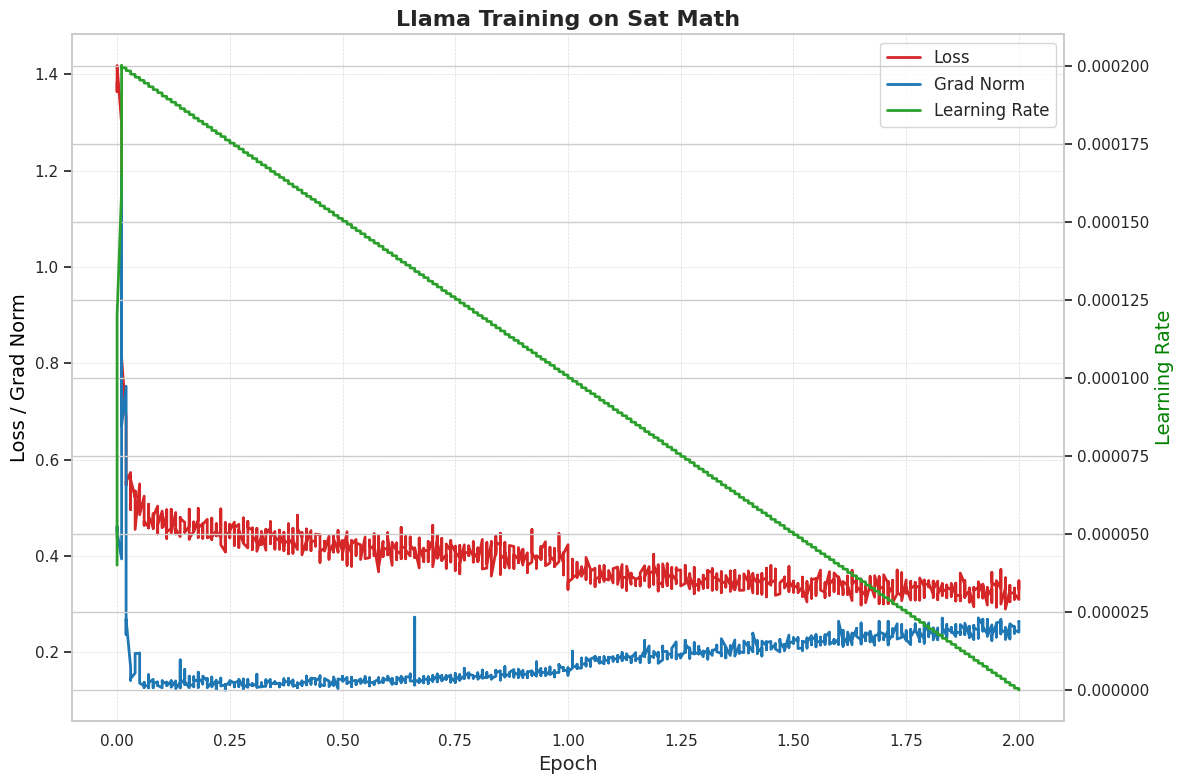

In [10]:
# Set a modern style for the plot
sns.set_theme(style="whitegrid")

# Data: list of dictionaries
data = [
{'loss': 1.3842, 'grad_norm': 0.43797212839126587, 'learning_rate': 4e-05, 'epoch': 0.0},
{'loss': 1.3641, 'grad_norm': 0.4614103138446808, 'learning_rate': 8e-05, 'epoch': 0.0},
{'loss': 1.4182, 'grad_norm': 0.4499872624874115, 'learning_rate': 0.00012, 'epoch': 0.0},
{'loss': 1.2974, 'grad_norm': 0.3937165439128876, 'learning_rate': 0.00016, 'epoch': 0.01},
{'loss': 1.1891, 'grad_norm': 0.41298556327819824, 'learning_rate': 0.0002, 'epoch': 0.01},
{'loss': 1.0929, 'grad_norm': 0.47148287296295166, 'learning_rate': 0.00019984038308060655, 'epoch': 0.01},
{'loss': 0.9982, 'grad_norm': 1.189164638519287, 'learning_rate': 0.0001996807661612131, 'epoch': 0.01},
{'loss': 0.8582, 'grad_norm': 0.9451850056648254, 'learning_rate': 0.00019952114924181964, 'epoch': 0.01},
{'loss': 0.8116, 'grad_norm': 0.6694278717041016, 'learning_rate': 0.0001993615323224262, 'epoch': 0.01},
{'loss': 0.686, 'grad_norm': 0.7524524331092834, 'learning_rate': 0.00019920191540303273, 'epoch': 0.02},
{'loss': 0.5992, 'grad_norm': 0.45546674728393555, 'learning_rate': 0.00019904229848363928, 'epoch': 0.02},
{'loss': 0.5945, 'grad_norm': 0.6160499453544617, 'learning_rate': 0.00019888268156424582, 'epoch': 0.02},
{'loss': 0.6128, 'grad_norm': 0.2504156529903412, 'learning_rate': 0.00019872306464485237, 'epoch': 0.02},
{'loss': 0.547, 'grad_norm': 0.23689183592796326, 'learning_rate': 0.0001985634477254589, 'epoch': 0.02},
{'loss': 0.5541, 'grad_norm': 0.2684425711631775, 'learning_rate': 0.00019840383080606545, 'epoch': 0.02},
{'loss': 0.5733, 'grad_norm': 0.16879701614379883, 'learning_rate': 0.000198244213886672, 'epoch': 0.03},
{'loss': 0.5334, 'grad_norm': 0.15933580696582794, 'learning_rate': 0.00019808459696727854, 'epoch': 0.03},
{'loss': 0.5549, 'grad_norm': 0.15884636342525482, 'learning_rate': 0.0001979249800478851, 'epoch': 0.03},
{'loss': 0.4962, 'grad_norm': 0.14525632560253143, 'learning_rate': 0.00019776536312849163, 'epoch': 0.03},
{'loss': 0.5529, 'grad_norm': 0.14428099989891052, 'learning_rate': 0.00019760574620909818, 'epoch': 0.03},
{'loss': 0.505, 'grad_norm': 0.1418251246213913, 'learning_rate': 0.00019744612928970472, 'epoch': 0.03},
{'loss': 0.5588, 'grad_norm': 0.1454951912164688, 'learning_rate': 0.00019728651237031127, 'epoch': 0.03},
{'loss': 0.5219, 'grad_norm': 0.15680794417858124, 'learning_rate': 0.0001971268954509178, 'epoch': 0.04},
{'loss': 0.5102, 'grad_norm': 0.16081026196479797, 'learning_rate': 0.00019696727853152436, 'epoch': 0.04},
{'loss': 0.534, 'grad_norm': 0.15791286528110504, 'learning_rate': 0.0001968076616121309, 'epoch': 0.04},
{'loss': 0.5348, 'grad_norm': 0.1768253594636917, 'learning_rate': 0.00019664804469273744, 'epoch': 0.04},
{'loss': 0.499, 'grad_norm': 0.18251295387744904, 'learning_rate': 0.00019648842777334396, 'epoch': 0.04},
{'loss': 0.455, 'grad_norm': 0.19772762060165405, 'learning_rate': 0.0001963288108539505, 'epoch': 0.04},
{'loss': 0.5496, 'grad_norm': 0.19733227789402008, 'learning_rate': 0.00019616919393455708, 'epoch': 0.05},
{'loss': 0.491, 'grad_norm': 0.1893962174654007, 'learning_rate': 0.00019600957701516362, 'epoch': 0.05},
{'loss': 0.5066, 'grad_norm': 0.19507597386837006, 'learning_rate': 0.00019584996009577017, 'epoch': 0.05},
{'loss': 0.5097, 'grad_norm': 0.1982489377260208, 'learning_rate': 0.0001956903431763767, 'epoch': 0.05},
{'loss': 0.5299, 'grad_norm': 0.15433597564697266, 'learning_rate': 0.00019553072625698326, 'epoch': 0.05},
{'loss': 0.4855, 'grad_norm': 0.1358656883239746, 'learning_rate': 0.0001953711093375898, 'epoch': 0.05},
{'loss': 0.5242, 'grad_norm': 0.13065770268440247, 'learning_rate': 0.00019521149241819635, 'epoch': 0.06},
{'loss': 0.4981, 'grad_norm': 0.13281194865703583, 'learning_rate': 0.0001950518754988029, 'epoch': 0.06},
{'loss': 0.4638, 'grad_norm': 0.12664447724819183, 'learning_rate': 0.00019489225857940943, 'epoch': 0.06},
{'loss': 0.5053, 'grad_norm': 0.1377832591533661, 'learning_rate': 0.00019473264166001598, 'epoch': 0.06},
{'loss': 0.4733, 'grad_norm': 0.12762893736362457, 'learning_rate': 0.00019457302474062252, 'epoch': 0.06},
{'loss': 0.4719, 'grad_norm': 0.13034939765930176, 'learning_rate': 0.00019441340782122907, 'epoch': 0.06},
{'loss': 0.4594, 'grad_norm': 0.1307840347290039, 'learning_rate': 0.00019425379090183559, 'epoch': 0.07},
{'loss': 0.5074, 'grad_norm': 0.13144433498382568, 'learning_rate': 0.00019409417398244213, 'epoch': 0.07},
{'loss': 0.4733, 'grad_norm': 0.1261311024427414, 'learning_rate': 0.00019393455706304867, 'epoch': 0.07},
{'loss': 0.4581, 'grad_norm': 0.13018961250782013, 'learning_rate': 0.00019377494014365522, 'epoch': 0.07},
{'loss': 0.5045, 'grad_norm': 0.15321342647075653, 'learning_rate': 0.0001936153232242618, 'epoch': 0.07},
{'loss': 0.5001, 'grad_norm': 0.13644938170909882, 'learning_rate': 0.00019345570630486834, 'epoch': 0.07},
{'loss': 0.4812, 'grad_norm': 0.13628984987735748, 'learning_rate': 0.00019329608938547488, 'epoch': 0.07},
{'loss': 0.461, 'grad_norm': 0.14388251304626465, 'learning_rate': 0.00019313647246608142, 'epoch': 0.08},
{'loss': 0.4746, 'grad_norm': 0.13842526078224182, 'learning_rate': 0.00019297685554668797, 'epoch': 0.08},
{'loss': 0.4577, 'grad_norm': 0.1269323080778122, 'learning_rate': 0.0001928172386272945, 'epoch': 0.08},
{'loss': 0.4875, 'grad_norm': 0.1299952119588852, 'learning_rate': 0.00019265762170790106, 'epoch': 0.08},
{'loss': 0.4572, 'grad_norm': 0.12620438635349274, 'learning_rate': 0.0001924980047885076, 'epoch': 0.08},
{'loss': 0.4815, 'grad_norm': 0.13532114028930664, 'learning_rate': 0.00019233838786911415, 'epoch': 0.08},
{'loss': 0.5034, 'grad_norm': 0.13863784074783325, 'learning_rate': 0.00019217877094972066, 'epoch': 0.09},
{'loss': 0.4457, 'grad_norm': 0.13067643344402313, 'learning_rate': 0.0001920191540303272, 'epoch': 0.09},
{'loss': 0.4724, 'grad_norm': 0.13092005252838135, 'learning_rate': 0.00019185953711093375, 'epoch': 0.09},
{'loss': 0.4713, 'grad_norm': 0.1334935575723648, 'learning_rate': 0.0001916999201915403, 'epoch': 0.09},
{'loss': 0.4676, 'grad_norm': 0.13340610265731812, 'learning_rate': 0.00019154030327214684, 'epoch': 0.09},
{'loss': 0.4644, 'grad_norm': 0.1312137097120285, 'learning_rate': 0.0001913806863527534, 'epoch': 0.09},
{'loss': 0.4931, 'grad_norm': 0.1261751502752304, 'learning_rate': 0.00019122106943335996, 'epoch': 0.1},
{'loss': 0.4818, 'grad_norm': 0.13128308951854706, 'learning_rate': 0.0001910614525139665, 'epoch': 0.1},
{'loss': 0.4618, 'grad_norm': 0.13930289447307587, 'learning_rate': 0.00019090183559457305, 'epoch': 0.1},
{'loss': 0.4593, 'grad_norm': 0.1373170167207718, 'learning_rate': 0.0001907422186751796, 'epoch': 0.1},
{'loss': 0.4691, 'grad_norm': 0.13043637573719025, 'learning_rate': 0.00019058260175578614, 'epoch': 0.1},
{'loss': 0.491, 'grad_norm': 0.1407158076763153, 'learning_rate': 0.00019042298483639268, 'epoch': 0.1},
{'loss': 0.4872, 'grad_norm': 0.13891460001468658, 'learning_rate': 0.00019026336791699923, 'epoch': 0.1},
{'loss': 0.4532, 'grad_norm': 0.13448014855384827, 'learning_rate': 0.00019010375099760574, 'epoch': 0.11},
{'loss': 0.4364, 'grad_norm': 0.1331428587436676, 'learning_rate': 0.0001899441340782123, 'epoch': 0.11},
{'loss': 0.4949, 'grad_norm': 0.13309895992279053, 'learning_rate': 0.00018978451715881883, 'epoch': 0.11},
{'loss': 0.4957, 'grad_norm': 0.13808175921440125, 'learning_rate': 0.00018962490023942538, 'epoch': 0.11},
{'loss': 0.4886, 'grad_norm': 0.13435597717761993, 'learning_rate': 0.00018946528332003192, 'epoch': 0.11},
{'loss': 0.4507, 'grad_norm': 0.13023826479911804, 'learning_rate': 0.00018930566640063847, 'epoch': 0.11},
{'loss': 0.4562, 'grad_norm': 0.13963483273983002, 'learning_rate': 0.000189146049481245, 'epoch': 0.12},
{'loss': 0.4968, 'grad_norm': 0.12969951331615448, 'learning_rate': 0.00018898643256185155, 'epoch': 0.12},
{'loss': 0.4488, 'grad_norm': 0.1407429426908493, 'learning_rate': 0.0001888268156424581, 'epoch': 0.12},
{'loss': 0.4603, 'grad_norm': 0.1372983306646347, 'learning_rate': 0.00018866719872306467, 'epoch': 0.12},
{'loss': 0.4632, 'grad_norm': 0.13196255266666412, 'learning_rate': 0.00018850758180367122, 'epoch': 0.12},
{'loss': 0.447, 'grad_norm': 0.1273481398820877, 'learning_rate': 0.00018834796488427776, 'epoch': 0.12},
{'loss': 0.4902, 'grad_norm': 0.14038890600204468, 'learning_rate': 0.0001881883479648843, 'epoch': 0.13},
{'loss': 0.4697, 'grad_norm': 0.13602161407470703, 'learning_rate': 0.00018802873104549085, 'epoch': 0.13},
{'loss': 0.4823, 'grad_norm': 0.13643640279769897, 'learning_rate': 0.00018786911412609737, 'epoch': 0.13},
{'loss': 0.4457, 'grad_norm': 0.13616807758808136, 'learning_rate': 0.0001877094972067039, 'epoch': 0.13},
{'loss': 0.4623, 'grad_norm': 0.1357792615890503, 'learning_rate': 0.00018754988028731046, 'epoch': 0.13},
{'loss': 0.4558, 'grad_norm': 0.12436412274837494, 'learning_rate': 0.000187390263367917, 'epoch': 0.13},
{'loss': 0.4401, 'grad_norm': 0.13724246621131897, 'learning_rate': 0.00018723064644852354, 'epoch': 0.14},
{'loss': 0.4589, 'grad_norm': 0.13317365944385529, 'learning_rate': 0.0001870710295291301, 'epoch': 0.14},
{'loss': 0.4437, 'grad_norm': 0.13715378940105438, 'learning_rate': 0.00018691141260973663, 'epoch': 0.14},
{'loss': 0.4684, 'grad_norm': 0.1260451227426529, 'learning_rate': 0.00018675179569034318, 'epoch': 0.14},
{'loss': 0.4801, 'grad_norm': 0.18406908214092255, 'learning_rate': 0.00018659217877094972, 'epoch': 0.14},
{'loss': 0.4685, 'grad_norm': 0.15209929645061493, 'learning_rate': 0.00018643256185155627, 'epoch': 0.14},
{'loss': 0.4782, 'grad_norm': 0.13496705889701843, 'learning_rate': 0.0001862729449321628, 'epoch': 0.14},
{'loss': 0.4697, 'grad_norm': 0.14377643167972565, 'learning_rate': 0.00018611332801276938, 'epoch': 0.15},
{'loss': 0.4606, 'grad_norm': 0.1643650382757187, 'learning_rate': 0.00018595371109337593, 'epoch': 0.15},
{'loss': 0.4694, 'grad_norm': 0.14588229358196259, 'learning_rate': 0.00018579409417398245, 'epoch': 0.15},
{'loss': 0.4558, 'grad_norm': 0.1332121044397354, 'learning_rate': 0.000185634477254589, 'epoch': 0.15},
{'loss': 0.4491, 'grad_norm': 0.14073629677295685, 'learning_rate': 0.00018547486033519553, 'epoch': 0.15},
{'loss': 0.4493, 'grad_norm': 0.13927902281284332, 'learning_rate': 0.00018531524341580208, 'epoch': 0.15},
{'loss': 0.4611, 'grad_norm': 0.12630999088287354, 'learning_rate': 0.00018515562649640862, 'epoch': 0.16},
{'loss': 0.4889, 'grad_norm': 0.13562066853046417, 'learning_rate': 0.00018499600957701517, 'epoch': 0.16},
{'loss': 0.4551, 'grad_norm': 0.14391858875751495, 'learning_rate': 0.0001848363926576217, 'epoch': 0.16},
{'loss': 0.4971, 'grad_norm': 0.1503833383321762, 'learning_rate': 0.00018467677573822826, 'epoch': 0.16},
{'loss': 0.4349, 'grad_norm': 0.1360008865594864, 'learning_rate': 0.0001845171588188348, 'epoch': 0.16},
{'loss': 0.436, 'grad_norm': 0.13138991594314575, 'learning_rate': 0.00018435754189944135, 'epoch': 0.16},
{'loss': 0.4515, 'grad_norm': 0.13228923082351685, 'learning_rate': 0.0001841979249800479, 'epoch': 0.17},
{'loss': 0.4546, 'grad_norm': 0.12832167744636536, 'learning_rate': 0.00018403830806065443, 'epoch': 0.17},
{'loss': 0.4549, 'grad_norm': 0.1418088972568512, 'learning_rate': 0.00018387869114126098, 'epoch': 0.17},
{'loss': 0.4706, 'grad_norm': 0.14922145009040833, 'learning_rate': 0.00018371907422186755, 'epoch': 0.17},
{'loss': 0.4584, 'grad_norm': 0.13647526502609253, 'learning_rate': 0.00018355945730247407, 'epoch': 0.17},
{'loss': 0.4647, 'grad_norm': 0.13117267191410065, 'learning_rate': 0.0001833998403830806, 'epoch': 0.17},
{'loss': 0.4504, 'grad_norm': 0.14207692444324493, 'learning_rate': 0.00018324022346368716, 'epoch': 0.17},
{'loss': 0.475, 'grad_norm': 0.14050742983818054, 'learning_rate': 0.0001830806065442937, 'epoch': 0.18},
{'loss': 0.4985, 'grad_norm': 0.14601068198680878, 'learning_rate': 0.00018292098962490025, 'epoch': 0.18},
{'loss': 0.4588, 'grad_norm': 0.1398865431547165, 'learning_rate': 0.0001827613727055068, 'epoch': 0.18},
{'loss': 0.4384, 'grad_norm': 0.12699268758296967, 'learning_rate': 0.00018260175578611334, 'epoch': 0.18},
{'loss': 0.4563, 'grad_norm': 0.15848420560359955, 'learning_rate': 0.00018244213886671988, 'epoch': 0.18},
{'loss': 0.4586, 'grad_norm': 0.14613069593906403, 'learning_rate': 0.00018228252194732642, 'epoch': 0.18},
{'loss': 0.4671, 'grad_norm': 0.13688801229000092, 'learning_rate': 0.00018212290502793297, 'epoch': 0.19},
{'loss': 0.4573, 'grad_norm': 0.14160595834255219, 'learning_rate': 0.00018196328810853951, 'epoch': 0.19},
{'loss': 0.4467, 'grad_norm': 0.13413766026496887, 'learning_rate': 0.00018180367118914606, 'epoch': 0.19},
{'loss': 0.4368, 'grad_norm': 0.1351715475320816, 'learning_rate': 0.0001816440542697526, 'epoch': 0.19},
{'loss': 0.4475, 'grad_norm': 0.14618103206157684, 'learning_rate': 0.00018148443735035915, 'epoch': 0.19},
{'loss': 0.4657, 'grad_norm': 0.1505306512117386, 'learning_rate': 0.0001813248204309657, 'epoch': 0.19},
{'loss': 0.476, 'grad_norm': 0.14081594347953796, 'learning_rate': 0.00018116520351157224, 'epoch': 0.2},
{'loss': 0.4642, 'grad_norm': 0.13580715656280518, 'learning_rate': 0.00018100558659217878, 'epoch': 0.2},
{'loss': 0.4463, 'grad_norm': 0.13469232618808746, 'learning_rate': 0.00018084596967278533, 'epoch': 0.2},
{'loss': 0.4633, 'grad_norm': 0.14056655764579773, 'learning_rate': 0.00018068635275339187, 'epoch': 0.2},
{'loss': 0.4406, 'grad_norm': 0.14540085196495056, 'learning_rate': 0.00018052673583399841, 'epoch': 0.2},
{'loss': 0.4376, 'grad_norm': 0.12630444765090942, 'learning_rate': 0.00018036711891460496, 'epoch': 0.2},
{'loss': 0.4412, 'grad_norm': 0.13774336874485016, 'learning_rate': 0.0001802075019952115, 'epoch': 0.21},
{'loss': 0.4443, 'grad_norm': 0.13488245010375977, 'learning_rate': 0.00018004788507581805, 'epoch': 0.21},
{'loss': 0.4369, 'grad_norm': 0.13489963114261627, 'learning_rate': 0.0001798882681564246, 'epoch': 0.21},
{'loss': 0.4785, 'grad_norm': 0.14849665760993958, 'learning_rate': 0.00017972865123703114, 'epoch': 0.21},
{'loss': 0.4537, 'grad_norm': 0.14168843626976013, 'learning_rate': 0.00017956903431763768, 'epoch': 0.21},
{'loss': 0.4339, 'grad_norm': 0.1406761258840561, 'learning_rate': 0.00017940941739824423, 'epoch': 0.21},
{'loss': 0.4392, 'grad_norm': 0.12817662954330444, 'learning_rate': 0.00017924980047885077, 'epoch': 0.21},
{'loss': 0.4524, 'grad_norm': 0.14213094115257263, 'learning_rate': 0.00017909018355945732, 'epoch': 0.22},
{'loss': 0.4669, 'grad_norm': 0.13609124720096588, 'learning_rate': 0.00017893056664006383, 'epoch': 0.22},
{'loss': 0.4417, 'grad_norm': 0.12365788221359253, 'learning_rate': 0.00017877094972067038, 'epoch': 0.22},
{'loss': 0.4492, 'grad_norm': 0.13728560507297516, 'learning_rate': 0.00017861133280127695, 'epoch': 0.22},
{'loss': 0.4529, 'grad_norm': 0.13984979689121246, 'learning_rate': 0.0001784517158818835, 'epoch': 0.22},
{'loss': 0.4519, 'grad_norm': 0.13466165959835052, 'learning_rate': 0.00017829209896249004, 'epoch': 0.22},
{'loss': 0.4382, 'grad_norm': 0.14033329486846924, 'learning_rate': 0.00017813248204309658, 'epoch': 0.23},
{'loss': 0.4976, 'grad_norm': 0.1386609822511673, 'learning_rate': 0.00017797286512370313, 'epoch': 0.23},
{'loss': 0.4582, 'grad_norm': 0.13770394027233124, 'learning_rate': 0.00017781324820430967, 'epoch': 0.23},
{'loss': 0.4427, 'grad_norm': 0.14645998179912567, 'learning_rate': 0.00017765363128491622, 'epoch': 0.23},
{'loss': 0.4485, 'grad_norm': 0.138315811753273, 'learning_rate': 0.00017749401436552276, 'epoch': 0.23},
{'loss': 0.4228, 'grad_norm': 0.12988004088401794, 'learning_rate': 0.0001773343974461293, 'epoch': 0.23},
{'loss': 0.4091, 'grad_norm': 0.13231053948402405, 'learning_rate': 0.00017717478052673585, 'epoch': 0.24},
{'loss': 0.4361, 'grad_norm': 0.12156891822814941, 'learning_rate': 0.0001770151636073424, 'epoch': 0.24},
{'loss': 0.4297, 'grad_norm': 0.12849335372447968, 'learning_rate': 0.00017685554668794894, 'epoch': 0.24},
{'loss': 0.4084, 'grad_norm': 0.13246162235736847, 'learning_rate': 0.00017669592976855546, 'epoch': 0.24},
{'loss': 0.4569, 'grad_norm': 0.13267534971237183, 'learning_rate': 0.000176536312849162, 'epoch': 0.24},
{'loss': 0.4691, 'grad_norm': 0.131557434797287, 'learning_rate': 0.00017637669592976854, 'epoch': 0.24},
{'loss': 0.4448, 'grad_norm': 0.13062898814678192, 'learning_rate': 0.00017621707901037512, 'epoch': 0.24},
{'loss': 0.4488, 'grad_norm': 0.1385909914970398, 'learning_rate': 0.00017605746209098166, 'epoch': 0.25},
{'loss': 0.4374, 'grad_norm': 0.13574635982513428, 'learning_rate': 0.0001758978451715882, 'epoch': 0.25},
{'loss': 0.4441, 'grad_norm': 0.1350392997264862, 'learning_rate': 0.00017573822825219475, 'epoch': 0.25},
{'loss': 0.4423, 'grad_norm': 0.13256528973579407, 'learning_rate': 0.0001755786113328013, 'epoch': 0.25},
{'loss': 0.4659, 'grad_norm': 0.13634926080703735, 'learning_rate': 0.00017541899441340784, 'epoch': 0.25},
{'loss': 0.4529, 'grad_norm': 0.14139235019683838, 'learning_rate': 0.00017525937749401438, 'epoch': 0.25},
{'loss': 0.4701, 'grad_norm': 0.1359918713569641, 'learning_rate': 0.00017509976057462093, 'epoch': 0.26},
{'loss': 0.4575, 'grad_norm': 0.12946411967277527, 'learning_rate': 0.00017494014365522747, 'epoch': 0.26},
{'loss': 0.4564, 'grad_norm': 0.12807491421699524, 'learning_rate': 0.00017478052673583402, 'epoch': 0.26},
{'loss': 0.4622, 'grad_norm': 0.1319698691368103, 'learning_rate': 0.00017462090981644053, 'epoch': 0.26},
{'loss': 0.422, 'grad_norm': 0.1336081475019455, 'learning_rate': 0.00017446129289704708, 'epoch': 0.26},
{'loss': 0.4585, 'grad_norm': 0.13607452809810638, 'learning_rate': 0.00017430167597765362, 'epoch': 0.26},
{'loss': 0.4657, 'grad_norm': 0.14093345403671265, 'learning_rate': 0.00017414205905826017, 'epoch': 0.27},
{'loss': 0.4211, 'grad_norm': 0.12876804172992706, 'learning_rate': 0.0001739824421388667, 'epoch': 0.27},
{'loss': 0.447, 'grad_norm': 0.1298995167016983, 'learning_rate': 0.00017382282521947326, 'epoch': 0.27},
{'loss': 0.4393, 'grad_norm': 0.13337218761444092, 'learning_rate': 0.00017366320830007983, 'epoch': 0.27},
{'loss': 0.4179, 'grad_norm': 0.1366599053144455, 'learning_rate': 0.00017350359138068637, 'epoch': 0.27},
{'loss': 0.4534, 'grad_norm': 0.14397776126861572, 'learning_rate': 0.00017334397446129292, 'epoch': 0.27},
{'loss': 0.4273, 'grad_norm': 0.1280018389225006, 'learning_rate': 0.00017318435754189946, 'epoch': 0.28},
{'loss': 0.4789, 'grad_norm': 0.14438702166080475, 'learning_rate': 0.000173024740622506, 'epoch': 0.28},
{'loss': 0.4342, 'grad_norm': 0.12445253133773804, 'learning_rate': 0.00017286512370311255, 'epoch': 0.28},
{'loss': 0.4344, 'grad_norm': 0.1304304301738739, 'learning_rate': 0.0001727055067837191, 'epoch': 0.28},
{'loss': 0.4467, 'grad_norm': 0.13824203610420227, 'learning_rate': 0.00017254588986432564, 'epoch': 0.28},
{'loss': 0.461, 'grad_norm': 0.13760510087013245, 'learning_rate': 0.00017238627294493216, 'epoch': 0.28},
{'loss': 0.4263, 'grad_norm': 0.13250212371349335, 'learning_rate': 0.0001722266560255387, 'epoch': 0.28},
{'loss': 0.4165, 'grad_norm': 0.12715548276901245, 'learning_rate': 0.00017206703910614525, 'epoch': 0.29},
{'loss': 0.429, 'grad_norm': 0.13821803033351898, 'learning_rate': 0.0001719074221867518, 'epoch': 0.29},
{'loss': 0.4716, 'grad_norm': 0.13853828608989716, 'learning_rate': 0.00017174780526735834, 'epoch': 0.29},
{'loss': 0.4454, 'grad_norm': 0.1433919370174408, 'learning_rate': 0.00017158818834796488, 'epoch': 0.29},
{'loss': 0.4418, 'grad_norm': 0.13518455624580383, 'learning_rate': 0.00017142857142857143, 'epoch': 0.29},
{'loss': 0.459, 'grad_norm': 0.13349242508411407, 'learning_rate': 0.00017126895450917797, 'epoch': 0.29},
{'loss': 0.4542, 'grad_norm': 0.1312919408082962, 'learning_rate': 0.00017110933758978454, 'epoch': 0.3},
{'loss': 0.4132, 'grad_norm': 0.13306201994419098, 'learning_rate': 0.00017094972067039109, 'epoch': 0.3},
{'loss': 0.4352, 'grad_norm': 0.13499683141708374, 'learning_rate': 0.00017079010375099763, 'epoch': 0.3},
{'loss': 0.4581, 'grad_norm': 0.1349162757396698, 'learning_rate': 0.00017063048683160417, 'epoch': 0.3},
{'loss': 0.4223, 'grad_norm': 0.1314244121313095, 'learning_rate': 0.00017047086991221072, 'epoch': 0.3},
{'loss': 0.4412, 'grad_norm': 0.13049711287021637, 'learning_rate': 0.00017031125299281724, 'epoch': 0.3},
{'loss': 0.4283, 'grad_norm': 0.13444285094738007, 'learning_rate': 0.00017015163607342378, 'epoch': 0.31},
{'loss': 0.433, 'grad_norm': 0.14276400208473206, 'learning_rate': 0.00016999201915403033, 'epoch': 0.31},
{'loss': 0.446, 'grad_norm': 0.1544398069381714, 'learning_rate': 0.00016983240223463687, 'epoch': 0.31},
{'loss': 0.4571, 'grad_norm': 0.1335141807794571, 'learning_rate': 0.00016967278531524341, 'epoch': 0.31},
{'loss': 0.4263, 'grad_norm': 0.12833669781684875, 'learning_rate': 0.00016951316839584996, 'epoch': 0.31},
{'loss': 0.4433, 'grad_norm': 0.1274537295103073, 'learning_rate': 0.0001693535514764565, 'epoch': 0.31},
{'loss': 0.4096, 'grad_norm': 0.12769897282123566, 'learning_rate': 0.00016919393455706305, 'epoch': 0.31},
{'loss': 0.4411, 'grad_norm': 0.12812048196792603, 'learning_rate': 0.0001690343176376696, 'epoch': 0.32},
{'loss': 0.4338, 'grad_norm': 0.12877845764160156, 'learning_rate': 0.00016887470071827614, 'epoch': 0.32},
{'loss': 0.438, 'grad_norm': 0.13260942697525024, 'learning_rate': 0.0001687150837988827, 'epoch': 0.32},
{'loss': 0.4236, 'grad_norm': 0.13533614575862885, 'learning_rate': 0.00016855546687948925, 'epoch': 0.32},
{'loss': 0.4432, 'grad_norm': 0.13658879697322845, 'learning_rate': 0.0001683958499600958, 'epoch': 0.32},
{'loss': 0.4511, 'grad_norm': 0.1290333867073059, 'learning_rate': 0.00016823623304070232, 'epoch': 0.32},
{'loss': 0.4118, 'grad_norm': 0.12915757298469543, 'learning_rate': 0.00016807661612130886, 'epoch': 0.33},
{'loss': 0.429, 'grad_norm': 0.1364828646183014, 'learning_rate': 0.0001679169992019154, 'epoch': 0.33},
{'loss': 0.4554, 'grad_norm': 0.14279167354106903, 'learning_rate': 0.00016775738228252195, 'epoch': 0.33},
{'loss': 0.4226, 'grad_norm': 0.13177919387817383, 'learning_rate': 0.0001675977653631285, 'epoch': 0.33},
{'loss': 0.4334, 'grad_norm': 0.13599205017089844, 'learning_rate': 0.00016743814844373504, 'epoch': 0.33},
{'loss': 0.445, 'grad_norm': 0.1343420147895813, 'learning_rate': 0.00016727853152434158, 'epoch': 0.33},
{'loss': 0.4582, 'grad_norm': 0.14369186758995056, 'learning_rate': 0.00016711891460494813, 'epoch': 0.34},
{'loss': 0.4367, 'grad_norm': 0.13610127568244934, 'learning_rate': 0.00016695929768555467, 'epoch': 0.34},
{'loss': 0.4254, 'grad_norm': 0.13586869835853577, 'learning_rate': 0.00016679968076616122, 'epoch': 0.34},
{'loss': 0.4712, 'grad_norm': 0.1359446942806244, 'learning_rate': 0.00016664006384676776, 'epoch': 0.34},
{'loss': 0.4317, 'grad_norm': 0.12827782332897186, 'learning_rate': 0.0001664804469273743, 'epoch': 0.34},
{'loss': 0.4276, 'grad_norm': 0.13759931921958923, 'learning_rate': 0.00016632083000798085, 'epoch': 0.34},
{'loss': 0.439, 'grad_norm': 0.13307934999465942, 'learning_rate': 0.00016616121308858742, 'epoch': 0.34},
{'loss': 0.4507, 'grad_norm': 0.13750490546226501, 'learning_rate': 0.00016600159616919394, 'epoch': 0.35},
{'loss': 0.4458, 'grad_norm': 0.13755756616592407, 'learning_rate': 0.00016584197924980048, 'epoch': 0.35},
{'loss': 0.4142, 'grad_norm': 0.13873951137065887, 'learning_rate': 0.00016568236233040703, 'epoch': 0.35},
{'loss': 0.4441, 'grad_norm': 0.13552720844745636, 'learning_rate': 0.00016552274541101357, 'epoch': 0.35},
{'loss': 0.4189, 'grad_norm': 0.13440696895122528, 'learning_rate': 0.00016536312849162012, 'epoch': 0.35},
{'loss': 0.4392, 'grad_norm': 0.13436000049114227, 'learning_rate': 0.00016520351157222666, 'epoch': 0.35},
{'loss': 0.4312, 'grad_norm': 0.1358494907617569, 'learning_rate': 0.0001650438946528332, 'epoch': 0.36},
{'loss': 0.4536, 'grad_norm': 0.13125500082969666, 'learning_rate': 0.00016488427773343975, 'epoch': 0.36},
{'loss': 0.4141, 'grad_norm': 0.1280517876148224, 'learning_rate': 0.0001647246608140463, 'epoch': 0.36},
{'loss': 0.453, 'grad_norm': 0.13526980578899384, 'learning_rate': 0.00016456504389465284, 'epoch': 0.36},
{'loss': 0.4237, 'grad_norm': 0.13024982810020447, 'learning_rate': 0.00016440542697525938, 'epoch': 0.36},
{'loss': 0.4456, 'grad_norm': 0.13562023639678955, 'learning_rate': 0.00016424581005586593, 'epoch': 0.36},
{'loss': 0.4203, 'grad_norm': 0.13160313665866852, 'learning_rate': 0.00016408619313647247, 'epoch': 0.37},
{'loss': 0.4493, 'grad_norm': 0.14306996762752533, 'learning_rate': 0.00016392657621707902, 'epoch': 0.37},
{'loss': 0.4107, 'grad_norm': 0.13431552052497864, 'learning_rate': 0.00016376695929768556, 'epoch': 0.37},
{'loss': 0.4358, 'grad_norm': 0.13589906692504883, 'learning_rate': 0.0001636073423782921, 'epoch': 0.37},
{'loss': 0.4383, 'grad_norm': 0.1448305994272232, 'learning_rate': 0.00016344772545889865, 'epoch': 0.37},
{'loss': 0.4316, 'grad_norm': 0.13762366771697998, 'learning_rate': 0.0001632881085395052, 'epoch': 0.37},
{'loss': 0.4273, 'grad_norm': 0.13973204791545868, 'learning_rate': 0.00016312849162011174, 'epoch': 0.38},
{'loss': 0.4666, 'grad_norm': 0.13689462840557098, 'learning_rate': 0.00016296887470071828, 'epoch': 0.38},
{'loss': 0.4105, 'grad_norm': 0.1456378996372223, 'learning_rate': 0.00016280925778132483, 'epoch': 0.38},
{'loss': 0.4084, 'grad_norm': 0.13204091787338257, 'learning_rate': 0.00016264964086193137, 'epoch': 0.38},
{'loss': 0.4046, 'grad_norm': 0.13240832090377808, 'learning_rate': 0.00016249002394253792, 'epoch': 0.38},
{'loss': 0.4238, 'grad_norm': 0.1393166482448578, 'learning_rate': 0.00016233040702314446, 'epoch': 0.38},
{'loss': 0.4355, 'grad_norm': 0.14195051789283752, 'learning_rate': 0.000162170790103751, 'epoch': 0.38},
{'loss': 0.4243, 'grad_norm': 0.132862389087677, 'learning_rate': 0.00016201117318435755, 'epoch': 0.39},
{'loss': 0.4057, 'grad_norm': 0.1385808140039444, 'learning_rate': 0.0001618515562649641, 'epoch': 0.39},
{'loss': 0.4574, 'grad_norm': 0.14243315160274506, 'learning_rate': 0.00016169193934557064, 'epoch': 0.39},
{'loss': 0.423, 'grad_norm': 0.13654905557632446, 'learning_rate': 0.00016153232242617719, 'epoch': 0.39},
{'loss': 0.4534, 'grad_norm': 0.1347578912973404, 'learning_rate': 0.00016137270550678373, 'epoch': 0.39},
{'loss': 0.4321, 'grad_norm': 0.12935465574264526, 'learning_rate': 0.00016121308858739027, 'epoch': 0.39},
{'loss': 0.4133, 'grad_norm': 0.13203753530979156, 'learning_rate': 0.00016105347166799682, 'epoch': 0.4},
{'loss': 0.4499, 'grad_norm': 0.13556647300720215, 'learning_rate': 0.00016089385474860336, 'epoch': 0.4},
{'loss': 0.4228, 'grad_norm': 0.12641115486621857, 'learning_rate': 0.0001607342378292099, 'epoch': 0.4},
{'loss': 0.4844, 'grad_norm': 0.13658331334590912, 'learning_rate': 0.00016057462090981645, 'epoch': 0.4},
{'loss': 0.426, 'grad_norm': 0.1325102299451828, 'learning_rate': 0.000160415003990423, 'epoch': 0.4},
{'loss': 0.4567, 'grad_norm': 0.13305088877677917, 'learning_rate': 0.00016025538707102954, 'epoch': 0.4},
{'loss': 0.4396, 'grad_norm': 0.13659793138504028, 'learning_rate': 0.00016009577015163609, 'epoch': 0.41},
{'loss': 0.4208, 'grad_norm': 0.130867600440979, 'learning_rate': 0.00015993615323224263, 'epoch': 0.41},
{'loss': 0.4321, 'grad_norm': 0.13595235347747803, 'learning_rate': 0.00015977653631284918, 'epoch': 0.41},
{'loss': 0.4384, 'grad_norm': 0.13961531221866608, 'learning_rate': 0.00015961691939345572, 'epoch': 0.41},
{'loss': 0.4484, 'grad_norm': 0.1404048651456833, 'learning_rate': 0.00015945730247406226, 'epoch': 0.41},
{'loss': 0.4109, 'grad_norm': 0.1349538415670395, 'learning_rate': 0.0001592976855546688, 'epoch': 0.41},
{'loss': 0.4023, 'grad_norm': 0.13617900013923645, 'learning_rate': 0.00015913806863527533, 'epoch': 0.41},
{'loss': 0.4318, 'grad_norm': 0.13867300748825073, 'learning_rate': 0.00015897845171588187, 'epoch': 0.42},
{'loss': 0.4559, 'grad_norm': 0.15051187574863434, 'learning_rate': 0.00015881883479648842, 'epoch': 0.42},
{'loss': 0.4285, 'grad_norm': 0.13531269133090973, 'learning_rate': 0.000158659217877095, 'epoch': 0.42},
{'loss': 0.4232, 'grad_norm': 0.1323671191930771, 'learning_rate': 0.00015849960095770153, 'epoch': 0.42},
{'loss': 0.4133, 'grad_norm': 0.1416265070438385, 'learning_rate': 0.00015833998403830808, 'epoch': 0.42},
{'loss': 0.4274, 'grad_norm': 0.1376671940088272, 'learning_rate': 0.00015818036711891462, 'epoch': 0.42},
{'loss': 0.4527, 'grad_norm': 0.14436599612236023, 'learning_rate': 0.00015802075019952117, 'epoch': 0.43},
{'loss': 0.4366, 'grad_norm': 0.1367502212524414, 'learning_rate': 0.0001578611332801277, 'epoch': 0.43},
{'loss': 0.423, 'grad_norm': 0.13366086781024933, 'learning_rate': 0.00015770151636073425, 'epoch': 0.43},
{'loss': 0.4111, 'grad_norm': 0.13476713001728058, 'learning_rate': 0.0001575418994413408, 'epoch': 0.43},
{'loss': 0.4328, 'grad_norm': 0.14465585350990295, 'learning_rate': 0.00015738228252194734, 'epoch': 0.43},
{'loss': 0.4309, 'grad_norm': 0.14632107317447662, 'learning_rate': 0.0001572226656025539, 'epoch': 0.43},
{'loss': 0.4306, 'grad_norm': 0.1454572081565857, 'learning_rate': 0.0001570630486831604, 'epoch': 0.44},
{'loss': 0.4412, 'grad_norm': 0.1389123946428299, 'learning_rate': 0.00015690343176376695, 'epoch': 0.44},
{'loss': 0.4204, 'grad_norm': 0.13368257880210876, 'learning_rate': 0.0001567438148443735, 'epoch': 0.44},
{'loss': 0.4333, 'grad_norm': 0.13405407965183258, 'learning_rate': 0.00015658419792498004, 'epoch': 0.44},
{'loss': 0.4388, 'grad_norm': 0.14380314946174622, 'learning_rate': 0.00015642458100558658, 'epoch': 0.44},
{'loss': 0.4454, 'grad_norm': 0.1403176188468933, 'learning_rate': 0.00015626496408619313, 'epoch': 0.44},
{'loss': 0.4442, 'grad_norm': 0.14729490876197815, 'learning_rate': 0.0001561053471667997, 'epoch': 0.45},
{'loss': 0.4162, 'grad_norm': 0.1510556936264038, 'learning_rate': 0.00015594573024740624, 'epoch': 0.45},
{'loss': 0.4394, 'grad_norm': 0.13786278665065765, 'learning_rate': 0.0001557861133280128, 'epoch': 0.45},
{'loss': 0.3868, 'grad_norm': 0.1329382359981537, 'learning_rate': 0.00015562649640861933, 'epoch': 0.45},
{'loss': 0.417, 'grad_norm': 0.13504356145858765, 'learning_rate': 0.00015546687948922588, 'epoch': 0.45},
{'loss': 0.4355, 'grad_norm': 0.12904711067676544, 'learning_rate': 0.00015530726256983242, 'epoch': 0.45},
{'loss': 0.4094, 'grad_norm': 0.1328870803117752, 'learning_rate': 0.00015514764565043897, 'epoch': 0.45},
{'loss': 0.4161, 'grad_norm': 0.13047519326210022, 'learning_rate': 0.0001549880287310455, 'epoch': 0.46},
{'loss': 0.4204, 'grad_norm': 0.13897068798542023, 'learning_rate': 0.00015482841181165203, 'epoch': 0.46},
{'loss': 0.4133, 'grad_norm': 0.13739211857318878, 'learning_rate': 0.00015466879489225857, 'epoch': 0.46},
{'loss': 0.4131, 'grad_norm': 0.1401011198759079, 'learning_rate': 0.00015450917797286512, 'epoch': 0.46},
{'loss': 0.4306, 'grad_norm': 0.1406010389328003, 'learning_rate': 0.00015434956105347166, 'epoch': 0.46},
{'loss': 0.41, 'grad_norm': 0.14553220570087433, 'learning_rate': 0.0001541899441340782, 'epoch': 0.46},
{'loss': 0.4411, 'grad_norm': 0.13984331488609314, 'learning_rate': 0.00015403032721468475, 'epoch': 0.47},
{'loss': 0.4127, 'grad_norm': 0.13993234932422638, 'learning_rate': 0.0001538707102952913, 'epoch': 0.47},
{'loss': 0.3932, 'grad_norm': 0.1345331072807312, 'learning_rate': 0.00015371109337589787, 'epoch': 0.47},
{'loss': 0.4377, 'grad_norm': 0.13557502627372742, 'learning_rate': 0.0001535514764565044, 'epoch': 0.47},
{'loss': 0.4173, 'grad_norm': 0.1332201063632965, 'learning_rate': 0.00015339185953711096, 'epoch': 0.47},
{'loss': 0.4064, 'grad_norm': 0.12861093878746033, 'learning_rate': 0.0001532322426177175, 'epoch': 0.47},
{'loss': 0.4268, 'grad_norm': 0.14141415059566498, 'learning_rate': 0.00015307262569832405, 'epoch': 0.48},
{'loss': 0.4336, 'grad_norm': 0.13794951140880585, 'learning_rate': 0.0001529130087789306, 'epoch': 0.48},
{'loss': 0.4081, 'grad_norm': 0.13758309185504913, 'learning_rate': 0.0001527533918595371, 'epoch': 0.48},
{'loss': 0.441, 'grad_norm': 0.14307817816734314, 'learning_rate': 0.00015259377494014365, 'epoch': 0.48},
{'loss': 0.4299, 'grad_norm': 0.13127081096172333, 'learning_rate': 0.0001524341580207502, 'epoch': 0.48},
{'loss': 0.4265, 'grad_norm': 0.13371999561786652, 'learning_rate': 0.00015227454110135674, 'epoch': 0.48},
{'loss': 0.436, 'grad_norm': 0.14865821599960327, 'learning_rate': 0.00015211492418196329, 'epoch': 0.48},
{'loss': 0.4099, 'grad_norm': 0.12428314238786697, 'learning_rate': 0.00015195530726256983, 'epoch': 0.49},
{'loss': 0.408, 'grad_norm': 0.13210414350032806, 'learning_rate': 0.00015179569034317637, 'epoch': 0.49},
{'loss': 0.4525, 'grad_norm': 0.13916203379631042, 'learning_rate': 0.00015163607342378292, 'epoch': 0.49},
{'loss': 0.4315, 'grad_norm': 0.1385997235774994, 'learning_rate': 0.00015147645650438946, 'epoch': 0.49},
{'loss': 0.4462, 'grad_norm': 0.1389605551958084, 'learning_rate': 0.000151316839584996, 'epoch': 0.49},
{'loss': 0.4388, 'grad_norm': 0.14463864266872406, 'learning_rate': 0.00015115722266560258, 'epoch': 0.49},
{'loss': 0.4092, 'grad_norm': 0.14312966167926788, 'learning_rate': 0.00015099760574620912, 'epoch': 0.5},
{'loss': 0.4239, 'grad_norm': 0.1411166489124298, 'learning_rate': 0.00015083798882681567, 'epoch': 0.5},
{'loss': 0.419, 'grad_norm': 0.14053766429424286, 'learning_rate': 0.0001506783719074222, 'epoch': 0.5},
{'loss': 0.3927, 'grad_norm': 0.14745183289051056, 'learning_rate': 0.00015051875498802873, 'epoch': 0.5},
{'loss': 0.432, 'grad_norm': 0.15009427070617676, 'learning_rate': 0.00015035913806863528, 'epoch': 0.5},
{'loss': 0.4045, 'grad_norm': 0.13938602805137634, 'learning_rate': 0.00015019952114924182, 'epoch': 0.5},
{'loss': 0.4503, 'grad_norm': 0.14792920649051666, 'learning_rate': 0.00015003990422984836, 'epoch': 0.51},
{'loss': 0.3807, 'grad_norm': 0.13465729355812073, 'learning_rate': 0.0001498802873104549, 'epoch': 0.51},
{'loss': 0.432, 'grad_norm': 0.14145460724830627, 'learning_rate': 0.00014972067039106145, 'epoch': 0.51},
{'loss': 0.3968, 'grad_norm': 0.13672591745853424, 'learning_rate': 0.000149561053471668, 'epoch': 0.51},
{'loss': 0.438, 'grad_norm': 0.13912247121334076, 'learning_rate': 0.00014940143655227454, 'epoch': 0.51},
{'loss': 0.4283, 'grad_norm': 0.1381169855594635, 'learning_rate': 0.0001492418196328811, 'epoch': 0.51},
{'loss': 0.4056, 'grad_norm': 0.137687087059021, 'learning_rate': 0.00014908220271348763, 'epoch': 0.52},
{'loss': 0.4043, 'grad_norm': 0.12866146862506866, 'learning_rate': 0.00014892258579409418, 'epoch': 0.52},
{'loss': 0.3787, 'grad_norm': 0.13398271799087524, 'learning_rate': 0.00014876296887470072, 'epoch': 0.52},
{'loss': 0.4321, 'grad_norm': 0.14132389426231384, 'learning_rate': 0.0001486033519553073, 'epoch': 0.52},
{'loss': 0.4277, 'grad_norm': 0.13661856949329376, 'learning_rate': 0.0001484437350359138, 'epoch': 0.52},
{'loss': 0.4317, 'grad_norm': 0.14814172685146332, 'learning_rate': 0.00014828411811652035, 'epoch': 0.52},
{'loss': 0.4243, 'grad_norm': 0.1403111219406128, 'learning_rate': 0.0001481245011971269, 'epoch': 0.52},
{'loss': 0.4342, 'grad_norm': 0.14150217175483704, 'learning_rate': 0.00014796488427773344, 'epoch': 0.53},
{'loss': 0.4011, 'grad_norm': 0.13283441960811615, 'learning_rate': 0.00014780526735834, 'epoch': 0.53},
{'loss': 0.4232, 'grad_norm': 0.13553011417388916, 'learning_rate': 0.00014764565043894653, 'epoch': 0.53},
{'loss': 0.42, 'grad_norm': 0.1368304342031479, 'learning_rate': 0.00014748603351955308, 'epoch': 0.53},
{'loss': 0.4088, 'grad_norm': 0.13314594328403473, 'learning_rate': 0.00014732641660015962, 'epoch': 0.53},
{'loss': 0.4267, 'grad_norm': 0.1366402804851532, 'learning_rate': 0.00014716679968076617, 'epoch': 0.53},
{'loss': 0.4233, 'grad_norm': 0.14479567110538483, 'learning_rate': 0.0001470071827613727, 'epoch': 0.54},
{'loss': 0.4073, 'grad_norm': 0.13591435551643372, 'learning_rate': 0.00014684756584197925, 'epoch': 0.54},
{'loss': 0.4162, 'grad_norm': 0.14040207862854004, 'learning_rate': 0.0001466879489225858, 'epoch': 0.54},
{'loss': 0.4227, 'grad_norm': 0.13822780549526215, 'learning_rate': 0.00014652833200319234, 'epoch': 0.54},
{'loss': 0.3985, 'grad_norm': 0.14144255220890045, 'learning_rate': 0.0001463687150837989, 'epoch': 0.54},
{'loss': 0.3925, 'grad_norm': 0.13496646285057068, 'learning_rate': 0.00014620909816440543, 'epoch': 0.54},
{'loss': 0.4393, 'grad_norm': 0.14519663155078888, 'learning_rate': 0.00014604948124501198, 'epoch': 0.55},
{'loss': 0.4122, 'grad_norm': 0.1429726481437683, 'learning_rate': 0.00014588986432561852, 'epoch': 0.55},
{'loss': 0.4343, 'grad_norm': 0.1363391876220703, 'learning_rate': 0.00014573024740622507, 'epoch': 0.55},
{'loss': 0.4087, 'grad_norm': 0.14160579442977905, 'learning_rate': 0.0001455706304868316, 'epoch': 0.55},
{'loss': 0.4185, 'grad_norm': 0.14136135578155518, 'learning_rate': 0.00014541101356743816, 'epoch': 0.55},
{'loss': 0.4003, 'grad_norm': 0.14919887483119965, 'learning_rate': 0.0001452513966480447, 'epoch': 0.55},
{'loss': 0.3943, 'grad_norm': 0.1394886076450348, 'learning_rate': 0.00014509177972865124, 'epoch': 0.55},
{'loss': 0.3964, 'grad_norm': 0.13755984604358673, 'learning_rate': 0.0001449321628092578, 'epoch': 0.56},
{'loss': 0.4331, 'grad_norm': 0.14707665145397186, 'learning_rate': 0.00014477254588986433, 'epoch': 0.56},
{'loss': 0.4023, 'grad_norm': 0.13002972304821014, 'learning_rate': 0.00014461292897047088, 'epoch': 0.56},
{'loss': 0.421, 'grad_norm': 0.1460983157157898, 'learning_rate': 0.00014445331205107742, 'epoch': 0.56},
{'loss': 0.4211, 'grad_norm': 0.13817273080348969, 'learning_rate': 0.00014429369513168397, 'epoch': 0.56},
{'loss': 0.42, 'grad_norm': 0.13761267066001892, 'learning_rate': 0.0001441340782122905, 'epoch': 0.56},
{'loss': 0.4142, 'grad_norm': 0.13654989004135132, 'learning_rate': 0.00014397446129289706, 'epoch': 0.57},
{'loss': 0.4143, 'grad_norm': 0.1369224339723587, 'learning_rate': 0.0001438148443735036, 'epoch': 0.57},
{'loss': 0.4459, 'grad_norm': 0.1373489499092102, 'learning_rate': 0.00014365522745411015, 'epoch': 0.57},
{'loss': 0.425, 'grad_norm': 0.13746285438537598, 'learning_rate': 0.0001434956105347167, 'epoch': 0.57},
{'loss': 0.401, 'grad_norm': 0.13295495510101318, 'learning_rate': 0.00014333599361532323, 'epoch': 0.57},
{'loss': 0.4221, 'grad_norm': 0.13896463811397552, 'learning_rate': 0.00014317637669592978, 'epoch': 0.57},
{'loss': 0.367, 'grad_norm': 0.14350730180740356, 'learning_rate': 0.00014301675977653632, 'epoch': 0.58},
{'loss': 0.4418, 'grad_norm': 0.14685043692588806, 'learning_rate': 0.00014285714285714287, 'epoch': 0.58},
{'loss': 0.4087, 'grad_norm': 0.1432259976863861, 'learning_rate': 0.0001426975259377494, 'epoch': 0.58},
{'loss': 0.4046, 'grad_norm': 0.14489132165908813, 'learning_rate': 0.00014253790901835596, 'epoch': 0.58},
{'loss': 0.4081, 'grad_norm': 0.147038996219635, 'learning_rate': 0.0001423782920989625, 'epoch': 0.58},
{'loss': 0.3767, 'grad_norm': 0.1360364705324173, 'learning_rate': 0.00014221867517956905, 'epoch': 0.58},
{'loss': 0.4304, 'grad_norm': 0.14078375697135925, 'learning_rate': 0.0001420590582601756, 'epoch': 0.59},
{'loss': 0.4084, 'grad_norm': 0.14188742637634277, 'learning_rate': 0.00014189944134078214, 'epoch': 0.59},
{'loss': 0.399, 'grad_norm': 0.13717883825302124, 'learning_rate': 0.00014173982442138868, 'epoch': 0.59},
{'loss': 0.4227, 'grad_norm': 0.14646966755390167, 'learning_rate': 0.0001415802075019952, 'epoch': 0.59},
{'loss': 0.4114, 'grad_norm': 0.14554472267627716, 'learning_rate': 0.00014142059058260174, 'epoch': 0.59},
{'loss': 0.4006, 'grad_norm': 0.14523988962173462, 'learning_rate': 0.00014126097366320829, 'epoch': 0.59},
{'loss': 0.4149, 'grad_norm': 0.14487002789974213, 'learning_rate': 0.00014110135674381486, 'epoch': 0.59},
{'loss': 0.4148, 'grad_norm': 0.14193612337112427, 'learning_rate': 0.0001409417398244214, 'epoch': 0.6},
{'loss': 0.4025, 'grad_norm': 0.14179404079914093, 'learning_rate': 0.00014078212290502795, 'epoch': 0.6},
{'loss': 0.4177, 'grad_norm': 0.14746317267417908, 'learning_rate': 0.0001406225059856345, 'epoch': 0.6},
{'loss': 0.407, 'grad_norm': 0.14545360207557678, 'learning_rate': 0.00014046288906624104, 'epoch': 0.6},
{'loss': 0.4481, 'grad_norm': 0.14617349207401276, 'learning_rate': 0.00014030327214684758, 'epoch': 0.6},
{'loss': 0.4393, 'grad_norm': 0.1505746692419052, 'learning_rate': 0.00014014365522745412, 'epoch': 0.6},
{'loss': 0.3804, 'grad_norm': 0.1331019401550293, 'learning_rate': 0.00013998403830806067, 'epoch': 0.61},
{'loss': 0.3938, 'grad_norm': 0.13428160548210144, 'learning_rate': 0.00013982442138866721, 'epoch': 0.61},
{'loss': 0.4014, 'grad_norm': 0.14397570490837097, 'learning_rate': 0.00013966480446927376, 'epoch': 0.61},
{'loss': 0.4074, 'grad_norm': 0.14483506977558136, 'learning_rate': 0.0001395051875498803, 'epoch': 0.61},
{'loss': 0.4143, 'grad_norm': 0.14584355056285858, 'learning_rate': 0.00013934557063048682, 'epoch': 0.61},
{'loss': 0.4284, 'grad_norm': 0.1374358981847763, 'learning_rate': 0.00013918595371109336, 'epoch': 0.61},
{'loss': 0.4101, 'grad_norm': 0.1342145949602127, 'learning_rate': 0.0001390263367916999, 'epoch': 0.62},
{'loss': 0.427, 'grad_norm': 0.13657039403915405, 'learning_rate': 0.00013886671987230645, 'epoch': 0.62},
{'loss': 0.416, 'grad_norm': 0.1404419243335724, 'learning_rate': 0.00013870710295291303, 'epoch': 0.62},
{'loss': 0.3922, 'grad_norm': 0.1362506002187729, 'learning_rate': 0.00013854748603351957, 'epoch': 0.62},
{'loss': 0.4244, 'grad_norm': 0.14255249500274658, 'learning_rate': 0.00013838786911412611, 'epoch': 0.62},
{'loss': 0.4176, 'grad_norm': 0.143411785364151, 'learning_rate': 0.00013822825219473266, 'epoch': 0.62},
{'loss': 0.4098, 'grad_norm': 0.1485392153263092, 'learning_rate': 0.0001380686352753392, 'epoch': 0.62},
{'loss': 0.4045, 'grad_norm': 0.1395203173160553, 'learning_rate': 0.00013790901835594575, 'epoch': 0.63},
{'loss': 0.4593, 'grad_norm': 0.14952419698238373, 'learning_rate': 0.0001377494014365523, 'epoch': 0.63},
{'loss': 0.3941, 'grad_norm': 0.1449115127325058, 'learning_rate': 0.00013758978451715884, 'epoch': 0.63},
{'loss': 0.4119, 'grad_norm': 0.14686524868011475, 'learning_rate': 0.00013743016759776538, 'epoch': 0.63},
{'loss': 0.3966, 'grad_norm': 0.13699080049991608, 'learning_rate': 0.0001372705506783719, 'epoch': 0.63},
{'loss': 0.4187, 'grad_norm': 0.1490958034992218, 'learning_rate': 0.00013711093375897844, 'epoch': 0.63},
{'loss': 0.4169, 'grad_norm': 0.13853485882282257, 'learning_rate': 0.000136951316839585, 'epoch': 0.64},
{'loss': 0.4281, 'grad_norm': 0.13906002044677734, 'learning_rate': 0.00013679169992019153, 'epoch': 0.64},
{'loss': 0.3942, 'grad_norm': 0.13684627413749695, 'learning_rate': 0.00013663208300079808, 'epoch': 0.64},
{'loss': 0.4402, 'grad_norm': 0.14534801244735718, 'learning_rate': 0.00013647246608140462, 'epoch': 0.64},
{'loss': 0.4201, 'grad_norm': 0.1473747342824936, 'learning_rate': 0.00013631284916201117, 'epoch': 0.64},
{'loss': 0.412, 'grad_norm': 0.14910131692886353, 'learning_rate': 0.00013615323224261774, 'epoch': 0.64},
{'loss': 0.4001, 'grad_norm': 0.1483059972524643, 'learning_rate': 0.00013599361532322428, 'epoch': 0.65},
{'loss': 0.4103, 'grad_norm': 0.1454908549785614, 'learning_rate': 0.00013583399840383083, 'epoch': 0.65},
{'loss': 0.4169, 'grad_norm': 0.14997708797454834, 'learning_rate': 0.00013567438148443737, 'epoch': 0.65},
{'loss': 0.4394, 'grad_norm': 0.15502971410751343, 'learning_rate': 0.00013551476456504392, 'epoch': 0.65},
{'loss': 0.4057, 'grad_norm': 0.1452578753232956, 'learning_rate': 0.00013535514764565046, 'epoch': 0.65},
{'loss': 0.4229, 'grad_norm': 0.14010187983512878, 'learning_rate': 0.00013519553072625698, 'epoch': 0.65},
{'loss': 0.4096, 'grad_norm': 0.14059573411941528, 'learning_rate': 0.00013503591380686352, 'epoch': 0.66},
{'loss': 0.4042, 'grad_norm': 0.14038027822971344, 'learning_rate': 0.00013487629688747007, 'epoch': 0.66},
{'loss': 0.4005, 'grad_norm': 0.14956125617027283, 'learning_rate': 0.0001347166799680766, 'epoch': 0.66},
{'loss': 0.4008, 'grad_norm': 0.14224721491336823, 'learning_rate': 0.00013455706304868316, 'epoch': 0.66},
{'loss': 0.4049, 'grad_norm': 0.27277353405952454, 'learning_rate': 0.0001343974461292897, 'epoch': 0.66},
{'loss': 0.3968, 'grad_norm': 0.13188977539539337, 'learning_rate': 0.00013423782920989625, 'epoch': 0.66},
{'loss': 0.4171, 'grad_norm': 0.14217180013656616, 'learning_rate': 0.0001340782122905028, 'epoch': 0.66},
{'loss': 0.3752, 'grad_norm': 0.13832513988018036, 'learning_rate': 0.00013391859537110933, 'epoch': 0.67},
{'loss': 0.4372, 'grad_norm': 0.14479266107082367, 'learning_rate': 0.00013375897845171588, 'epoch': 0.67},
{'loss': 0.3889, 'grad_norm': 0.1374608725309372, 'learning_rate': 0.00013359936153232245, 'epoch': 0.67},
{'loss': 0.4001, 'grad_norm': 0.13932004570960999, 'learning_rate': 0.000133439744612929, 'epoch': 0.67},
{'loss': 0.4021, 'grad_norm': 0.14418601989746094, 'learning_rate': 0.00013328012769353554, 'epoch': 0.67},
{'loss': 0.4195, 'grad_norm': 0.14298005402088165, 'learning_rate': 0.00013312051077414208, 'epoch': 0.67},
{'loss': 0.3922, 'grad_norm': 0.13895754516124725, 'learning_rate': 0.0001329608938547486, 'epoch': 0.68},
{'loss': 0.416, 'grad_norm': 0.1371058225631714, 'learning_rate': 0.00013280127693535515, 'epoch': 0.68},
{'loss': 0.3881, 'grad_norm': 0.13704778254032135, 'learning_rate': 0.0001326416600159617, 'epoch': 0.68},
{'loss': 0.3908, 'grad_norm': 0.13642123341560364, 'learning_rate': 0.00013248204309656823, 'epoch': 0.68},
{'loss': 0.414, 'grad_norm': 0.1497126966714859, 'learning_rate': 0.00013232242617717478, 'epoch': 0.68},
{'loss': 0.4114, 'grad_norm': 0.1441599279642105, 'learning_rate': 0.00013216280925778132, 'epoch': 0.68},
{'loss': 0.4107, 'grad_norm': 0.1439439207315445, 'learning_rate': 0.00013200319233838787, 'epoch': 0.69},
{'loss': 0.4299, 'grad_norm': 0.14902305603027344, 'learning_rate': 0.0001318435754189944, 'epoch': 0.69},
{'loss': 0.388, 'grad_norm': 0.13513857126235962, 'learning_rate': 0.00013168395849960096, 'epoch': 0.69},
{'loss': 0.3932, 'grad_norm': 0.14414368569850922, 'learning_rate': 0.0001315243415802075, 'epoch': 0.69},
{'loss': 0.4275, 'grad_norm': 0.14556007087230682, 'learning_rate': 0.00013136472466081405, 'epoch': 0.69},
{'loss': 0.407, 'grad_norm': 0.14829836785793304, 'learning_rate': 0.00013120510774142062, 'epoch': 0.69},
{'loss': 0.407, 'grad_norm': 0.1416989415884018, 'learning_rate': 0.00013104549082202716, 'epoch': 0.69},
{'loss': 0.4346, 'grad_norm': 0.1447547823190689, 'learning_rate': 0.00013088587390263368, 'epoch': 0.7},
{'loss': 0.4128, 'grad_norm': 0.13967357575893402, 'learning_rate': 0.00013072625698324022, 'epoch': 0.7},
{'loss': 0.4213, 'grad_norm': 0.15174196660518646, 'learning_rate': 0.00013056664006384677, 'epoch': 0.7},
{'loss': 0.4636, 'grad_norm': 0.14486761391162872, 'learning_rate': 0.00013040702314445331, 'epoch': 0.7},
{'loss': 0.3964, 'grad_norm': 0.1458732783794403, 'learning_rate': 0.00013024740622505986, 'epoch': 0.7},
{'loss': 0.3775, 'grad_norm': 0.1426534205675125, 'learning_rate': 0.0001300877893056664, 'epoch': 0.7},
{'loss': 0.4342, 'grad_norm': 0.15086179971694946, 'learning_rate': 0.00012992817238627295, 'epoch': 0.71},
{'loss': 0.442, 'grad_norm': 0.14950217306613922, 'learning_rate': 0.0001297685554668795, 'epoch': 0.71},
{'loss': 0.4093, 'grad_norm': 0.15480464696884155, 'learning_rate': 0.00012960893854748604, 'epoch': 0.71},
{'loss': 0.3955, 'grad_norm': 0.1384885311126709, 'learning_rate': 0.00012944932162809258, 'epoch': 0.71},
{'loss': 0.4216, 'grad_norm': 0.14460061490535736, 'learning_rate': 0.00012928970470869913, 'epoch': 0.71},
{'loss': 0.4278, 'grad_norm': 0.15379974246025085, 'learning_rate': 0.00012913008778930567, 'epoch': 0.71},
{'loss': 0.3907, 'grad_norm': 0.14322052896022797, 'learning_rate': 0.00012897047086991221, 'epoch': 0.72},
{'loss': 0.3978, 'grad_norm': 0.14998526871204376, 'learning_rate': 0.00012881085395051876, 'epoch': 0.72},
{'loss': 0.4107, 'grad_norm': 0.14531952142715454, 'learning_rate': 0.0001286512370311253, 'epoch': 0.72},
{'loss': 0.4078, 'grad_norm': 0.1422920972108841, 'learning_rate': 0.00012849162011173185, 'epoch': 0.72},
{'loss': 0.4329, 'grad_norm': 0.1517454832792282, 'learning_rate': 0.0001283320031923384, 'epoch': 0.72},
{'loss': 0.4365, 'grad_norm': 0.1433613896369934, 'learning_rate': 0.00012817238627294494, 'epoch': 0.72},
{'loss': 0.3904, 'grad_norm': 0.14053219556808472, 'learning_rate': 0.00012801276935355148, 'epoch': 0.72},
{'loss': 0.4021, 'grad_norm': 0.14943622052669525, 'learning_rate': 0.00012785315243415803, 'epoch': 0.73},
{'loss': 0.4122, 'grad_norm': 0.14950326085090637, 'learning_rate': 0.00012769353551476457, 'epoch': 0.73},
{'loss': 0.3745, 'grad_norm': 0.14378862082958221, 'learning_rate': 0.00012753391859537112, 'epoch': 0.73},
{'loss': 0.3966, 'grad_norm': 0.14543095231056213, 'learning_rate': 0.00012737430167597766, 'epoch': 0.73},
{'loss': 0.401, 'grad_norm': 0.15148580074310303, 'learning_rate': 0.0001272146847565842, 'epoch': 0.73},
{'loss': 0.425, 'grad_norm': 0.14690306782722473, 'learning_rate': 0.00012705506783719075, 'epoch': 0.73},
{'loss': 0.4103, 'grad_norm': 0.1528710573911667, 'learning_rate': 0.0001268954509177973, 'epoch': 0.74},
{'loss': 0.3874, 'grad_norm': 0.1488618403673172, 'learning_rate': 0.00012673583399840384, 'epoch': 0.74},
{'loss': 0.4317, 'grad_norm': 0.1449194699525833, 'learning_rate': 0.00012657621707901038, 'epoch': 0.74},
{'loss': 0.3974, 'grad_norm': 0.14239870011806488, 'learning_rate': 0.00012641660015961693, 'epoch': 0.74},
{'loss': 0.3878, 'grad_norm': 0.13796472549438477, 'learning_rate': 0.00012625698324022347, 'epoch': 0.74},
{'loss': 0.4245, 'grad_norm': 0.1469833254814148, 'learning_rate': 0.00012609736632083002, 'epoch': 0.74},
{'loss': 0.4095, 'grad_norm': 0.13955633342266083, 'learning_rate': 0.00012593774940143656, 'epoch': 0.75},
{'loss': 0.3943, 'grad_norm': 0.14097565412521362, 'learning_rate': 0.0001257781324820431, 'epoch': 0.75},
{'loss': 0.3699, 'grad_norm': 0.13720130920410156, 'learning_rate': 0.00012561851556264965, 'epoch': 0.75},
{'loss': 0.4203, 'grad_norm': 0.1479707509279251, 'learning_rate': 0.0001254588986432562, 'epoch': 0.75},
{'loss': 0.4054, 'grad_norm': 0.15608370304107666, 'learning_rate': 0.00012529928172386274, 'epoch': 0.75},
{'loss': 0.4077, 'grad_norm': 0.15131914615631104, 'learning_rate': 0.00012513966480446928, 'epoch': 0.75},
{'loss': 0.3963, 'grad_norm': 0.14244462549686432, 'learning_rate': 0.00012498004788507583, 'epoch': 0.76},
{'loss': 0.4125, 'grad_norm': 0.1490926742553711, 'learning_rate': 0.00012482043096568237, 'epoch': 0.76},
{'loss': 0.4197, 'grad_norm': 0.1512736678123474, 'learning_rate': 0.00012466081404628892, 'epoch': 0.76},
{'loss': 0.3629, 'grad_norm': 0.1421906054019928, 'learning_rate': 0.00012450119712689546, 'epoch': 0.76},
{'loss': 0.4141, 'grad_norm': 0.1519746035337448, 'learning_rate': 0.000124341580207502, 'epoch': 0.76},
{'loss': 0.4219, 'grad_norm': 0.153317391872406, 'learning_rate': 0.00012418196328810855, 'epoch': 0.76},
{'loss': 0.3839, 'grad_norm': 0.14309099316596985, 'learning_rate': 0.0001240223463687151, 'epoch': 0.76},
{'loss': 0.4231, 'grad_norm': 0.15050917863845825, 'learning_rate': 0.0001238627294493216, 'epoch': 0.77},
{'loss': 0.3915, 'grad_norm': 0.16673247516155243, 'learning_rate': 0.00012370311252992818, 'epoch': 0.77},
{'loss': 0.3946, 'grad_norm': 0.14555414021015167, 'learning_rate': 0.00012354349561053473, 'epoch': 0.77},
{'loss': 0.4137, 'grad_norm': 0.14995412528514862, 'learning_rate': 0.00012338387869114127, 'epoch': 0.77},
{'loss': 0.3995, 'grad_norm': 0.15350590646266937, 'learning_rate': 0.00012322426177174782, 'epoch': 0.77},
{'loss': 0.406, 'grad_norm': 0.1502520740032196, 'learning_rate': 0.00012306464485235436, 'epoch': 0.77},
{'loss': 0.4079, 'grad_norm': 0.15766140818595886, 'learning_rate': 0.0001229050279329609, 'epoch': 0.78},
{'loss': 0.4208, 'grad_norm': 0.15555700659751892, 'learning_rate': 0.00012274541101356745, 'epoch': 0.78},
{'loss': 0.4033, 'grad_norm': 0.15077286958694458, 'learning_rate': 0.000122585794094174, 'epoch': 0.78},
{'loss': 0.4164, 'grad_norm': 0.15334828197956085, 'learning_rate': 0.00012242617717478054, 'epoch': 0.78},
{'loss': 0.4008, 'grad_norm': 0.14656631648540497, 'learning_rate': 0.00012226656025538708, 'epoch': 0.78},
{'loss': 0.4163, 'grad_norm': 0.15418694913387299, 'learning_rate': 0.00012210694333599363, 'epoch': 0.78},
{'loss': 0.3996, 'grad_norm': 0.15185824036598206, 'learning_rate': 0.00012194732641660016, 'epoch': 0.79},
{'loss': 0.3947, 'grad_norm': 0.14597547054290771, 'learning_rate': 0.0001217877094972067, 'epoch': 0.79},
{'loss': 0.4137, 'grad_norm': 0.1509639322757721, 'learning_rate': 0.00012162809257781325, 'epoch': 0.79},
{'loss': 0.4167, 'grad_norm': 0.1484416127204895, 'learning_rate': 0.0001214684756584198, 'epoch': 0.79},
{'loss': 0.3873, 'grad_norm': 0.15097586810588837, 'learning_rate': 0.00012130885873902634, 'epoch': 0.79},
{'loss': 0.4295, 'grad_norm': 0.15080960094928741, 'learning_rate': 0.0001211492418196329, 'epoch': 0.79},
{'loss': 0.4074, 'grad_norm': 0.14915479719638824, 'learning_rate': 0.00012098962490023944, 'epoch': 0.79},
{'loss': 0.3944, 'grad_norm': 0.150926873087883, 'learning_rate': 0.00012083000798084599, 'epoch': 0.8},
{'loss': 0.3883, 'grad_norm': 0.14898818731307983, 'learning_rate': 0.00012067039106145253, 'epoch': 0.8},
{'loss': 0.4042, 'grad_norm': 0.15695084631443024, 'learning_rate': 0.00012051077414205907, 'epoch': 0.8},
{'loss': 0.4167, 'grad_norm': 0.15723858773708344, 'learning_rate': 0.0001203511572226656, 'epoch': 0.8},
{'loss': 0.4138, 'grad_norm': 0.15177200734615326, 'learning_rate': 0.00012019154030327215, 'epoch': 0.8},
{'loss': 0.389, 'grad_norm': 0.14382731914520264, 'learning_rate': 0.0001200319233838787, 'epoch': 0.8},
{'loss': 0.4342, 'grad_norm': 0.15377548336982727, 'learning_rate': 0.00011987230646448524, 'epoch': 0.81},
{'loss': 0.402, 'grad_norm': 0.1492745280265808, 'learning_rate': 0.00011971268954509178, 'epoch': 0.81},
{'loss': 0.3817, 'grad_norm': 0.15866461396217346, 'learning_rate': 0.00011955307262569833, 'epoch': 0.81},
{'loss': 0.4242, 'grad_norm': 0.16304534673690796, 'learning_rate': 0.00011939345570630487, 'epoch': 0.81},
{'loss': 0.4174, 'grad_norm': 0.15853174030780792, 'learning_rate': 0.00011923383878691142, 'epoch': 0.81},
{'loss': 0.3728, 'grad_norm': 0.1459478735923767, 'learning_rate': 0.00011907422186751795, 'epoch': 0.81},
{'loss': 0.3747, 'grad_norm': 0.14921973645687103, 'learning_rate': 0.00011891460494812449, 'epoch': 0.82},
{'loss': 0.4278, 'grad_norm': 0.15624338388442993, 'learning_rate': 0.00011875498802873104, 'epoch': 0.82},
{'loss': 0.3974, 'grad_norm': 0.15243098139762878, 'learning_rate': 0.00011859537110933761, 'epoch': 0.82},
{'loss': 0.4225, 'grad_norm': 0.1580846607685089, 'learning_rate': 0.00011843575418994415, 'epoch': 0.82},
{'loss': 0.396, 'grad_norm': 0.1539381593465805, 'learning_rate': 0.0001182761372705507, 'epoch': 0.82},
{'loss': 0.3833, 'grad_norm': 0.14690731465816498, 'learning_rate': 0.00011811652035115723, 'epoch': 0.82},
{'loss': 0.4256, 'grad_norm': 0.1528049260377884, 'learning_rate': 0.00011795690343176377, 'epoch': 0.83},
{'loss': 0.4097, 'grad_norm': 0.14649222791194916, 'learning_rate': 0.00011779728651237032, 'epoch': 0.83},
{'loss': 0.4297, 'grad_norm': 0.15166465938091278, 'learning_rate': 0.00011763766959297686, 'epoch': 0.83},
{'loss': 0.3953, 'grad_norm': 0.14734837412834167, 'learning_rate': 0.0001174780526735834, 'epoch': 0.83},
{'loss': 0.4054, 'grad_norm': 0.15170197188854218, 'learning_rate': 0.00011731843575418995, 'epoch': 0.83},
{'loss': 0.376, 'grad_norm': 0.1442747861146927, 'learning_rate': 0.0001171588188347965, 'epoch': 0.83},
{'loss': 0.3582, 'grad_norm': 0.14559303224086761, 'learning_rate': 0.00011699920191540304, 'epoch': 0.83},
{'loss': 0.4091, 'grad_norm': 0.15024784207344055, 'learning_rate': 0.00011683958499600957, 'epoch': 0.84},
{'loss': 0.4244, 'grad_norm': 0.15504401922225952, 'learning_rate': 0.00011667996807661612, 'epoch': 0.84},
{'loss': 0.4212, 'grad_norm': 0.15271198749542236, 'learning_rate': 0.00011652035115722266, 'epoch': 0.84},
{'loss': 0.4407, 'grad_norm': 0.1627153605222702, 'learning_rate': 0.0001163607342378292, 'epoch': 0.84},
{'loss': 0.403, 'grad_norm': 0.15481030941009521, 'learning_rate': 0.00011620111731843578, 'epoch': 0.84},
{'loss': 0.4278, 'grad_norm': 0.1573244035243988, 'learning_rate': 0.00011604150039904231, 'epoch': 0.84},
{'loss': 0.4233, 'grad_norm': 0.16154204308986664, 'learning_rate': 0.00011588188347964885, 'epoch': 0.85},
{'loss': 0.4471, 'grad_norm': 0.15882913768291473, 'learning_rate': 0.0001157222665602554, 'epoch': 0.85},
{'loss': 0.4071, 'grad_norm': 0.16085584461688995, 'learning_rate': 0.00011556264964086194, 'epoch': 0.85},
{'loss': 0.4155, 'grad_norm': 0.1599147766828537, 'learning_rate': 0.00011540303272146849, 'epoch': 0.85},
{'loss': 0.3617, 'grad_norm': 0.142280712723732, 'learning_rate': 0.00011524341580207503, 'epoch': 0.85},
{'loss': 0.402, 'grad_norm': 0.15194498002529144, 'learning_rate': 0.00011508379888268157, 'epoch': 0.85},
{'loss': 0.3935, 'grad_norm': 0.15512585639953613, 'learning_rate': 0.00011492418196328812, 'epoch': 0.86},
{'loss': 0.428, 'grad_norm': 0.15436935424804688, 'learning_rate': 0.00011476456504389465, 'epoch': 0.86},
{'loss': 0.3809, 'grad_norm': 0.14862516522407532, 'learning_rate': 0.0001146049481245012, 'epoch': 0.86},
{'loss': 0.3836, 'grad_norm': 0.17009490728378296, 'learning_rate': 0.00011444533120510774, 'epoch': 0.86},
{'loss': 0.3761, 'grad_norm': 0.15231730043888092, 'learning_rate': 0.00011428571428571428, 'epoch': 0.86},
{'loss': 0.4242, 'grad_norm': 0.16706357896327972, 'learning_rate': 0.00011412609736632083, 'epoch': 0.86},
{'loss': 0.4071, 'grad_norm': 0.15085282921791077, 'learning_rate': 0.00011396648044692737, 'epoch': 0.86},
{'loss': 0.3747, 'grad_norm': 0.1542256772518158, 'learning_rate': 0.00011380686352753392, 'epoch': 0.87},
{'loss': 0.4068, 'grad_norm': 0.15195336937904358, 'learning_rate': 0.00011364724660814048, 'epoch': 0.87},
{'loss': 0.3988, 'grad_norm': 0.15701988339424133, 'learning_rate': 0.00011348762968874702, 'epoch': 0.87},
{'loss': 0.4093, 'grad_norm': 0.15606918931007385, 'learning_rate': 0.00011332801276935356, 'epoch': 0.87},
{'loss': 0.4006, 'grad_norm': 0.15003754198551178, 'learning_rate': 0.00011316839584996011, 'epoch': 0.87},
{'loss': 0.4218, 'grad_norm': 0.15824739634990692, 'learning_rate': 0.00011300877893056665, 'epoch': 0.87},
{'loss': 0.4197, 'grad_norm': 0.1641395539045334, 'learning_rate': 0.0001128491620111732, 'epoch': 0.88},
{'loss': 0.3988, 'grad_norm': 0.15270817279815674, 'learning_rate': 0.00011268954509177974, 'epoch': 0.88},
{'loss': 0.374, 'grad_norm': 0.1483333855867386, 'learning_rate': 0.00011252992817238627, 'epoch': 0.88},
{'loss': 0.3902, 'grad_norm': 0.15606571733951569, 'learning_rate': 0.00011237031125299282, 'epoch': 0.88},
{'loss': 0.384, 'grad_norm': 0.154539555311203, 'learning_rate': 0.00011221069433359936, 'epoch': 0.88},
{'loss': 0.4027, 'grad_norm': 0.15805117785930634, 'learning_rate': 0.00011205107741420591, 'epoch': 0.88},
{'loss': 0.3932, 'grad_norm': 0.15313942730426788, 'learning_rate': 0.00011189146049481245, 'epoch': 0.89},
{'loss': 0.3971, 'grad_norm': 0.1568230241537094, 'learning_rate': 0.000111731843575419, 'epoch': 0.89},
{'loss': 0.4077, 'grad_norm': 0.16177906095981598, 'learning_rate': 0.00011157222665602554, 'epoch': 0.89},
{'loss': 0.3944, 'grad_norm': 0.14748914539813995, 'learning_rate': 0.00011141260973663208, 'epoch': 0.89},
{'loss': 0.3857, 'grad_norm': 0.15749779343605042, 'learning_rate': 0.00011125299281723862, 'epoch': 0.89},
{'loss': 0.4174, 'grad_norm': 0.1650620400905609, 'learning_rate': 0.00011109337589784519, 'epoch': 0.89},
{'loss': 0.381, 'grad_norm': 0.14725607633590698, 'learning_rate': 0.00011093375897845173, 'epoch': 0.9},
{'loss': 0.3869, 'grad_norm': 0.14988146722316742, 'learning_rate': 0.00011077414205905828, 'epoch': 0.9},
{'loss': 0.4122, 'grad_norm': 0.1594204306602478, 'learning_rate': 0.00011061452513966482, 'epoch': 0.9},
{'loss': 0.3836, 'grad_norm': 0.1528220921754837, 'learning_rate': 0.00011045490822027135, 'epoch': 0.9},
{'loss': 0.414, 'grad_norm': 0.16041842103004456, 'learning_rate': 0.0001102952913008779, 'epoch': 0.9},
{'loss': 0.408, 'grad_norm': 0.1617945283651352, 'learning_rate': 0.00011013567438148444, 'epoch': 0.9},
{'loss': 0.3863, 'grad_norm': 0.15219326317310333, 'learning_rate': 0.00010997605746209099, 'epoch': 0.9},
{'loss': 0.4065, 'grad_norm': 0.15595875680446625, 'learning_rate': 0.00010981644054269753, 'epoch': 0.91},
{'loss': 0.3952, 'grad_norm': 0.15105828642845154, 'learning_rate': 0.00010965682362330407, 'epoch': 0.91},
{'loss': 0.3654, 'grad_norm': 0.14722371101379395, 'learning_rate': 0.00010949720670391062, 'epoch': 0.91},
{'loss': 0.3998, 'grad_norm': 0.15923616290092468, 'learning_rate': 0.00010933758978451716, 'epoch': 0.91},
{'loss': 0.4017, 'grad_norm': 0.14935298264026642, 'learning_rate': 0.0001091779728651237, 'epoch': 0.91},
{'loss': 0.3803, 'grad_norm': 0.1586492955684662, 'learning_rate': 0.00010901835594573024, 'epoch': 0.91},
{'loss': 0.3874, 'grad_norm': 0.16159941256046295, 'learning_rate': 0.00010885873902633678, 'epoch': 0.92},
{'loss': 0.4006, 'grad_norm': 0.15877829492092133, 'learning_rate': 0.00010869912210694336, 'epoch': 0.92},
{'loss': 0.3929, 'grad_norm': 0.1520654857158661, 'learning_rate': 0.0001085395051875499, 'epoch': 0.92},
{'loss': 0.4549, 'grad_norm': 0.15932001173496246, 'learning_rate': 0.00010837988826815643, 'epoch': 0.92},
{'loss': 0.3999, 'grad_norm': 0.1614305078983307, 'learning_rate': 0.00010822027134876298, 'epoch': 0.92},
{'loss': 0.4061, 'grad_norm': 0.1602097600698471, 'learning_rate': 0.00010806065442936952, 'epoch': 0.92},
{'loss': 0.391, 'grad_norm': 0.1501656472682953, 'learning_rate': 0.00010790103750997606, 'epoch': 0.93},
{'loss': 0.3907, 'grad_norm': 0.15731723606586456, 'learning_rate': 0.00010774142059058261, 'epoch': 0.93},
{'loss': 0.3821, 'grad_norm': 0.15599454939365387, 'learning_rate': 0.00010758180367118915, 'epoch': 0.93},
{'loss': 0.4001, 'grad_norm': 0.1509171426296234, 'learning_rate': 0.0001074221867517957, 'epoch': 0.93},
{'loss': 0.3743, 'grad_norm': 0.18006056547164917, 'learning_rate': 0.00010726256983240224, 'epoch': 0.93},
{'loss': 0.3746, 'grad_norm': 0.1526075005531311, 'learning_rate': 0.00010710295291300879, 'epoch': 0.93},
{'loss': 0.4006, 'grad_norm': 0.15538085997104645, 'learning_rate': 0.00010694333599361532, 'epoch': 0.93},
{'loss': 0.3942, 'grad_norm': 0.16664576530456543, 'learning_rate': 0.00010678371907422186, 'epoch': 0.94},
{'loss': 0.3973, 'grad_norm': 0.15510490536689758, 'learning_rate': 0.00010662410215482841, 'epoch': 0.94},
{'loss': 0.4194, 'grad_norm': 0.1645093709230423, 'learning_rate': 0.00010646448523543495, 'epoch': 0.94},
{'loss': 0.3983, 'grad_norm': 0.15139372646808624, 'learning_rate': 0.0001063048683160415, 'epoch': 0.94},
{'loss': 0.3925, 'grad_norm': 0.1559186577796936, 'learning_rate': 0.00010614525139664805, 'epoch': 0.94},
{'loss': 0.4119, 'grad_norm': 0.15813928842544556, 'learning_rate': 0.0001059856344772546, 'epoch': 0.94},
{'loss': 0.4295, 'grad_norm': 0.15804694592952728, 'learning_rate': 0.00010582601755786114, 'epoch': 0.95},
{'loss': 0.3882, 'grad_norm': 0.1545036882162094, 'learning_rate': 0.00010566640063846769, 'epoch': 0.95},
{'loss': 0.4075, 'grad_norm': 0.1573215276002884, 'learning_rate': 0.00010550678371907423, 'epoch': 0.95},
{'loss': 0.4093, 'grad_norm': 0.165925532579422, 'learning_rate': 0.00010534716679968078, 'epoch': 0.95},
{'loss': 0.4126, 'grad_norm': 0.16135606169700623, 'learning_rate': 0.00010518754988028732, 'epoch': 0.95},
{'loss': 0.3796, 'grad_norm': 0.1512109935283661, 'learning_rate': 0.00010502793296089387, 'epoch': 0.95},
{'loss': 0.3855, 'grad_norm': 0.16179339587688446, 'learning_rate': 0.0001048683160415004, 'epoch': 0.96},
{'loss': 0.4113, 'grad_norm': 0.15882185101509094, 'learning_rate': 0.00010470869912210694, 'epoch': 0.96},
{'loss': 0.3938, 'grad_norm': 0.16701844334602356, 'learning_rate': 0.00010454908220271349, 'epoch': 0.96},
{'loss': 0.4048, 'grad_norm': 0.160899356007576, 'learning_rate': 0.00010438946528332003, 'epoch': 0.96},
{'loss': 0.4181, 'grad_norm': 0.1694858819246292, 'learning_rate': 0.00010422984836392657, 'epoch': 0.96},
{'loss': 0.3997, 'grad_norm': 0.15344251692295074, 'learning_rate': 0.00010407023144453312, 'epoch': 0.96},
{'loss': 0.3893, 'grad_norm': 0.16003458201885223, 'learning_rate': 0.00010391061452513966, 'epoch': 0.97},
{'loss': 0.4156, 'grad_norm': 0.1618826985359192, 'learning_rate': 0.00010375099760574621, 'epoch': 0.97},
{'loss': 0.3779, 'grad_norm': 0.14883068203926086, 'learning_rate': 0.00010359138068635277, 'epoch': 0.97},
{'loss': 0.3826, 'grad_norm': 0.15387366712093353, 'learning_rate': 0.00010343176376695931, 'epoch': 0.97},
{'loss': 0.3912, 'grad_norm': 0.1562269628047943, 'learning_rate': 0.00010327214684756586, 'epoch': 0.97},
{'loss': 0.3981, 'grad_norm': 0.1577109694480896, 'learning_rate': 0.0001031125299281724, 'epoch': 0.97},
{'loss': 0.3785, 'grad_norm': 0.15735547244548798, 'learning_rate': 0.00010295291300877894, 'epoch': 0.97},
{'loss': 0.3882, 'grad_norm': 0.1579456925392151, 'learning_rate': 0.00010279329608938548, 'epoch': 0.98},
{'loss': 0.4465, 'grad_norm': 0.16570451855659485, 'learning_rate': 0.00010263367916999202, 'epoch': 0.98},
{'loss': 0.4172, 'grad_norm': 0.1748085469007492, 'learning_rate': 0.00010247406225059856, 'epoch': 0.98},
{'loss': 0.3887, 'grad_norm': 0.1596735119819641, 'learning_rate': 0.00010231444533120511, 'epoch': 0.98},
{'loss': 0.4061, 'grad_norm': 0.15970635414123535, 'learning_rate': 0.00010215482841181165, 'epoch': 0.98},
{'loss': 0.4102, 'grad_norm': 0.1719730645418167, 'learning_rate': 0.0001019952114924182, 'epoch': 0.98},
{'loss': 0.3856, 'grad_norm': 0.1659442037343979, 'learning_rate': 0.00010183559457302474, 'epoch': 0.99},
{'loss': 0.3606, 'grad_norm': 0.16507960855960846, 'learning_rate': 0.00010167597765363129, 'epoch': 0.99},
{'loss': 0.4067, 'grad_norm': 0.1681513786315918, 'learning_rate': 0.00010151636073423783, 'epoch': 0.99},
{'loss': 0.4044, 'grad_norm': 0.1662825644016266, 'learning_rate': 0.00010135674381484436, 'epoch': 0.99},
{'loss': 0.3965, 'grad_norm': 0.16146913170814514, 'learning_rate': 0.00010119712689545093, 'epoch': 0.99},
{'loss': 0.4045, 'grad_norm': 0.1623573750257492, 'learning_rate': 0.00010103750997605748, 'epoch': 0.99},
{'loss': 0.4233, 'grad_norm': 0.16222691535949707, 'learning_rate': 0.00010087789305666402, 'epoch': 1.0},
{'loss': 0.3745, 'grad_norm': 0.16033759713172913, 'learning_rate': 0.00010071827613727057, 'epoch': 1.0},
{'loss': 0.3973, 'grad_norm': 0.1591862589120865, 'learning_rate': 0.0001005586592178771, 'epoch': 1.0},
{'loss': 0.3835, 'grad_norm': 0.1678573042154312, 'learning_rate': 0.00010039904229848364, 'epoch': 1.0},
{'loss': 0.3307, 'grad_norm': 0.15236972272396088, 'learning_rate': 0.00010023942537909019, 'epoch': 1.0},
{'loss': 0.375, 'grad_norm': 0.16205881536006927, 'learning_rate': 0.00010007980845969673, 'epoch': 1.0},
{'loss': 0.3455, 'grad_norm': 0.15923379361629486, 'learning_rate': 9.992019154030328e-05, 'epoch': 1.0},
{'loss': 0.3532, 'grad_norm': 0.1671697497367859, 'learning_rate': 9.976057462090982e-05, 'epoch': 1.01},
{'loss': 0.3635, 'grad_norm': 0.17540113627910614, 'learning_rate': 9.960095770151637e-05, 'epoch': 1.01},
{'loss': 0.3906, 'grad_norm': 0.20220139622688293, 'learning_rate': 9.944134078212291e-05, 'epoch': 1.01},
{'loss': 0.3933, 'grad_norm': 0.1865415722131729, 'learning_rate': 9.928172386272946e-05, 'epoch': 1.01},
{'loss': 0.3792, 'grad_norm': 0.1784147471189499, 'learning_rate': 9.9122106943336e-05, 'epoch': 1.01},
{'loss': 0.3554, 'grad_norm': 0.17071087658405304, 'learning_rate': 9.896249002394254e-05, 'epoch': 1.01},
{'loss': 0.3605, 'grad_norm': 0.16995923221111298, 'learning_rate': 9.880287310454909e-05, 'epoch': 1.02},
{'loss': 0.3609, 'grad_norm': 0.1707746833562851, 'learning_rate': 9.864325618515563e-05, 'epoch': 1.02},
{'loss': 0.3763, 'grad_norm': 0.17231768369674683, 'learning_rate': 9.848363926576218e-05, 'epoch': 1.02},
{'loss': 0.386, 'grad_norm': 0.17522360384464264, 'learning_rate': 9.832402234636872e-05, 'epoch': 1.02},
{'loss': 0.3868, 'grad_norm': 0.16621415317058563, 'learning_rate': 9.816440542697525e-05, 'epoch': 1.02},
{'loss': 0.3548, 'grad_norm': 0.16758406162261963, 'learning_rate': 9.800478850758181e-05, 'epoch': 1.02},
{'loss': 0.3735, 'grad_norm': 0.1670505851507187, 'learning_rate': 9.784517158818836e-05, 'epoch': 1.03},
{'loss': 0.3586, 'grad_norm': 0.17382948100566864, 'learning_rate': 9.76855546687949e-05, 'epoch': 1.03},
{'loss': 0.3711, 'grad_norm': 0.17555062472820282, 'learning_rate': 9.752593774940144e-05, 'epoch': 1.03},
{'loss': 0.3636, 'grad_norm': 0.18294155597686768, 'learning_rate': 9.736632083000799e-05, 'epoch': 1.03},
{'loss': 0.3772, 'grad_norm': 0.18796782195568085, 'learning_rate': 9.720670391061453e-05, 'epoch': 1.03},
{'loss': 0.3738, 'grad_norm': 0.16843293607234955, 'learning_rate': 9.704708699122106e-05, 'epoch': 1.03},
{'loss': 0.3577, 'grad_norm': 0.17494003474712372, 'learning_rate': 9.688747007182761e-05, 'epoch': 1.03},
{'loss': 0.3784, 'grad_norm': 0.1764736771583557, 'learning_rate': 9.672785315243417e-05, 'epoch': 1.04},
{'loss': 0.3598, 'grad_norm': 0.17696446180343628, 'learning_rate': 9.656823623304071e-05, 'epoch': 1.04},
{'loss': 0.3509, 'grad_norm': 0.17659509181976318, 'learning_rate': 9.640861931364726e-05, 'epoch': 1.04},
{'loss': 0.3761, 'grad_norm': 0.18819503486156464, 'learning_rate': 9.62490023942538e-05, 'epoch': 1.04},
{'loss': 0.3708, 'grad_norm': 0.17135947942733765, 'learning_rate': 9.608938547486033e-05, 'epoch': 1.04},
{'loss': 0.3969, 'grad_norm': 0.1887870579957962, 'learning_rate': 9.592976855546688e-05, 'epoch': 1.04},
{'loss': 0.3721, 'grad_norm': 0.17913714051246643, 'learning_rate': 9.577015163607342e-05, 'epoch': 1.05},
{'loss': 0.3434, 'grad_norm': 0.17096026241779327, 'learning_rate': 9.561053471667998e-05, 'epoch': 1.05},
{'loss': 0.3669, 'grad_norm': 0.17327946424484253, 'learning_rate': 9.545091779728652e-05, 'epoch': 1.05},
{'loss': 0.348, 'grad_norm': 0.1746906191110611, 'learning_rate': 9.529130087789307e-05, 'epoch': 1.05},
{'loss': 0.3435, 'grad_norm': 0.17938905954360962, 'learning_rate': 9.513168395849961e-05, 'epoch': 1.05},
{'loss': 0.3683, 'grad_norm': 0.1861051619052887, 'learning_rate': 9.497206703910614e-05, 'epoch': 1.05},
{'loss': 0.3746, 'grad_norm': 0.19008475542068481, 'learning_rate': 9.481245011971269e-05, 'epoch': 1.06},
{'loss': 0.371, 'grad_norm': 0.18532957136631012, 'learning_rate': 9.465283320031923e-05, 'epoch': 1.06},
{'loss': 0.3612, 'grad_norm': 0.18278084695339203, 'learning_rate': 9.449321628092578e-05, 'epoch': 1.06},
{'loss': 0.3365, 'grad_norm': 0.1879582703113556, 'learning_rate': 9.433359936153234e-05, 'epoch': 1.06},
{'loss': 0.3697, 'grad_norm': 0.1891711801290512, 'learning_rate': 9.417398244213888e-05, 'epoch': 1.06},
{'loss': 0.3519, 'grad_norm': 0.1918075829744339, 'learning_rate': 9.401436552274542e-05, 'epoch': 1.06},
{'loss': 0.3563, 'grad_norm': 0.1770297884941101, 'learning_rate': 9.385474860335196e-05, 'epoch': 1.07},
{'loss': 0.3791, 'grad_norm': 0.1895567625761032, 'learning_rate': 9.36951316839585e-05, 'epoch': 1.07},
{'loss': 0.3637, 'grad_norm': 0.18644970655441284, 'learning_rate': 9.353551476456504e-05, 'epoch': 1.07},
{'loss': 0.3506, 'grad_norm': 0.17856477200984955, 'learning_rate': 9.337589784517159e-05, 'epoch': 1.07},
{'loss': 0.3457, 'grad_norm': 0.18156448006629944, 'learning_rate': 9.321628092577813e-05, 'epoch': 1.07},
{'loss': 0.3654, 'grad_norm': 0.18578271567821503, 'learning_rate': 9.305666400638469e-05, 'epoch': 1.07},
{'loss': 0.3745, 'grad_norm': 0.18220916390419006, 'learning_rate': 9.289704708699122e-05, 'epoch': 1.07},
{'loss': 0.3471, 'grad_norm': 0.1759289652109146, 'learning_rate': 9.273743016759777e-05, 'epoch': 1.08},
{'loss': 0.3677, 'grad_norm': 0.1899729073047638, 'learning_rate': 9.257781324820431e-05, 'epoch': 1.08},
{'loss': 0.38, 'grad_norm': 0.19078122079372406, 'learning_rate': 9.241819632881086e-05, 'epoch': 1.08},
{'loss': 0.3671, 'grad_norm': 0.18281900882720947, 'learning_rate': 9.22585794094174e-05, 'epoch': 1.08},
{'loss': 0.357, 'grad_norm': 0.1824580281972885, 'learning_rate': 9.209896249002395e-05, 'epoch': 1.08},
{'loss': 0.3533, 'grad_norm': 0.18256212770938873, 'learning_rate': 9.193934557063049e-05, 'epoch': 1.08},
{'loss': 0.3498, 'grad_norm': 0.18402616679668427, 'learning_rate': 9.177972865123703e-05, 'epoch': 1.09},
{'loss': 0.3622, 'grad_norm': 0.17772237956523895, 'learning_rate': 9.162011173184358e-05, 'epoch': 1.09},
{'loss': 0.3578, 'grad_norm': 0.1831391453742981, 'learning_rate': 9.146049481245012e-05, 'epoch': 1.09},
{'loss': 0.3575, 'grad_norm': 0.1874433010816574, 'learning_rate': 9.130087789305667e-05, 'epoch': 1.09},
{'loss': 0.3614, 'grad_norm': 0.18973834812641144, 'learning_rate': 9.114126097366321e-05, 'epoch': 1.09},
{'loss': 0.3698, 'grad_norm': 0.187059685587883, 'learning_rate': 9.098164405426976e-05, 'epoch': 1.09},
{'loss': 0.3439, 'grad_norm': 0.1909288913011551, 'learning_rate': 9.08220271348763e-05, 'epoch': 1.1},
{'loss': 0.3636, 'grad_norm': 0.1896330863237381, 'learning_rate': 9.066241021548285e-05, 'epoch': 1.1},
{'loss': 0.3633, 'grad_norm': 0.19092711806297302, 'learning_rate': 9.050279329608939e-05, 'epoch': 1.1},
{'loss': 0.3512, 'grad_norm': 0.18143998086452484, 'learning_rate': 9.034317637669593e-05, 'epoch': 1.1},
{'loss': 0.3545, 'grad_norm': 0.1857227236032486, 'learning_rate': 9.018355945730248e-05, 'epoch': 1.1},
{'loss': 0.347, 'grad_norm': 0.18239322304725647, 'learning_rate': 9.002394253790902e-05, 'epoch': 1.1},
{'loss': 0.3737, 'grad_norm': 0.1880108118057251, 'learning_rate': 8.986432561851557e-05, 'epoch': 1.1},
{'loss': 0.3769, 'grad_norm': 0.18485930562019348, 'learning_rate': 8.970470869912211e-05, 'epoch': 1.11},
{'loss': 0.3649, 'grad_norm': 0.18170097470283508, 'learning_rate': 8.954509177972866e-05, 'epoch': 1.11},
{'loss': 0.3539, 'grad_norm': 0.18506552278995514, 'learning_rate': 8.938547486033519e-05, 'epoch': 1.11},
{'loss': 0.3582, 'grad_norm': 0.1933482438325882, 'learning_rate': 8.922585794094175e-05, 'epoch': 1.11},
{'loss': 0.3586, 'grad_norm': 0.1802355796098709, 'learning_rate': 8.906624102154829e-05, 'epoch': 1.11},
{'loss': 0.3409, 'grad_norm': 0.18678371608257294, 'learning_rate': 8.890662410215484e-05, 'epoch': 1.11},
{'loss': 0.3822, 'grad_norm': 0.19328273832798004, 'learning_rate': 8.874700718276138e-05, 'epoch': 1.12},
{'loss': 0.3752, 'grad_norm': 0.18776704370975494, 'learning_rate': 8.858739026336792e-05, 'epoch': 1.12},
{'loss': 0.3349, 'grad_norm': 0.1837097704410553, 'learning_rate': 8.842777334397447e-05, 'epoch': 1.12},
{'loss': 0.3593, 'grad_norm': 0.1994563788175583, 'learning_rate': 8.8268156424581e-05, 'epoch': 1.12},
{'loss': 0.3409, 'grad_norm': 0.18277768790721893, 'learning_rate': 8.810853950518756e-05, 'epoch': 1.12},
{'loss': 0.3547, 'grad_norm': 0.18526887893676758, 'learning_rate': 8.79489225857941e-05, 'epoch': 1.12},
{'loss': 0.356, 'grad_norm': 0.1921246200799942, 'learning_rate': 8.778930566640065e-05, 'epoch': 1.13},
{'loss': 0.3626, 'grad_norm': 0.19570794701576233, 'learning_rate': 8.762968874700719e-05, 'epoch': 1.13},
{'loss': 0.3536, 'grad_norm': 0.19636565446853638, 'learning_rate': 8.747007182761374e-05, 'epoch': 1.13},
{'loss': 0.3504, 'grad_norm': 0.18443985283374786, 'learning_rate': 8.731045490822027e-05, 'epoch': 1.13},
{'loss': 0.3286, 'grad_norm': 0.18587203323841095, 'learning_rate': 8.715083798882681e-05, 'epoch': 1.13},
{'loss': 0.3787, 'grad_norm': 0.19497016072273254, 'learning_rate': 8.699122106943336e-05, 'epoch': 1.13},
{'loss': 0.3409, 'grad_norm': 0.18667690455913544, 'learning_rate': 8.683160415003991e-05, 'epoch': 1.14},
{'loss': 0.3623, 'grad_norm': 0.1789262890815735, 'learning_rate': 8.667198723064646e-05, 'epoch': 1.14},
{'loss': 0.3625, 'grad_norm': 0.18283025920391083, 'learning_rate': 8.6512370311253e-05, 'epoch': 1.14},
{'loss': 0.3577, 'grad_norm': 0.1902300864458084, 'learning_rate': 8.635275339185955e-05, 'epoch': 1.14},
{'loss': 0.3643, 'grad_norm': 0.18960779905319214, 'learning_rate': 8.619313647246608e-05, 'epoch': 1.14},
{'loss': 0.3485, 'grad_norm': 0.1783810406923294, 'learning_rate': 8.603351955307262e-05, 'epoch': 1.14},
{'loss': 0.3584, 'grad_norm': 0.18768160045146942, 'learning_rate': 8.587390263367917e-05, 'epoch': 1.14},
{'loss': 0.352, 'grad_norm': 0.19938914477825165, 'learning_rate': 8.571428571428571e-05, 'epoch': 1.15},
{'loss': 0.3508, 'grad_norm': 0.18485213816165924, 'learning_rate': 8.555466879489227e-05, 'epoch': 1.15},
{'loss': 0.3475, 'grad_norm': 0.18432147800922394, 'learning_rate': 8.539505187549882e-05, 'epoch': 1.15},
{'loss': 0.3411, 'grad_norm': 0.18269172310829163, 'learning_rate': 8.523543495610536e-05, 'epoch': 1.15},
{'loss': 0.3384, 'grad_norm': 0.19905605912208557, 'learning_rate': 8.507581803671189e-05, 'epoch': 1.15},
{'loss': 0.3509, 'grad_norm': 0.18533986806869507, 'learning_rate': 8.491620111731844e-05, 'epoch': 1.15},
{'loss': 0.3566, 'grad_norm': 0.18792837858200073, 'learning_rate': 8.475658419792498e-05, 'epoch': 1.16},
{'loss': 0.3378, 'grad_norm': 0.17917191982269287, 'learning_rate': 8.459696727853152e-05, 'epoch': 1.16},
{'loss': 0.344, 'grad_norm': 0.18513621389865875, 'learning_rate': 8.443735035913807e-05, 'epoch': 1.16},
{'loss': 0.3408, 'grad_norm': 0.19126743078231812, 'learning_rate': 8.427773343974463e-05, 'epoch': 1.16},
{'loss': 0.3434, 'grad_norm': 0.17978712916374207, 'learning_rate': 8.411811652035116e-05, 'epoch': 1.16},
{'loss': 0.3646, 'grad_norm': 0.18618923425674438, 'learning_rate': 8.39584996009577e-05, 'epoch': 1.16},
{'loss': 0.3796, 'grad_norm': 0.2046525776386261, 'learning_rate': 8.379888268156425e-05, 'epoch': 1.17},
{'loss': 0.3685, 'grad_norm': 0.20452383160591125, 'learning_rate': 8.363926576217079e-05, 'epoch': 1.17},
{'loss': 0.3677, 'grad_norm': 0.19101358950138092, 'learning_rate': 8.347964884277734e-05, 'epoch': 1.17},
{'loss': 0.349, 'grad_norm': 0.19632168114185333, 'learning_rate': 8.332003192338388e-05, 'epoch': 1.17},
{'loss': 0.3717, 'grad_norm': 0.1976958066225052, 'learning_rate': 8.316041500399042e-05, 'epoch': 1.17},
{'loss': 0.3654, 'grad_norm': 0.22459621727466583, 'learning_rate': 8.300079808459697e-05, 'epoch': 1.17},
{'loss': 0.3562, 'grad_norm': 0.19422227144241333, 'learning_rate': 8.284118116520351e-05, 'epoch': 1.17},
{'loss': 0.3779, 'grad_norm': 0.21315988898277283, 'learning_rate': 8.268156424581006e-05, 'epoch': 1.18},
{'loss': 0.3406, 'grad_norm': 0.18407797813415527, 'learning_rate': 8.25219473264166e-05, 'epoch': 1.18},
{'loss': 0.3354, 'grad_norm': 0.1786259561777115, 'learning_rate': 8.236233040702315e-05, 'epoch': 1.18},
{'loss': 0.3419, 'grad_norm': 0.19154547154903412, 'learning_rate': 8.220271348762969e-05, 'epoch': 1.18},
{'loss': 0.3467, 'grad_norm': 0.19532470405101776, 'learning_rate': 8.204309656823624e-05, 'epoch': 1.18},
{'loss': 0.3626, 'grad_norm': 0.19170282781124115, 'learning_rate': 8.188347964884278e-05, 'epoch': 1.18},
{'loss': 0.3698, 'grad_norm': 0.19057711958885193, 'learning_rate': 8.172386272944933e-05, 'epoch': 1.19},
{'loss': 0.3857, 'grad_norm': 0.18947456777095795, 'learning_rate': 8.156424581005587e-05, 'epoch': 1.19},
{'loss': 0.3412, 'grad_norm': 0.19977761805057526, 'learning_rate': 8.140462889066241e-05, 'epoch': 1.19},
{'loss': 0.3646, 'grad_norm': 0.19153591990470886, 'learning_rate': 8.124501197126896e-05, 'epoch': 1.19},
{'loss': 0.4033, 'grad_norm': 0.20117680728435516, 'learning_rate': 8.10853950518755e-05, 'epoch': 1.19},
{'loss': 0.381, 'grad_norm': 0.20205527544021606, 'learning_rate': 8.092577813248205e-05, 'epoch': 1.19},
{'loss': 0.3568, 'grad_norm': 0.19009481370449066, 'learning_rate': 8.076616121308859e-05, 'epoch': 1.2},
{'loss': 0.3511, 'grad_norm': 0.18463988602161407, 'learning_rate': 8.060654429369514e-05, 'epoch': 1.2},
{'loss': 0.3814, 'grad_norm': 0.2000337839126587, 'learning_rate': 8.044692737430168e-05, 'epoch': 1.2},
{'loss': 0.356, 'grad_norm': 0.18679746985435486, 'learning_rate': 8.028731045490823e-05, 'epoch': 1.2},
{'loss': 0.3272, 'grad_norm': 0.18000547587871552, 'learning_rate': 8.012769353551477e-05, 'epoch': 1.2},
{'loss': 0.3411, 'grad_norm': 0.17698481678962708, 'learning_rate': 7.996807661612132e-05, 'epoch': 1.2},
{'loss': 0.3446, 'grad_norm': 0.18422499299049377, 'learning_rate': 7.980845969672786e-05, 'epoch': 1.21},
{'loss': 0.3674, 'grad_norm': 0.20596671104431152, 'learning_rate': 7.96488427773344e-05, 'epoch': 1.21},
{'loss': 0.3499, 'grad_norm': 0.20431044697761536, 'learning_rate': 7.948922585794094e-05, 'epoch': 1.21},
{'loss': 0.342, 'grad_norm': 0.18664275109767914, 'learning_rate': 7.93296089385475e-05, 'epoch': 1.21},
{'loss': 0.3769, 'grad_norm': 0.21287989616394043, 'learning_rate': 7.916999201915404e-05, 'epoch': 1.21},
{'loss': 0.336, 'grad_norm': 0.197263702750206, 'learning_rate': 7.901037509976058e-05, 'epoch': 1.21},
{'loss': 0.3836, 'grad_norm': 0.20100004971027374, 'learning_rate': 7.885075818036713e-05, 'epoch': 1.21},
{'loss': 0.3411, 'grad_norm': 0.2018113136291504, 'learning_rate': 7.869114126097367e-05, 'epoch': 1.22},
{'loss': 0.3836, 'grad_norm': 0.19269602000713348, 'learning_rate': 7.85315243415802e-05, 'epoch': 1.22},
{'loss': 0.3399, 'grad_norm': 0.18598735332489014, 'learning_rate': 7.837190742218675e-05, 'epoch': 1.22},
{'loss': 0.3384, 'grad_norm': 0.19272296130657196, 'learning_rate': 7.821229050279329e-05, 'epoch': 1.22},
{'loss': 0.3763, 'grad_norm': 0.19597996771335602, 'learning_rate': 7.805267358339985e-05, 'epoch': 1.22},
{'loss': 0.3637, 'grad_norm': 0.19628900289535522, 'learning_rate': 7.78930566640064e-05, 'epoch': 1.22},
{'loss': 0.3531, 'grad_norm': 0.19565065205097198, 'learning_rate': 7.773343974461294e-05, 'epoch': 1.23},
{'loss': 0.3359, 'grad_norm': 0.18953311443328857, 'learning_rate': 7.757382282521948e-05, 'epoch': 1.23},
{'loss': 0.3759, 'grad_norm': 0.20640389621257782, 'learning_rate': 7.741420590582601e-05, 'epoch': 1.23},
{'loss': 0.3325, 'grad_norm': 0.1927618682384491, 'learning_rate': 7.725458898643256e-05, 'epoch': 1.23},
{'loss': 0.3381, 'grad_norm': 0.2042730450630188, 'learning_rate': 7.70949720670391e-05, 'epoch': 1.23},
{'loss': 0.3621, 'grad_norm': 0.2081514447927475, 'learning_rate': 7.693535514764565e-05, 'epoch': 1.23},
{'loss': 0.3497, 'grad_norm': 0.22161120176315308, 'learning_rate': 7.67757382282522e-05, 'epoch': 1.24},
{'loss': 0.3452, 'grad_norm': 0.2038920521736145, 'learning_rate': 7.661612130885875e-05, 'epoch': 1.24},
{'loss': 0.3427, 'grad_norm': 0.20032070577144623, 'learning_rate': 7.64565043894653e-05, 'epoch': 1.24},
{'loss': 0.3752, 'grad_norm': 0.1862020045518875, 'learning_rate': 7.629688747007183e-05, 'epoch': 1.24},
{'loss': 0.3701, 'grad_norm': 0.2009347528219223, 'learning_rate': 7.613727055067837e-05, 'epoch': 1.24},
{'loss': 0.3473, 'grad_norm': 0.18858224153518677, 'learning_rate': 7.597765363128491e-05, 'epoch': 1.24},
{'loss': 0.3704, 'grad_norm': 0.19629715383052826, 'learning_rate': 7.581803671189146e-05, 'epoch': 1.24},
{'loss': 0.3709, 'grad_norm': 0.1916566640138626, 'learning_rate': 7.5658419792498e-05, 'epoch': 1.25},
{'loss': 0.3616, 'grad_norm': 0.19635328650474548, 'learning_rate': 7.549880287310456e-05, 'epoch': 1.25},
{'loss': 0.3653, 'grad_norm': 0.18825626373291016, 'learning_rate': 7.53391859537111e-05, 'epoch': 1.25},
{'loss': 0.3565, 'grad_norm': 0.19378381967544556, 'learning_rate': 7.517956903431764e-05, 'epoch': 1.25},
{'loss': 0.3461, 'grad_norm': 0.1903621405363083, 'learning_rate': 7.501995211492418e-05, 'epoch': 1.25},
{'loss': 0.3376, 'grad_norm': 0.19029439985752106, 'learning_rate': 7.486033519553073e-05, 'epoch': 1.25},
{'loss': 0.3428, 'grad_norm': 0.20251362025737762, 'learning_rate': 7.470071827613727e-05, 'epoch': 1.26},
{'loss': 0.3803, 'grad_norm': 0.21274273097515106, 'learning_rate': 7.454110135674382e-05, 'epoch': 1.26},
{'loss': 0.357, 'grad_norm': 0.21445894241333008, 'learning_rate': 7.438148443735036e-05, 'epoch': 1.26},
{'loss': 0.377, 'grad_norm': 0.22487585246562958, 'learning_rate': 7.42218675179569e-05, 'epoch': 1.26},
{'loss': 0.3619, 'grad_norm': 0.1993945837020874, 'learning_rate': 7.406225059856345e-05, 'epoch': 1.26},
{'loss': 0.3622, 'grad_norm': 0.21777372062206268, 'learning_rate': 7.390263367917e-05, 'epoch': 1.26},
{'loss': 0.3315, 'grad_norm': 0.20500639081001282, 'learning_rate': 7.374301675977654e-05, 'epoch': 1.27},
{'loss': 0.3407, 'grad_norm': 0.18749070167541504, 'learning_rate': 7.358339984038308e-05, 'epoch': 1.27},
{'loss': 0.3629, 'grad_norm': 0.19363152980804443, 'learning_rate': 7.342378292098963e-05, 'epoch': 1.27},
{'loss': 0.354, 'grad_norm': 0.20898589491844177, 'learning_rate': 7.326416600159617e-05, 'epoch': 1.27},
{'loss': 0.3399, 'grad_norm': 0.1910945475101471, 'learning_rate': 7.310454908220272e-05, 'epoch': 1.27},
{'loss': 0.3572, 'grad_norm': 0.19999778270721436, 'learning_rate': 7.294493216280926e-05, 'epoch': 1.27},
{'loss': 0.3327, 'grad_norm': 0.196390300989151, 'learning_rate': 7.27853152434158e-05, 'epoch': 1.28},
{'loss': 0.3218, 'grad_norm': 0.19740648567676544, 'learning_rate': 7.262569832402235e-05, 'epoch': 1.28},
{'loss': 0.3658, 'grad_norm': 0.21992127597332, 'learning_rate': 7.24660814046289e-05, 'epoch': 1.28},
{'loss': 0.3481, 'grad_norm': 0.19931373000144958, 'learning_rate': 7.230646448523544e-05, 'epoch': 1.28},
{'loss': 0.3494, 'grad_norm': 0.20263001322746277, 'learning_rate': 7.214684756584198e-05, 'epoch': 1.28},
{'loss': 0.3759, 'grad_norm': 0.20607493817806244, 'learning_rate': 7.198723064644853e-05, 'epoch': 1.28},
{'loss': 0.3359, 'grad_norm': 0.1970612108707428, 'learning_rate': 7.182761372705507e-05, 'epoch': 1.28},
{'loss': 0.3441, 'grad_norm': 0.19904012978076935, 'learning_rate': 7.166799680766162e-05, 'epoch': 1.29},
{'loss': 0.3513, 'grad_norm': 0.2055104374885559, 'learning_rate': 7.150837988826816e-05, 'epoch': 1.29},
{'loss': 0.329, 'grad_norm': 0.19634298980236053, 'learning_rate': 7.13487629688747e-05, 'epoch': 1.29},
{'loss': 0.3478, 'grad_norm': 0.21222509443759918, 'learning_rate': 7.118914604948125e-05, 'epoch': 1.29},
{'loss': 0.3465, 'grad_norm': 0.2022065669298172, 'learning_rate': 7.10295291300878e-05, 'epoch': 1.29},
{'loss': 0.3501, 'grad_norm': 0.2062978744506836, 'learning_rate': 7.086991221069434e-05, 'epoch': 1.29},
{'loss': 0.3385, 'grad_norm': 0.19066573679447174, 'learning_rate': 7.071029529130087e-05, 'epoch': 1.3},
{'loss': 0.36, 'grad_norm': 0.20250654220581055, 'learning_rate': 7.055067837190743e-05, 'epoch': 1.3},
{'loss': 0.3338, 'grad_norm': 0.20090748369693756, 'learning_rate': 7.039106145251397e-05, 'epoch': 1.3},
{'loss': 0.3328, 'grad_norm': 0.19189690053462982, 'learning_rate': 7.023144453312052e-05, 'epoch': 1.3},
{'loss': 0.3363, 'grad_norm': 0.1972837895154953, 'learning_rate': 7.007182761372706e-05, 'epoch': 1.3},
{'loss': 0.3558, 'grad_norm': 0.1968674510717392, 'learning_rate': 6.991221069433361e-05, 'epoch': 1.3},
{'loss': 0.3492, 'grad_norm': 0.20468056201934814, 'learning_rate': 6.975259377494015e-05, 'epoch': 1.31},
{'loss': 0.3562, 'grad_norm': 0.19823995232582092, 'learning_rate': 6.959297685554668e-05, 'epoch': 1.31},
{'loss': 0.3702, 'grad_norm': 0.20563244819641113, 'learning_rate': 6.943335993615323e-05, 'epoch': 1.31},
{'loss': 0.3568, 'grad_norm': 0.20765285193920135, 'learning_rate': 6.927374301675979e-05, 'epoch': 1.31},
{'loss': 0.3339, 'grad_norm': 0.1995782107114792, 'learning_rate': 6.911412609736633e-05, 'epoch': 1.31},
{'loss': 0.3515, 'grad_norm': 0.18570466339588165, 'learning_rate': 6.895450917797287e-05, 'epoch': 1.31},
{'loss': 0.3683, 'grad_norm': 0.2034962773323059, 'learning_rate': 6.879489225857942e-05, 'epoch': 1.31},
{'loss': 0.366, 'grad_norm': 0.19347137212753296, 'learning_rate': 6.863527533918595e-05, 'epoch': 1.32},
{'loss': 0.3352, 'grad_norm': 0.20436903834342957, 'learning_rate': 6.84756584197925e-05, 'epoch': 1.32},
{'loss': 0.3736, 'grad_norm': 0.2026902586221695, 'learning_rate': 6.831604150039904e-05, 'epoch': 1.32},
{'loss': 0.3443, 'grad_norm': 0.19804593920707703, 'learning_rate': 6.815642458100558e-05, 'epoch': 1.32},
{'loss': 0.3289, 'grad_norm': 0.20129036903381348, 'learning_rate': 6.799680766161214e-05, 'epoch': 1.32},
{'loss': 0.3571, 'grad_norm': 0.202712282538414, 'learning_rate': 6.783719074221869e-05, 'epoch': 1.32},
{'loss': 0.3532, 'grad_norm': 0.20813749730587006, 'learning_rate': 6.767757382282523e-05, 'epoch': 1.33},
{'loss': 0.3308, 'grad_norm': 0.20120586454868317, 'learning_rate': 6.751795690343176e-05, 'epoch': 1.33},
{'loss': 0.3491, 'grad_norm': 0.20312227308750153, 'learning_rate': 6.73583399840383e-05, 'epoch': 1.33},
{'loss': 0.3628, 'grad_norm': 0.2149030566215515, 'learning_rate': 6.719872306464485e-05, 'epoch': 1.33},
{'loss': 0.3355, 'grad_norm': 0.2020677775144577, 'learning_rate': 6.70391061452514e-05, 'epoch': 1.33},
{'loss': 0.3541, 'grad_norm': 0.20096245408058167, 'learning_rate': 6.687948922585794e-05, 'epoch': 1.33},
{'loss': 0.3463, 'grad_norm': 0.19764195382595062, 'learning_rate': 6.67198723064645e-05, 'epoch': 1.34},
{'loss': 0.3266, 'grad_norm': 0.22340485453605652, 'learning_rate': 6.656025538707104e-05, 'epoch': 1.34},
{'loss': 0.3238, 'grad_norm': 0.19252340495586395, 'learning_rate': 6.640063846767757e-05, 'epoch': 1.34},
{'loss': 0.3381, 'grad_norm': 0.2157893031835556, 'learning_rate': 6.624102154828412e-05, 'epoch': 1.34},
{'loss': 0.3568, 'grad_norm': 0.208983913064003, 'learning_rate': 6.608140462889066e-05, 'epoch': 1.34},
{'loss': 0.3673, 'grad_norm': 0.214817613363266, 'learning_rate': 6.59217877094972e-05, 'epoch': 1.34},
{'loss': 0.3435, 'grad_norm': 0.22815100848674774, 'learning_rate': 6.576217079010375e-05, 'epoch': 1.34},
{'loss': 0.3463, 'grad_norm': 0.21134506165981293, 'learning_rate': 6.560255387071031e-05, 'epoch': 1.35},
{'loss': 0.3352, 'grad_norm': 0.19829022884368896, 'learning_rate': 6.544293695131684e-05, 'epoch': 1.35},
{'loss': 0.3353, 'grad_norm': 0.1882578283548355, 'learning_rate': 6.528332003192338e-05, 'epoch': 1.35},
{'loss': 0.3511, 'grad_norm': 0.201569601893425, 'learning_rate': 6.512370311252993e-05, 'epoch': 1.35},
{'loss': 0.3574, 'grad_norm': 0.19620400667190552, 'learning_rate': 6.496408619313647e-05, 'epoch': 1.35},
{'loss': 0.3595, 'grad_norm': 0.21031124889850616, 'learning_rate': 6.480446927374302e-05, 'epoch': 1.35},
{'loss': 0.3397, 'grad_norm': 0.19331134855747223, 'learning_rate': 6.464485235434956e-05, 'epoch': 1.36},
{'loss': 0.3309, 'grad_norm': 0.1955217719078064, 'learning_rate': 6.448523543495611e-05, 'epoch': 1.36},
{'loss': 0.3452, 'grad_norm': 0.20198006927967072, 'learning_rate': 6.432561851556265e-05, 'epoch': 1.36},
{'loss': 0.3688, 'grad_norm': 0.21343664824962616, 'learning_rate': 6.41660015961692e-05, 'epoch': 1.36},
{'loss': 0.3291, 'grad_norm': 0.211591437458992, 'learning_rate': 6.400638467677574e-05, 'epoch': 1.36},
{'loss': 0.3262, 'grad_norm': 0.19840776920318604, 'learning_rate': 6.384676775738229e-05, 'epoch': 1.36},
{'loss': 0.3531, 'grad_norm': 0.22548039257526398, 'learning_rate': 6.368715083798883e-05, 'epoch': 1.37},
{'loss': 0.3537, 'grad_norm': 0.22436699271202087, 'learning_rate': 6.352753391859537e-05, 'epoch': 1.37},
{'loss': 0.3296, 'grad_norm': 0.2043965458869934, 'learning_rate': 6.336791699920192e-05, 'epoch': 1.37},
{'loss': 0.3699, 'grad_norm': 0.2155904769897461, 'learning_rate': 6.320830007980846e-05, 'epoch': 1.37},
{'loss': 0.3315, 'grad_norm': 0.1936904639005661, 'learning_rate': 6.304868316041501e-05, 'epoch': 1.37},
{'loss': 0.3332, 'grad_norm': 0.1920398622751236, 'learning_rate': 6.288906624102155e-05, 'epoch': 1.37},
{'loss': 0.3531, 'grad_norm': 0.21526563167572021, 'learning_rate': 6.27294493216281e-05, 'epoch': 1.38},
{'loss': 0.3586, 'grad_norm': 0.19793327152729034, 'learning_rate': 6.256983240223464e-05, 'epoch': 1.38},
{'loss': 0.3322, 'grad_norm': 0.19789938628673553, 'learning_rate': 6.241021548284119e-05, 'epoch': 1.38},
{'loss': 0.3466, 'grad_norm': 0.2100256234407425, 'learning_rate': 6.225059856344773e-05, 'epoch': 1.38},
{'loss': 0.3479, 'grad_norm': 0.20707716047763824, 'learning_rate': 6.209098164405428e-05, 'epoch': 1.38},
{'loss': 0.3548, 'grad_norm': 0.21148067712783813, 'learning_rate': 6.19313647246608e-05, 'epoch': 1.38},
{'loss': 0.3286, 'grad_norm': 0.20109117031097412, 'learning_rate': 6.177174780526736e-05, 'epoch': 1.38},
{'loss': 0.3288, 'grad_norm': 0.19912263751029968, 'learning_rate': 6.161213088587391e-05, 'epoch': 1.39},
{'loss': 0.3356, 'grad_norm': 0.21649812161922455, 'learning_rate': 6.145251396648045e-05, 'epoch': 1.39},
{'loss': 0.3399, 'grad_norm': 0.20290923118591309, 'learning_rate': 6.1292897047087e-05, 'epoch': 1.39},
{'loss': 0.3295, 'grad_norm': 0.21044184267520905, 'learning_rate': 6.113328012769354e-05, 'epoch': 1.39},
{'loss': 0.3475, 'grad_norm': 0.20718593895435333, 'learning_rate': 6.097366320830008e-05, 'epoch': 1.39},
{'loss': 0.363, 'grad_norm': 0.22349253296852112, 'learning_rate': 6.0814046288906624e-05, 'epoch': 1.39},
{'loss': 0.3457, 'grad_norm': 0.21119216084480286, 'learning_rate': 6.065442936951317e-05, 'epoch': 1.4},
{'loss': 0.3419, 'grad_norm': 0.203425794839859, 'learning_rate': 6.049481245011972e-05, 'epoch': 1.4},
{'loss': 0.3648, 'grad_norm': 0.22068139910697937, 'learning_rate': 6.0335195530726265e-05, 'epoch': 1.4},
{'loss': 0.3361, 'grad_norm': 0.19863706827163696, 'learning_rate': 6.01755786113328e-05, 'epoch': 1.4},
{'loss': 0.3323, 'grad_norm': 0.20124617218971252, 'learning_rate': 6.001596169193935e-05, 'epoch': 1.4},
{'loss': 0.3689, 'grad_norm': 0.21512538194656372, 'learning_rate': 5.985634477254589e-05, 'epoch': 1.4},
{'loss': 0.323, 'grad_norm': 0.20076502859592438, 'learning_rate': 5.9696727853152436e-05, 'epoch': 1.41},
{'loss': 0.3472, 'grad_norm': 0.20584239065647125, 'learning_rate': 5.9537110933758974e-05, 'epoch': 1.41},
{'loss': 0.3509, 'grad_norm': 0.21971330046653748, 'learning_rate': 5.937749401436552e-05, 'epoch': 1.41},
{'loss': 0.3312, 'grad_norm': 0.2061101347208023, 'learning_rate': 5.9217877094972076e-05, 'epoch': 1.41},
{'loss': 0.3632, 'grad_norm': 0.23968064785003662, 'learning_rate': 5.9058260175578614e-05, 'epoch': 1.41},
{'loss': 0.35, 'grad_norm': 0.224978968501091, 'learning_rate': 5.889864325618516e-05, 'epoch': 1.41},
{'loss': 0.3575, 'grad_norm': 0.23712590336799622, 'learning_rate': 5.87390263367917e-05, 'epoch': 1.41},
{'loss': 0.3436, 'grad_norm': 0.210645392537117, 'learning_rate': 5.857940941739825e-05, 'epoch': 1.42},
{'loss': 0.348, 'grad_norm': 0.21709416806697845, 'learning_rate': 5.8419792498004786e-05, 'epoch': 1.42},
{'loss': 0.3603, 'grad_norm': 0.2239745706319809, 'learning_rate': 5.826017557861133e-05, 'epoch': 1.42},
{'loss': 0.3218, 'grad_norm': 0.2032109797000885, 'learning_rate': 5.810055865921789e-05, 'epoch': 1.42},
{'loss': 0.3217, 'grad_norm': 0.19751706719398499, 'learning_rate': 5.7940941739824426e-05, 'epoch': 1.42},
{'loss': 0.3431, 'grad_norm': 0.20012782514095306, 'learning_rate': 5.778132482043097e-05, 'epoch': 1.42},
{'loss': 0.3524, 'grad_norm': 0.2091866284608841, 'learning_rate': 5.7621707901037515e-05, 'epoch': 1.43},
{'loss': 0.3206, 'grad_norm': 0.19219234585762024, 'learning_rate': 5.746209098164406e-05, 'epoch': 1.43},
{'loss': 0.3478, 'grad_norm': 0.19962407648563385, 'learning_rate': 5.73024740622506e-05, 'epoch': 1.43},
{'loss': 0.3638, 'grad_norm': 0.2140829861164093, 'learning_rate': 5.714285714285714e-05, 'epoch': 1.43},
{'loss': 0.357, 'grad_norm': 0.21818098425865173, 'learning_rate': 5.6983240223463686e-05, 'epoch': 1.43},
{'loss': 0.3497, 'grad_norm': 0.22313790023326874, 'learning_rate': 5.682362330407024e-05, 'epoch': 1.43},
{'loss': 0.3542, 'grad_norm': 0.21394158899784088, 'learning_rate': 5.666400638467678e-05, 'epoch': 1.44},
{'loss': 0.343, 'grad_norm': 0.20508532226085663, 'learning_rate': 5.6504389465283327e-05, 'epoch': 1.44},
{'loss': 0.315, 'grad_norm': 0.2076629251241684, 'learning_rate': 5.634477254588987e-05, 'epoch': 1.44},
{'loss': 0.3746, 'grad_norm': 0.21375606954097748, 'learning_rate': 5.618515562649641e-05, 'epoch': 1.44},
{'loss': 0.3514, 'grad_norm': 0.2219630926847458, 'learning_rate': 5.6025538707102953e-05, 'epoch': 1.44},
{'loss': 0.3471, 'grad_norm': 0.22007550299167633, 'learning_rate': 5.58659217877095e-05, 'epoch': 1.44},
{'loss': 0.3392, 'grad_norm': 0.22252815961837769, 'learning_rate': 5.570630486831604e-05, 'epoch': 1.45},
{'loss': 0.3419, 'grad_norm': 0.21979179978370667, 'learning_rate': 5.5546687948922594e-05, 'epoch': 1.45},
{'loss': 0.3799, 'grad_norm': 0.21752922236919403, 'learning_rate': 5.538707102952914e-05, 'epoch': 1.45},
{'loss': 0.3479, 'grad_norm': 0.2073269784450531, 'learning_rate': 5.5227454110135676e-05, 'epoch': 1.45},
{'loss': 0.3602, 'grad_norm': 0.22042182087898254, 'learning_rate': 5.506783719074222e-05, 'epoch': 1.45},
{'loss': 0.3525, 'grad_norm': 0.21282579004764557, 'learning_rate': 5.4908220271348765e-05, 'epoch': 1.45},
{'loss': 0.3449, 'grad_norm': 0.2060347944498062, 'learning_rate': 5.474860335195531e-05, 'epoch': 1.45},
{'loss': 0.3498, 'grad_norm': 0.21704266965389252, 'learning_rate': 5.458898643256185e-05, 'epoch': 1.46},
{'loss': 0.3729, 'grad_norm': 0.2174805998802185, 'learning_rate': 5.442936951316839e-05, 'epoch': 1.46},
{'loss': 0.3331, 'grad_norm': 0.21676108241081238, 'learning_rate': 5.426975259377495e-05, 'epoch': 1.46},
{'loss': 0.3237, 'grad_norm': 0.21536102890968323, 'learning_rate': 5.411013567438149e-05, 'epoch': 1.46},
{'loss': 0.3537, 'grad_norm': 0.2177710384130478, 'learning_rate': 5.395051875498803e-05, 'epoch': 1.46},
{'loss': 0.3182, 'grad_norm': 0.20671601593494415, 'learning_rate': 5.379090183559458e-05, 'epoch': 1.46},
{'loss': 0.3212, 'grad_norm': 0.20059840381145477, 'learning_rate': 5.363128491620112e-05, 'epoch': 1.47},
{'loss': 0.3242, 'grad_norm': 0.21808333694934845, 'learning_rate': 5.347166799680766e-05, 'epoch': 1.47},
{'loss': 0.3226, 'grad_norm': 0.22646988928318024, 'learning_rate': 5.3312051077414204e-05, 'epoch': 1.47},
{'loss': 0.3403, 'grad_norm': 0.22443777322769165, 'learning_rate': 5.315243415802075e-05, 'epoch': 1.47},
{'loss': 0.3284, 'grad_norm': 0.20565010607242584, 'learning_rate': 5.29928172386273e-05, 'epoch': 1.47},
{'loss': 0.3443, 'grad_norm': 0.22090481221675873, 'learning_rate': 5.2833200319233844e-05, 'epoch': 1.47},
{'loss': 0.353, 'grad_norm': 0.20736423134803772, 'learning_rate': 5.267358339984039e-05, 'epoch': 1.48},
{'loss': 0.3559, 'grad_norm': 0.21399915218353271, 'learning_rate': 5.251396648044693e-05, 'epoch': 1.48},
{'loss': 0.3563, 'grad_norm': 0.215475931763649, 'learning_rate': 5.235434956105347e-05, 'epoch': 1.48},
{'loss': 0.3493, 'grad_norm': 0.20570743083953857, 'learning_rate': 5.2194732641660015e-05, 'epoch': 1.48},
{'loss': 0.3515, 'grad_norm': 0.2162744253873825, 'learning_rate': 5.203511572226656e-05, 'epoch': 1.48},
{'loss': 0.3423, 'grad_norm': 0.20369412004947662, 'learning_rate': 5.1875498802873104e-05, 'epoch': 1.48},
{'loss': 0.3335, 'grad_norm': 0.20304955542087555, 'learning_rate': 5.1715881883479656e-05, 'epoch': 1.48},
{'loss': 0.3474, 'grad_norm': 0.23567339777946472, 'learning_rate': 5.15562649640862e-05, 'epoch': 1.49},
{'loss': 0.3778, 'grad_norm': 0.22202739119529724, 'learning_rate': 5.139664804469274e-05, 'epoch': 1.49},
{'loss': 0.3263, 'grad_norm': 0.21716418862342834, 'learning_rate': 5.123703112529928e-05, 'epoch': 1.49},
{'loss': 0.3431, 'grad_norm': 0.2098427414894104, 'learning_rate': 5.107741420590583e-05, 'epoch': 1.49},
{'loss': 0.3293, 'grad_norm': 0.2143154740333557, 'learning_rate': 5.091779728651237e-05, 'epoch': 1.49},
{'loss': 0.3475, 'grad_norm': 0.21825194358825684, 'learning_rate': 5.0758180367118916e-05, 'epoch': 1.49},
{'loss': 0.3336, 'grad_norm': 0.2231231927871704, 'learning_rate': 5.059856344772547e-05, 'epoch': 1.5},
{'loss': 0.3478, 'grad_norm': 0.23005510866641998, 'learning_rate': 5.043894652833201e-05, 'epoch': 1.5},
{'loss': 0.3268, 'grad_norm': 0.21838262677192688, 'learning_rate': 5.027932960893855e-05, 'epoch': 1.5},
{'loss': 0.3248, 'grad_norm': 0.22020262479782104, 'learning_rate': 5.0119712689545094e-05, 'epoch': 1.5},
{'loss': 0.3422, 'grad_norm': 0.21998976171016693, 'learning_rate': 4.996009577015164e-05, 'epoch': 1.5},
{'loss': 0.3391, 'grad_norm': 0.22791822254657745, 'learning_rate': 4.980047885075818e-05, 'epoch': 1.5},
{'loss': 0.3337, 'grad_norm': 0.223176971077919, 'learning_rate': 4.964086193136473e-05, 'epoch': 1.51},
{'loss': 0.343, 'grad_norm': 0.21878783404827118, 'learning_rate': 4.948124501197127e-05, 'epoch': 1.51},
{'loss': 0.336, 'grad_norm': 0.2161317765712738, 'learning_rate': 4.932162809257782e-05, 'epoch': 1.51},
{'loss': 0.3242, 'grad_norm': 0.22491204738616943, 'learning_rate': 4.916201117318436e-05, 'epoch': 1.51},
{'loss': 0.3294, 'grad_norm': 0.23026125133037567, 'learning_rate': 4.9002394253790906e-05, 'epoch': 1.51},
{'loss': 0.3235, 'grad_norm': 0.20780476927757263, 'learning_rate': 4.884277733439745e-05, 'epoch': 1.51},
{'loss': 0.3356, 'grad_norm': 0.20879137516021729, 'learning_rate': 4.8683160415003995e-05, 'epoch': 1.52},
{'loss': 0.3343, 'grad_norm': 0.22289244830608368, 'learning_rate': 4.852354349561053e-05, 'epoch': 1.52},
{'loss': 0.3365, 'grad_norm': 0.20810414850711823, 'learning_rate': 4.8363926576217084e-05, 'epoch': 1.52},
{'loss': 0.322, 'grad_norm': 0.203657329082489, 'learning_rate': 4.820430965682363e-05, 'epoch': 1.52},
{'loss': 0.3559, 'grad_norm': 0.2084469348192215, 'learning_rate': 4.8044692737430166e-05, 'epoch': 1.52},
{'loss': 0.3158, 'grad_norm': 0.21125778555870056, 'learning_rate': 4.788507581803671e-05, 'epoch': 1.52},
{'loss': 0.3328, 'grad_norm': 0.21931874752044678, 'learning_rate': 4.772545889864326e-05, 'epoch': 1.52},
{'loss': 0.3045, 'grad_norm': 0.22388941049575806, 'learning_rate': 4.7565841979249806e-05, 'epoch': 1.53},
{'loss': 0.3342, 'grad_norm': 0.2086864709854126, 'learning_rate': 4.7406225059856344e-05, 'epoch': 1.53},
{'loss': 0.3467, 'grad_norm': 0.22266194224357605, 'learning_rate': 4.724660814046289e-05, 'epoch': 1.53},
{'loss': 0.3387, 'grad_norm': 0.2297286093235016, 'learning_rate': 4.708699122106944e-05, 'epoch': 1.53},
{'loss': 0.3437, 'grad_norm': 0.21731770038604736, 'learning_rate': 4.692737430167598e-05, 'epoch': 1.53},
{'loss': 0.3211, 'grad_norm': 0.2207709103822708, 'learning_rate': 4.676775738228252e-05, 'epoch': 1.53},
{'loss': 0.3435, 'grad_norm': 0.23449645936489105, 'learning_rate': 4.660814046288907e-05, 'epoch': 1.54},
{'loss': 0.3376, 'grad_norm': 0.21908815205097198, 'learning_rate': 4.644852354349561e-05, 'epoch': 1.54},
{'loss': 0.3346, 'grad_norm': 0.2158403843641281, 'learning_rate': 4.6288906624102156e-05, 'epoch': 1.54},
{'loss': 0.3121, 'grad_norm': 0.21845167875289917, 'learning_rate': 4.61292897047087e-05, 'epoch': 1.54},
{'loss': 0.3524, 'grad_norm': 0.21548497676849365, 'learning_rate': 4.5969672785315245e-05, 'epoch': 1.54},
{'loss': 0.3503, 'grad_norm': 0.2258506715297699, 'learning_rate': 4.581005586592179e-05, 'epoch': 1.54},
{'loss': 0.3534, 'grad_norm': 0.23309606313705444, 'learning_rate': 4.5650438946528334e-05, 'epoch': 1.55},
{'loss': 0.3398, 'grad_norm': 0.2250192016363144, 'learning_rate': 4.549082202713488e-05, 'epoch': 1.55},
{'loss': 0.3456, 'grad_norm': 0.23691625893115997, 'learning_rate': 4.533120510774142e-05, 'epoch': 1.55},
{'loss': 0.3477, 'grad_norm': 0.22861365973949432, 'learning_rate': 4.517158818834797e-05, 'epoch': 1.55},
{'loss': 0.3403, 'grad_norm': 0.21120133996009827, 'learning_rate': 4.501197126895451e-05, 'epoch': 1.55},
{'loss': 0.3182, 'grad_norm': 0.21413874626159668, 'learning_rate': 4.4852354349561057e-05, 'epoch': 1.55},
{'loss': 0.3443, 'grad_norm': 0.22273209691047668, 'learning_rate': 4.4692737430167594e-05, 'epoch': 1.55},
{'loss': 0.3706, 'grad_norm': 0.2213236391544342, 'learning_rate': 4.4533120510774146e-05, 'epoch': 1.56},
{'loss': 0.3553, 'grad_norm': 0.2225319743156433, 'learning_rate': 4.437350359138069e-05, 'epoch': 1.56},
{'loss': 0.3385, 'grad_norm': 0.23144051432609558, 'learning_rate': 4.4213886671987235e-05, 'epoch': 1.56},
{'loss': 0.3466, 'grad_norm': 0.22787919640541077, 'learning_rate': 4.405426975259378e-05, 'epoch': 1.56},
{'loss': 0.3498, 'grad_norm': 0.2150363326072693, 'learning_rate': 4.3894652833200324e-05, 'epoch': 1.56},
{'loss': 0.3287, 'grad_norm': 0.22164002060890198, 'learning_rate': 4.373503591380687e-05, 'epoch': 1.56},
{'loss': 0.3249, 'grad_norm': 0.2233934998512268, 'learning_rate': 4.3575418994413406e-05, 'epoch': 1.57},
{'loss': 0.3245, 'grad_norm': 0.23026399314403534, 'learning_rate': 4.341580207501996e-05, 'epoch': 1.57},
{'loss': 0.3443, 'grad_norm': 0.23617687821388245, 'learning_rate': 4.32561851556265e-05, 'epoch': 1.57},
{'loss': 0.3139, 'grad_norm': 0.21660538017749786, 'learning_rate': 4.309656823623304e-05, 'epoch': 1.57},
{'loss': 0.3338, 'grad_norm': 0.23215559124946594, 'learning_rate': 4.2936951316839584e-05, 'epoch': 1.57},
{'loss': 0.3307, 'grad_norm': 0.23140519857406616, 'learning_rate': 4.2777334397446135e-05, 'epoch': 1.57},
{'loss': 0.3674, 'grad_norm': 0.24205796420574188, 'learning_rate': 4.261771747805268e-05, 'epoch': 1.58},
{'loss': 0.341, 'grad_norm': 0.22356612980365753, 'learning_rate': 4.245810055865922e-05, 'epoch': 1.58},
{'loss': 0.3184, 'grad_norm': 0.22183258831501007, 'learning_rate': 4.229848363926576e-05, 'epoch': 1.58},
{'loss': 0.349, 'grad_norm': 0.2390543520450592, 'learning_rate': 4.2138866719872313e-05, 'epoch': 1.58},
{'loss': 0.3489, 'grad_norm': 0.223551943898201, 'learning_rate': 4.197924980047885e-05, 'epoch': 1.58},
{'loss': 0.3418, 'grad_norm': 0.2163773626089096, 'learning_rate': 4.1819632881085396e-05, 'epoch': 1.58},
{'loss': 0.3526, 'grad_norm': 0.223181813955307, 'learning_rate': 4.166001596169194e-05, 'epoch': 1.59},
{'loss': 0.3321, 'grad_norm': 0.22696557641029358, 'learning_rate': 4.1500399042298485e-05, 'epoch': 1.59},
{'loss': 0.3368, 'grad_norm': 0.21931366622447968, 'learning_rate': 4.134078212290503e-05, 'epoch': 1.59},
{'loss': 0.3444, 'grad_norm': 0.22486650943756104, 'learning_rate': 4.1181165203511574e-05, 'epoch': 1.59},
{'loss': 0.3264, 'grad_norm': 0.21759948134422302, 'learning_rate': 4.102154828411812e-05, 'epoch': 1.59},
{'loss': 0.3391, 'grad_norm': 0.22065575420856476, 'learning_rate': 4.086193136472466e-05, 'epoch': 1.59},
{'loss': 0.3648, 'grad_norm': 0.21748310327529907, 'learning_rate': 4.070231444533121e-05, 'epoch': 1.59},
{'loss': 0.3541, 'grad_norm': 0.22715166211128235, 'learning_rate': 4.054269752593775e-05, 'epoch': 1.6},
{'loss': 0.3371, 'grad_norm': 0.22778333723545074, 'learning_rate': 4.0383080606544296e-05, 'epoch': 1.6},
{'loss': 0.3498, 'grad_norm': 0.22682473063468933, 'learning_rate': 4.022346368715084e-05, 'epoch': 1.6},
{'loss': 0.3216, 'grad_norm': 0.21632426977157593, 'learning_rate': 4.0063846767757385e-05, 'epoch': 1.6},
{'loss': 0.3515, 'grad_norm': 0.22221364080905914, 'learning_rate': 3.990422984836393e-05, 'epoch': 1.6},
{'loss': 0.3567, 'grad_norm': 0.2645903527736664, 'learning_rate': 3.974461292897047e-05, 'epoch': 1.6},
{'loss': 0.3306, 'grad_norm': 0.2229768931865692, 'learning_rate': 3.958499600957702e-05, 'epoch': 1.61},
{'loss': 0.3324, 'grad_norm': 0.21246112883090973, 'learning_rate': 3.9425379090183564e-05, 'epoch': 1.61},
{'loss': 0.327, 'grad_norm': 0.2251824140548706, 'learning_rate': 3.92657621707901e-05, 'epoch': 1.61},
{'loss': 0.3397, 'grad_norm': 0.24538873136043549, 'learning_rate': 3.9106145251396646e-05, 'epoch': 1.61},
{'loss': 0.3199, 'grad_norm': 0.22705724835395813, 'learning_rate': 3.89465283320032e-05, 'epoch': 1.61},
{'loss': 0.3469, 'grad_norm': 0.21643829345703125, 'learning_rate': 3.878691141260974e-05, 'epoch': 1.61},
{'loss': 0.3393, 'grad_norm': 0.23191730678081512, 'learning_rate': 3.862729449321628e-05, 'epoch': 1.62},
{'loss': 0.3281, 'grad_norm': 0.22006727755069733, 'learning_rate': 3.8467677573822824e-05, 'epoch': 1.62},
{'loss': 0.3392, 'grad_norm': 0.22547705471515656, 'learning_rate': 3.8308060654429375e-05, 'epoch': 1.62},
{'loss': 0.32, 'grad_norm': 0.21603453159332275, 'learning_rate': 3.814844373503591e-05, 'epoch': 1.62},
{'loss': 0.3242, 'grad_norm': 0.24143430590629578, 'learning_rate': 3.798882681564246e-05, 'epoch': 1.62},
{'loss': 0.3583, 'grad_norm': 0.2270546853542328, 'learning_rate': 3.7829209896249e-05, 'epoch': 1.62},
{'loss': 0.3399, 'grad_norm': 0.24199804663658142, 'learning_rate': 3.766959297685555e-05, 'epoch': 1.62},
{'loss': 0.3072, 'grad_norm': 0.21548466384410858, 'learning_rate': 3.750997605746209e-05, 'epoch': 1.63},
{'loss': 0.3312, 'grad_norm': 0.23582284152507782, 'learning_rate': 3.7350359138068636e-05, 'epoch': 1.63},
{'loss': 0.3488, 'grad_norm': 0.23989012837409973, 'learning_rate': 3.719074221867518e-05, 'epoch': 1.63},
{'loss': 0.3699, 'grad_norm': 0.22208182513713837, 'learning_rate': 3.7031125299281725e-05, 'epoch': 1.63},
{'loss': 0.3421, 'grad_norm': 0.22821009159088135, 'learning_rate': 3.687150837988827e-05, 'epoch': 1.63},
{'loss': 0.342, 'grad_norm': 0.22737741470336914, 'learning_rate': 3.6711891460494814e-05, 'epoch': 1.63},
{'loss': 0.3499, 'grad_norm': 0.24863041937351227, 'learning_rate': 3.655227454110136e-05, 'epoch': 1.64},
{'loss': 0.3438, 'grad_norm': 0.24536243081092834, 'learning_rate': 3.63926576217079e-05, 'epoch': 1.64},
{'loss': 0.356, 'grad_norm': 0.2496148645877838, 'learning_rate': 3.623304070231445e-05, 'epoch': 1.64},
{'loss': 0.3258, 'grad_norm': 0.24863842129707336, 'learning_rate': 3.607342378292099e-05, 'epoch': 1.64},
{'loss': 0.3558, 'grad_norm': 0.24589194357395172, 'learning_rate': 3.5913806863527536e-05, 'epoch': 1.64},
{'loss': 0.3366, 'grad_norm': 0.2327812910079956, 'learning_rate': 3.575418994413408e-05, 'epoch': 1.64},
{'loss': 0.325, 'grad_norm': 0.22592099010944366, 'learning_rate': 3.5594573024740625e-05, 'epoch': 1.65},
{'loss': 0.3512, 'grad_norm': 0.23743273317813873, 'learning_rate': 3.543495610534717e-05, 'epoch': 1.65},
{'loss': 0.3448, 'grad_norm': 0.2608540952205658, 'learning_rate': 3.5275339185953714e-05, 'epoch': 1.65},
{'loss': 0.3124, 'grad_norm': 0.2202671617269516, 'learning_rate': 3.511572226656026e-05, 'epoch': 1.65},
{'loss': 0.2981, 'grad_norm': 0.21716833114624023, 'learning_rate': 3.4956105347166803e-05, 'epoch': 1.65},
{'loss': 0.329, 'grad_norm': 0.22762897610664368, 'learning_rate': 3.479648842777334e-05, 'epoch': 1.65},
{'loss': 0.3179, 'grad_norm': 0.23885273933410645, 'learning_rate': 3.463687150837989e-05, 'epoch': 1.66},
{'loss': 0.3374, 'grad_norm': 0.2326619178056717, 'learning_rate': 3.447725458898644e-05, 'epoch': 1.66},
{'loss': 0.3186, 'grad_norm': 0.24001625180244446, 'learning_rate': 3.4317637669592975e-05, 'epoch': 1.66},
{'loss': 0.3352, 'grad_norm': 0.23248600959777832, 'learning_rate': 3.415802075019952e-05, 'epoch': 1.66},
{'loss': 0.3278, 'grad_norm': 0.2400168478488922, 'learning_rate': 3.399840383080607e-05, 'epoch': 1.66},
{'loss': 0.3203, 'grad_norm': 0.2239246666431427, 'learning_rate': 3.3838786911412615e-05, 'epoch': 1.66},
{'loss': 0.3027, 'grad_norm': 0.24058976769447327, 'learning_rate': 3.367916999201915e-05, 'epoch': 1.66},
{'loss': 0.3409, 'grad_norm': 0.23457856476306915, 'learning_rate': 3.35195530726257e-05, 'epoch': 1.67},
{'loss': 0.3406, 'grad_norm': 0.24085018038749695, 'learning_rate': 3.335993615323225e-05, 'epoch': 1.67},
{'loss': 0.3406, 'grad_norm': 0.2214941382408142, 'learning_rate': 3.3200319233838786e-05, 'epoch': 1.67},
{'loss': 0.3301, 'grad_norm': 0.24348387122154236, 'learning_rate': 3.304070231444533e-05, 'epoch': 1.67},
{'loss': 0.3572, 'grad_norm': 0.23734571039676666, 'learning_rate': 3.2881085395051875e-05, 'epoch': 1.67},
{'loss': 0.3435, 'grad_norm': 0.24227027595043182, 'learning_rate': 3.272146847565842e-05, 'epoch': 1.67},
{'loss': 0.3143, 'grad_norm': 0.21440991759300232, 'learning_rate': 3.2561851556264965e-05, 'epoch': 1.68},
{'loss': 0.3241, 'grad_norm': 0.22511857748031616, 'learning_rate': 3.240223463687151e-05, 'epoch': 1.68},
{'loss': 0.3358, 'grad_norm': 0.23384159803390503, 'learning_rate': 3.2242617717478054e-05, 'epoch': 1.68},
{'loss': 0.3348, 'grad_norm': 0.227314293384552, 'learning_rate': 3.20830007980846e-05, 'epoch': 1.68},
{'loss': 0.3425, 'grad_norm': 0.22077684104442596, 'learning_rate': 3.192338387869114e-05, 'epoch': 1.68},
{'loss': 0.359, 'grad_norm': 0.23404431343078613, 'learning_rate': 3.176376695929769e-05, 'epoch': 1.68},
{'loss': 0.3276, 'grad_norm': 0.23754414916038513, 'learning_rate': 3.160415003990423e-05, 'epoch': 1.69},
{'loss': 0.3568, 'grad_norm': 0.2639329731464386, 'learning_rate': 3.1444533120510776e-05, 'epoch': 1.69},
{'loss': 0.3112, 'grad_norm': 0.24781961739063263, 'learning_rate': 3.128491620111732e-05, 'epoch': 1.69},
{'loss': 0.3533, 'grad_norm': 0.24880793690681458, 'learning_rate': 3.1125299281723865e-05, 'epoch': 1.69},
{'loss': 0.3232, 'grad_norm': 0.23001667857170105, 'learning_rate': 3.09656823623304e-05, 'epoch': 1.69},
{'loss': 0.3012, 'grad_norm': 0.22491563856601715, 'learning_rate': 3.0806065442936954e-05, 'epoch': 1.69},
{'loss': 0.3369, 'grad_norm': 0.24222640693187714, 'learning_rate': 3.06464485235435e-05, 'epoch': 1.69},
{'loss': 0.3317, 'grad_norm': 0.23840126395225525, 'learning_rate': 3.048683160415004e-05, 'epoch': 1.7},
{'loss': 0.3459, 'grad_norm': 0.23418454825878143, 'learning_rate': 3.0327214684756584e-05, 'epoch': 1.7},
{'loss': 0.3406, 'grad_norm': 0.22640016674995422, 'learning_rate': 3.0167597765363132e-05, 'epoch': 1.7},
{'loss': 0.3004, 'grad_norm': 0.22764141857624054, 'learning_rate': 3.0007980845969674e-05, 'epoch': 1.7},
{'loss': 0.3248, 'grad_norm': 0.2303086519241333, 'learning_rate': 2.9848363926576218e-05, 'epoch': 1.7},
{'loss': 0.3609, 'grad_norm': 0.22886240482330322, 'learning_rate': 2.968874700718276e-05, 'epoch': 1.7},
{'loss': 0.3431, 'grad_norm': 0.2436162829399109, 'learning_rate': 2.9529130087789307e-05, 'epoch': 1.71},
{'loss': 0.3011, 'grad_norm': 0.2151956856250763, 'learning_rate': 2.936951316839585e-05, 'epoch': 1.71},
{'loss': 0.345, 'grad_norm': 0.2406090497970581, 'learning_rate': 2.9209896249002393e-05, 'epoch': 1.71},
{'loss': 0.3289, 'grad_norm': 0.26418888568878174, 'learning_rate': 2.9050279329608944e-05, 'epoch': 1.71},
{'loss': 0.3469, 'grad_norm': 0.24563349783420563, 'learning_rate': 2.8890662410215485e-05, 'epoch': 1.71},
{'loss': 0.3207, 'grad_norm': 0.22284899652004242, 'learning_rate': 2.873104549082203e-05, 'epoch': 1.71},
{'loss': 0.3373, 'grad_norm': 0.23692862689495087, 'learning_rate': 2.857142857142857e-05, 'epoch': 1.72},
{'loss': 0.3064, 'grad_norm': 0.23507367074489594, 'learning_rate': 2.841181165203512e-05, 'epoch': 1.72},
{'loss': 0.3359, 'grad_norm': 0.2329455316066742, 'learning_rate': 2.8252194732641663e-05, 'epoch': 1.72},
{'loss': 0.3395, 'grad_norm': 0.2379094511270523, 'learning_rate': 2.8092577813248204e-05, 'epoch': 1.72},
{'loss': 0.3384, 'grad_norm': 0.24825535714626312, 'learning_rate': 2.793296089385475e-05, 'epoch': 1.72},
{'loss': 0.3495, 'grad_norm': 0.24888241291046143, 'learning_rate': 2.7773343974461297e-05, 'epoch': 1.72},
{'loss': 0.303, 'grad_norm': 0.2364729344844818, 'learning_rate': 2.7613727055067838e-05, 'epoch': 1.72},
{'loss': 0.3214, 'grad_norm': 0.2591995298862457, 'learning_rate': 2.7454110135674383e-05, 'epoch': 1.73},
{'loss': 0.3557, 'grad_norm': 0.2466970682144165, 'learning_rate': 2.7294493216280924e-05, 'epoch': 1.73},
{'loss': 0.346, 'grad_norm': 0.2293255776166916, 'learning_rate': 2.7134876296887475e-05, 'epoch': 1.73},
{'loss': 0.3215, 'grad_norm': 0.24474267661571503, 'learning_rate': 2.6975259377494016e-05, 'epoch': 1.73},
{'loss': 0.3707, 'grad_norm': 0.23765285313129425, 'learning_rate': 2.681564245810056e-05, 'epoch': 1.73},
{'loss': 0.3242, 'grad_norm': 0.22735808789730072, 'learning_rate': 2.6656025538707102e-05, 'epoch': 1.73},
{'loss': 0.3173, 'grad_norm': 0.23071718215942383, 'learning_rate': 2.649640861931365e-05, 'epoch': 1.74},
{'loss': 0.3434, 'grad_norm': 0.2574722468852997, 'learning_rate': 2.6336791699920194e-05, 'epoch': 1.74},
{'loss': 0.3272, 'grad_norm': 0.23487374186515808, 'learning_rate': 2.6177174780526735e-05, 'epoch': 1.74},
{'loss': 0.3282, 'grad_norm': 0.24157853424549103, 'learning_rate': 2.601755786113328e-05, 'epoch': 1.74},
{'loss': 0.3651, 'grad_norm': 0.24017605185508728, 'learning_rate': 2.5857940941739828e-05, 'epoch': 1.74},
{'loss': 0.3071, 'grad_norm': 0.24150019884109497, 'learning_rate': 2.569832402234637e-05, 'epoch': 1.74},
{'loss': 0.3501, 'grad_norm': 0.22438691556453705, 'learning_rate': 2.5538707102952913e-05, 'epoch': 1.75},
{'loss': 0.3319, 'grad_norm': 0.24400539696216583, 'learning_rate': 2.5379090183559458e-05, 'epoch': 1.75},
{'loss': 0.3329, 'grad_norm': 0.244632288813591, 'learning_rate': 2.5219473264166006e-05, 'epoch': 1.75},
{'loss': 0.3228, 'grad_norm': 0.23202873766422272, 'learning_rate': 2.5059856344772547e-05, 'epoch': 1.75},
{'loss': 0.3385, 'grad_norm': 0.23907309770584106, 'learning_rate': 2.490023942537909e-05, 'epoch': 1.75},
{'loss': 0.3345, 'grad_norm': 0.22628937661647797, 'learning_rate': 2.4740622505985636e-05, 'epoch': 1.75},
{'loss': 0.3084, 'grad_norm': 0.2155700922012329, 'learning_rate': 2.458100558659218e-05, 'epoch': 1.76},
{'loss': 0.3225, 'grad_norm': 0.22122842073440552, 'learning_rate': 2.4421388667198725e-05, 'epoch': 1.76},
{'loss': 0.3384, 'grad_norm': 0.24281716346740723, 'learning_rate': 2.4261771747805266e-05, 'epoch': 1.76},
{'loss': 0.3471, 'grad_norm': 0.24763163924217224, 'learning_rate': 2.4102154828411814e-05, 'epoch': 1.76},
{'loss': 0.3353, 'grad_norm': 0.23702991008758545, 'learning_rate': 2.3942537909018355e-05, 'epoch': 1.76},
{'loss': 0.3404, 'grad_norm': 0.247707337141037, 'learning_rate': 2.3782920989624903e-05, 'epoch': 1.76},
{'loss': 0.3328, 'grad_norm': 0.2324991524219513, 'learning_rate': 2.3623304070231444e-05, 'epoch': 1.76},
{'loss': 0.3389, 'grad_norm': 0.24710607528686523, 'learning_rate': 2.346368715083799e-05, 'epoch': 1.77},
{'loss': 0.3254, 'grad_norm': 0.25890085101127625, 'learning_rate': 2.3304070231444533e-05, 'epoch': 1.77},
{'loss': 0.3085, 'grad_norm': 0.24279995262622833, 'learning_rate': 2.3144453312051078e-05, 'epoch': 1.77},
{'loss': 0.3306, 'grad_norm': 0.2451287806034088, 'learning_rate': 2.2984836392657622e-05, 'epoch': 1.77},
{'loss': 0.3451, 'grad_norm': 0.24444401264190674, 'learning_rate': 2.2825219473264167e-05, 'epoch': 1.77},
{'loss': 0.3381, 'grad_norm': 0.24866682291030884, 'learning_rate': 2.266560255387071e-05, 'epoch': 1.77},
{'loss': 0.3341, 'grad_norm': 0.22561344504356384, 'learning_rate': 2.2505985634477256e-05, 'epoch': 1.78},
{'loss': 0.3257, 'grad_norm': 0.22217480838298798, 'learning_rate': 2.2346368715083797e-05, 'epoch': 1.78},
{'loss': 0.3299, 'grad_norm': 0.23465648293495178, 'learning_rate': 2.2186751795690345e-05, 'epoch': 1.78},
{'loss': 0.3083, 'grad_norm': 0.23405426740646362, 'learning_rate': 2.202713487629689e-05, 'epoch': 1.78},
{'loss': 0.337, 'grad_norm': 0.2477877289056778, 'learning_rate': 2.1867517956903434e-05, 'epoch': 1.78},
{'loss': 0.3542, 'grad_norm': 0.24119597673416138, 'learning_rate': 2.170790103750998e-05, 'epoch': 1.78},
{'loss': 0.3361, 'grad_norm': 0.2283836454153061, 'learning_rate': 2.154828411811652e-05, 'epoch': 1.79},
{'loss': 0.3157, 'grad_norm': 0.23654186725616455, 'learning_rate': 2.1388667198723068e-05, 'epoch': 1.79},
{'loss': 0.3252, 'grad_norm': 0.23007068037986755, 'learning_rate': 2.122905027932961e-05, 'epoch': 1.79},
{'loss': 0.3499, 'grad_norm': 0.26101043820381165, 'learning_rate': 2.1069433359936157e-05, 'epoch': 1.79},
{'loss': 0.3136, 'grad_norm': 0.21882843971252441, 'learning_rate': 2.0909816440542698e-05, 'epoch': 1.79},
{'loss': 0.3256, 'grad_norm': 0.2385568916797638, 'learning_rate': 2.0750199521149242e-05, 'epoch': 1.79},
{'loss': 0.3416, 'grad_norm': 0.2414521872997284, 'learning_rate': 2.0590582601755787e-05, 'epoch': 1.79},
{'loss': 0.3408, 'grad_norm': 0.2607780992984772, 'learning_rate': 2.043096568236233e-05, 'epoch': 1.8},
{'loss': 0.3357, 'grad_norm': 0.24473507702350616, 'learning_rate': 2.0271348762968876e-05, 'epoch': 1.8},
{'loss': 0.3483, 'grad_norm': 0.2423587143421173, 'learning_rate': 2.011173184357542e-05, 'epoch': 1.8},
{'loss': 0.3367, 'grad_norm': 0.2545543313026428, 'learning_rate': 1.9952114924181965e-05, 'epoch': 1.8},
{'loss': 0.3378, 'grad_norm': 0.23230676352977753, 'learning_rate': 1.979249800478851e-05, 'epoch': 1.8},
{'loss': 0.3416, 'grad_norm': 0.2455185353755951, 'learning_rate': 1.963288108539505e-05, 'epoch': 1.8},
{'loss': 0.3217, 'grad_norm': 0.23727615177631378, 'learning_rate': 1.94732641660016e-05, 'epoch': 1.81},
{'loss': 0.3477, 'grad_norm': 0.23597925901412964, 'learning_rate': 1.931364724660814e-05, 'epoch': 1.81},
{'loss': 0.314, 'grad_norm': 0.25033658742904663, 'learning_rate': 1.9154030327214688e-05, 'epoch': 1.81},
{'loss': 0.3375, 'grad_norm': 0.24227935075759888, 'learning_rate': 1.899441340782123e-05, 'epoch': 1.81},
{'loss': 0.3264, 'grad_norm': 0.2453492134809494, 'learning_rate': 1.8834796488427777e-05, 'epoch': 1.81},
{'loss': 0.3304, 'grad_norm': 0.2255203276872635, 'learning_rate': 1.8675179569034318e-05, 'epoch': 1.81},
{'loss': 0.3477, 'grad_norm': 0.2506704330444336, 'learning_rate': 1.8515562649640862e-05, 'epoch': 1.82},
{'loss': 0.3418, 'grad_norm': 0.2494296133518219, 'learning_rate': 1.8355945730247407e-05, 'epoch': 1.82},
{'loss': 0.3284, 'grad_norm': 0.22595049440860748, 'learning_rate': 1.819632881085395e-05, 'epoch': 1.82},
{'loss': 0.3349, 'grad_norm': 0.2504349648952484, 'learning_rate': 1.8036711891460496e-05, 'epoch': 1.82},
{'loss': 0.3091, 'grad_norm': 0.24461397528648376, 'learning_rate': 1.787709497206704e-05, 'epoch': 1.82},
{'loss': 0.3206, 'grad_norm': 0.23673558235168457, 'learning_rate': 1.7717478052673585e-05, 'epoch': 1.82},
{'loss': 0.3399, 'grad_norm': 0.23436103761196136, 'learning_rate': 1.755786113328013e-05, 'epoch': 1.83},
{'loss': 0.3302, 'grad_norm': 0.25290730595588684, 'learning_rate': 1.739824421388667e-05, 'epoch': 1.83},
{'loss': 0.3179, 'grad_norm': 0.2466754913330078, 'learning_rate': 1.723862729449322e-05, 'epoch': 1.83},
{'loss': 0.3204, 'grad_norm': 0.23575030267238617, 'learning_rate': 1.707901037509976e-05, 'epoch': 1.83},
{'loss': 0.3424, 'grad_norm': 0.2708286941051483, 'learning_rate': 1.6919393455706308e-05, 'epoch': 1.83},
{'loss': 0.3293, 'grad_norm': 0.25232401490211487, 'learning_rate': 1.675977653631285e-05, 'epoch': 1.83},
{'loss': 0.3255, 'grad_norm': 0.2520603835582733, 'learning_rate': 1.6600159616919393e-05, 'epoch': 1.83},
{'loss': 0.3317, 'grad_norm': 0.23427024483680725, 'learning_rate': 1.6440542697525938e-05, 'epoch': 1.84},
{'loss': 0.3131, 'grad_norm': 0.25773292779922485, 'learning_rate': 1.6280925778132482e-05, 'epoch': 1.84},
{'loss': 0.324, 'grad_norm': 0.23703405261039734, 'learning_rate': 1.6121308858739027e-05, 'epoch': 1.84},
{'loss': 0.3396, 'grad_norm': 0.22969992458820343, 'learning_rate': 1.596169193934557e-05, 'epoch': 1.84},
{'loss': 0.3347, 'grad_norm': 0.24269118905067444, 'learning_rate': 1.5802075019952116e-05, 'epoch': 1.84},
{'loss': 0.3353, 'grad_norm': 0.2489723265171051, 'learning_rate': 1.564245810055866e-05, 'epoch': 1.84},
{'loss': 0.3299, 'grad_norm': 0.24348708987236023, 'learning_rate': 1.54828411811652e-05, 'epoch': 1.85},
{'loss': 0.316, 'grad_norm': 0.24170149862766266, 'learning_rate': 1.532322426177175e-05, 'epoch': 1.85},
{'loss': 0.3257, 'grad_norm': 0.2430424988269806, 'learning_rate': 1.5163607342378292e-05, 'epoch': 1.85},
{'loss': 0.3322, 'grad_norm': 0.24765053391456604, 'learning_rate': 1.5003990422984837e-05, 'epoch': 1.85},
{'loss': 0.3331, 'grad_norm': 0.2519058883190155, 'learning_rate': 1.484437350359138e-05, 'epoch': 1.85},
{'loss': 0.3432, 'grad_norm': 0.24586576223373413, 'learning_rate': 1.4684756584197926e-05, 'epoch': 1.85},
{'loss': 0.3184, 'grad_norm': 0.23257018625736237, 'learning_rate': 1.4525139664804472e-05, 'epoch': 1.86},
{'loss': 0.3435, 'grad_norm': 0.25740668177604675, 'learning_rate': 1.4365522745411015e-05, 'epoch': 1.86},
{'loss': 0.3064, 'grad_norm': 0.24773293733596802, 'learning_rate': 1.420590582601756e-05, 'epoch': 1.86},
{'loss': 0.3137, 'grad_norm': 0.2498842030763626, 'learning_rate': 1.4046288906624102e-05, 'epoch': 1.86},
{'loss': 0.3275, 'grad_norm': 0.2503342926502228, 'learning_rate': 1.3886671987230648e-05, 'epoch': 1.86},
{'loss': 0.3429, 'grad_norm': 0.2549881935119629, 'learning_rate': 1.3727055067837191e-05, 'epoch': 1.86},
{'loss': 0.3186, 'grad_norm': 0.2395874261856079, 'learning_rate': 1.3567438148443737e-05, 'epoch': 1.86},
{'loss': 0.3176, 'grad_norm': 0.24254226684570312, 'learning_rate': 1.340782122905028e-05, 'epoch': 1.87},
{'loss': 0.3197, 'grad_norm': 0.2399192452430725, 'learning_rate': 1.3248204309656825e-05, 'epoch': 1.87},
{'loss': 0.3479, 'grad_norm': 0.24572555720806122, 'learning_rate': 1.3088587390263368e-05, 'epoch': 1.87},
{'loss': 0.3326, 'grad_norm': 0.24552801251411438, 'learning_rate': 1.2928970470869914e-05, 'epoch': 1.87},
{'loss': 0.3068, 'grad_norm': 0.23662623763084412, 'learning_rate': 1.2769353551476457e-05, 'epoch': 1.87},
{'loss': 0.3645, 'grad_norm': 0.25757646560668945, 'learning_rate': 1.2609736632083003e-05, 'epoch': 1.87},
{'loss': 0.3408, 'grad_norm': 0.24713897705078125, 'learning_rate': 1.2450119712689546e-05, 'epoch': 1.88},
{'loss': 0.3185, 'grad_norm': 0.23668420314788818, 'learning_rate': 1.229050279329609e-05, 'epoch': 1.88},
{'loss': 0.314, 'grad_norm': 0.2580472230911255, 'learning_rate': 1.2130885873902633e-05, 'epoch': 1.88},
{'loss': 0.3492, 'grad_norm': 0.2419930249452591, 'learning_rate': 1.1971268954509178e-05, 'epoch': 1.88},
{'loss': 0.3393, 'grad_norm': 0.24272707104682922, 'learning_rate': 1.1811652035115722e-05, 'epoch': 1.88},
{'loss': 0.3159, 'grad_norm': 0.2602827548980713, 'learning_rate': 1.1652035115722267e-05, 'epoch': 1.88},
{'loss': 0.3274, 'grad_norm': 0.2356661856174469, 'learning_rate': 1.1492418196328811e-05, 'epoch': 1.89},
{'loss': 0.3245, 'grad_norm': 0.237296923995018, 'learning_rate': 1.1332801276935356e-05, 'epoch': 1.89},
{'loss': 0.3334, 'grad_norm': 0.2538122236728668, 'learning_rate': 1.1173184357541899e-05, 'epoch': 1.89},
{'loss': 0.3042, 'grad_norm': 0.23085802793502808, 'learning_rate': 1.1013567438148445e-05, 'epoch': 1.89},
{'loss': 0.326, 'grad_norm': 0.23602043092250824, 'learning_rate': 1.085395051875499e-05, 'epoch': 1.89},
{'loss': 0.3297, 'grad_norm': 0.24329350888729095, 'learning_rate': 1.0694333599361534e-05, 'epoch': 1.89},
{'loss': 0.2943, 'grad_norm': 0.22759774327278137, 'learning_rate': 1.0534716679968078e-05, 'epoch': 1.9},
{'loss': 0.3019, 'grad_norm': 0.22687074542045593, 'learning_rate': 1.0375099760574621e-05, 'epoch': 1.9},
{'loss': 0.3343, 'grad_norm': 0.24360021948814392, 'learning_rate': 1.0215482841181166e-05, 'epoch': 1.9},
{'loss': 0.3301, 'grad_norm': 0.2519063651561737, 'learning_rate': 1.005586592178771e-05, 'epoch': 1.9},
{'loss': 0.3127, 'grad_norm': 0.24381856620311737, 'learning_rate': 9.896249002394255e-06, 'epoch': 1.9},
{'loss': 0.3343, 'grad_norm': 0.2557702362537384, 'learning_rate': 9.7366320830008e-06, 'epoch': 1.9},
{'loss': 0.3284, 'grad_norm': 0.24958586692810059, 'learning_rate': 9.577015163607344e-06, 'epoch': 1.9},
{'loss': 0.3345, 'grad_norm': 0.2468300461769104, 'learning_rate': 9.417398244213888e-06, 'epoch': 1.91},
{'loss': 0.3155, 'grad_norm': 0.22916701436042786, 'learning_rate': 9.257781324820431e-06, 'epoch': 1.91},
{'loss': 0.3163, 'grad_norm': 0.25729915499687195, 'learning_rate': 9.098164405426976e-06, 'epoch': 1.91},
{'loss': 0.3145, 'grad_norm': 0.2486078292131424, 'learning_rate': 8.93854748603352e-06, 'epoch': 1.91},
{'loss': 0.3411, 'grad_norm': 0.260484516620636, 'learning_rate': 8.778930566640065e-06, 'epoch': 1.91},
{'loss': 0.3465, 'grad_norm': 0.27147310972213745, 'learning_rate': 8.61931364724661e-06, 'epoch': 1.91},
{'loss': 0.3216, 'grad_norm': 0.25607821345329285, 'learning_rate': 8.459696727853154e-06, 'epoch': 1.92},
{'loss': 0.3412, 'grad_norm': 0.26872196793556213, 'learning_rate': 8.300079808459697e-06, 'epoch': 1.92},
{'loss': 0.3126, 'grad_norm': 0.25917914509773254, 'learning_rate': 8.140462889066241e-06, 'epoch': 1.92},
{'loss': 0.3193, 'grad_norm': 0.24398118257522583, 'learning_rate': 7.980845969672786e-06, 'epoch': 1.92},
{'loss': 0.3167, 'grad_norm': 0.25200381875038147, 'learning_rate': 7.82122905027933e-06, 'epoch': 1.92},
{'loss': 0.3393, 'grad_norm': 0.2527327537536621, 'learning_rate': 7.661612130885875e-06, 'epoch': 1.92},
{'loss': 0.2979, 'grad_norm': 0.2378641813993454, 'learning_rate': 7.501995211492418e-06, 'epoch': 1.93},
{'loss': 0.3345, 'grad_norm': 0.2683907747268677, 'learning_rate': 7.342378292098963e-06, 'epoch': 1.93},
{'loss': 0.3229, 'grad_norm': 0.24817825853824615, 'learning_rate': 7.1827613727055074e-06, 'epoch': 1.93},
{'loss': 0.3329, 'grad_norm': 0.24218788743019104, 'learning_rate': 7.023144453312051e-06, 'epoch': 1.93},
{'loss': 0.3046, 'grad_norm': 0.24244791269302368, 'learning_rate': 6.863527533918596e-06, 'epoch': 1.93},
{'loss': 0.3229, 'grad_norm': 0.25304558873176575, 'learning_rate': 6.70391061452514e-06, 'epoch': 1.93},
{'loss': 0.3174, 'grad_norm': 0.23287487030029297, 'learning_rate': 6.544293695131684e-06, 'epoch': 1.93},
{'loss': 0.3318, 'grad_norm': 0.25693774223327637, 'learning_rate': 6.384676775738228e-06, 'epoch': 1.94},
{'loss': 0.3034, 'grad_norm': 0.2246127873659134, 'learning_rate': 6.225059856344773e-06, 'epoch': 1.94},
{'loss': 0.3358, 'grad_norm': 0.23766885697841644, 'learning_rate': 6.0654429369513166e-06, 'epoch': 1.94},
{'loss': 0.3277, 'grad_norm': 0.24167495965957642, 'learning_rate': 5.905826017557861e-06, 'epoch': 1.94},
{'loss': 0.3658, 'grad_norm': 0.24574831128120422, 'learning_rate': 5.746209098164406e-06, 'epoch': 1.94},
{'loss': 0.3456, 'grad_norm': 0.23471222817897797, 'learning_rate': 5.586592178770949e-06, 'epoch': 1.94},
{'loss': 0.3368, 'grad_norm': 0.25791534781455994, 'learning_rate': 5.426975259377495e-06, 'epoch': 1.95},
{'loss': 0.3216, 'grad_norm': 0.23962989449501038, 'learning_rate': 5.267358339984039e-06, 'epoch': 1.95},
{'loss': 0.2937, 'grad_norm': 0.23143231868743896, 'learning_rate': 5.107741420590583e-06, 'epoch': 1.95},
{'loss': 0.326, 'grad_norm': 0.2603291869163513, 'learning_rate': 4.948124501197127e-06, 'epoch': 1.95},
{'loss': 0.3325, 'grad_norm': 0.23322902619838715, 'learning_rate': 4.788507581803672e-06, 'epoch': 1.95},
{'loss': 0.3487, 'grad_norm': 0.2611024081707001, 'learning_rate': 4.628890662410216e-06, 'epoch': 1.95},
{'loss': 0.3323, 'grad_norm': 0.26368770003318787, 'learning_rate': 4.46927374301676e-06, 'epoch': 1.96},
{'loss': 0.3278, 'grad_norm': 0.23800194263458252, 'learning_rate': 4.309656823623305e-06, 'epoch': 1.96},
{'loss': 0.3158, 'grad_norm': 0.24030940234661102, 'learning_rate': 4.150039904229848e-06, 'epoch': 1.96},
{'loss': 0.3206, 'grad_norm': 0.24743932485580444, 'learning_rate': 3.990422984836393e-06, 'epoch': 1.96},
{'loss': 0.3715, 'grad_norm': 0.26790574193000793, 'learning_rate': 3.830806065442937e-06, 'epoch': 1.96},
{'loss': 0.2999, 'grad_norm': 0.24626664817333221, 'learning_rate': 3.6711891460494815e-06, 'epoch': 1.96},
{'loss': 0.3332, 'grad_norm': 0.24153760075569153, 'learning_rate': 3.5115722266560256e-06, 'epoch': 1.97},
{'loss': 0.3112, 'grad_norm': 0.23984326422214508, 'learning_rate': 3.35195530726257e-06, 'epoch': 1.97},
{'loss': 0.3338, 'grad_norm': 0.2376893311738968, 'learning_rate': 3.192338387869114e-06, 'epoch': 1.97},
{'loss': 0.3544, 'grad_norm': 0.2469511479139328, 'learning_rate': 3.0327214684756583e-06, 'epoch': 1.97},
{'loss': 0.3136, 'grad_norm': 0.24432650208473206, 'learning_rate': 2.873104549082203e-06, 'epoch': 1.97},
{'loss': 0.3097, 'grad_norm': 0.2512206435203552, 'learning_rate': 2.7134876296887473e-06, 'epoch': 1.97},
{'loss': 0.2896, 'grad_norm': 0.22642138600349426, 'learning_rate': 2.5538707102952914e-06, 'epoch': 1.97},
{'loss': 0.3292, 'grad_norm': 0.255092978477478, 'learning_rate': 2.394253790901836e-06, 'epoch': 1.98},
{'loss': 0.3392, 'grad_norm': 0.23820357024669647, 'learning_rate': 2.23463687150838e-06, 'epoch': 1.98},
{'loss': 0.3125, 'grad_norm': 0.2408776581287384, 'learning_rate': 2.075019952114924e-06, 'epoch': 1.98},
{'loss': 0.3048, 'grad_norm': 0.22765226662158966, 'learning_rate': 1.9154030327214687e-06, 'epoch': 1.98},
{'loss': 0.3252, 'grad_norm': 0.2407088428735733, 'learning_rate': 1.7557861133280128e-06, 'epoch': 1.98},
{'loss': 0.3237, 'grad_norm': 0.2592056691646576, 'learning_rate': 1.596169193934557e-06, 'epoch': 1.98},
{'loss': 0.3227, 'grad_norm': 0.25124362111091614, 'learning_rate': 1.4365522745411014e-06, 'epoch': 1.99},
{'loss': 0.31, 'grad_norm': 0.23941552639007568, 'learning_rate': 1.2769353551476457e-06, 'epoch': 1.99},
{'loss': 0.3295, 'grad_norm': 0.25097668170928955, 'learning_rate': 1.11731843575419e-06, 'epoch': 1.99},
{'loss': 0.3155, 'grad_norm': 0.25311940908432007, 'learning_rate': 9.577015163607343e-07, 'epoch': 1.99},
{'loss': 0.3332, 'grad_norm': 0.2505910396575928, 'learning_rate': 7.980845969672785e-07, 'epoch': 1.99},
{'loss': 0.3213, 'grad_norm': 0.24609361588954926, 'learning_rate': 6.384676775738229e-07, 'epoch': 1.99},
{'loss': 0.3096, 'grad_norm': 0.2417188286781311, 'learning_rate': 4.788507581803672e-07, 'epoch': 2.0},
{'loss': 0.3222, 'grad_norm': 0.2637890875339508, 'learning_rate': 3.1923383878691143e-07, 'epoch': 2.0},
{'loss': 0.3483, 'grad_norm': 0.2565551698207855, 'learning_rate': 1.5961691939345571e-07, 'epoch': 2.0},
{'loss': 0.3302, 'grad_norm': 0.2631874084472656, 'learning_rate': 0.0, 'epoch': 2.0}
]

# Set a modern style
sns.set_theme(style="whitegrid")

epochs = [entry['epoch'] for entry in data]
loss = [entry['loss'] for entry in data]
grad_norm = [entry['grad_norm'] for entry in data]
learning_rate = [entry['learning_rate'] for entry in data]


# Plotting with a secondary y-axis
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(epochs, loss, label='Loss', linewidth=2, color='tab:red')
ax1.plot(epochs, grad_norm, label='Grad Norm', linewidth=2, color='tab:blue')
ax1.set_xlabel('Epoch', fontsize=14)
ax1.set_ylabel('Loss / Grad Norm', fontsize=14, color='black')

# Secondary axis for learning rate
ax2 = ax1.twinx()
ax2.plot(epochs, learning_rate, label='Learning Rate', linewidth=2, color='tab:green')
ax2.set_ylabel('Learning Rate', fontsize=14, color='green')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=12)

# Add gridlines and title
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('Llama Training on Sat Math', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()



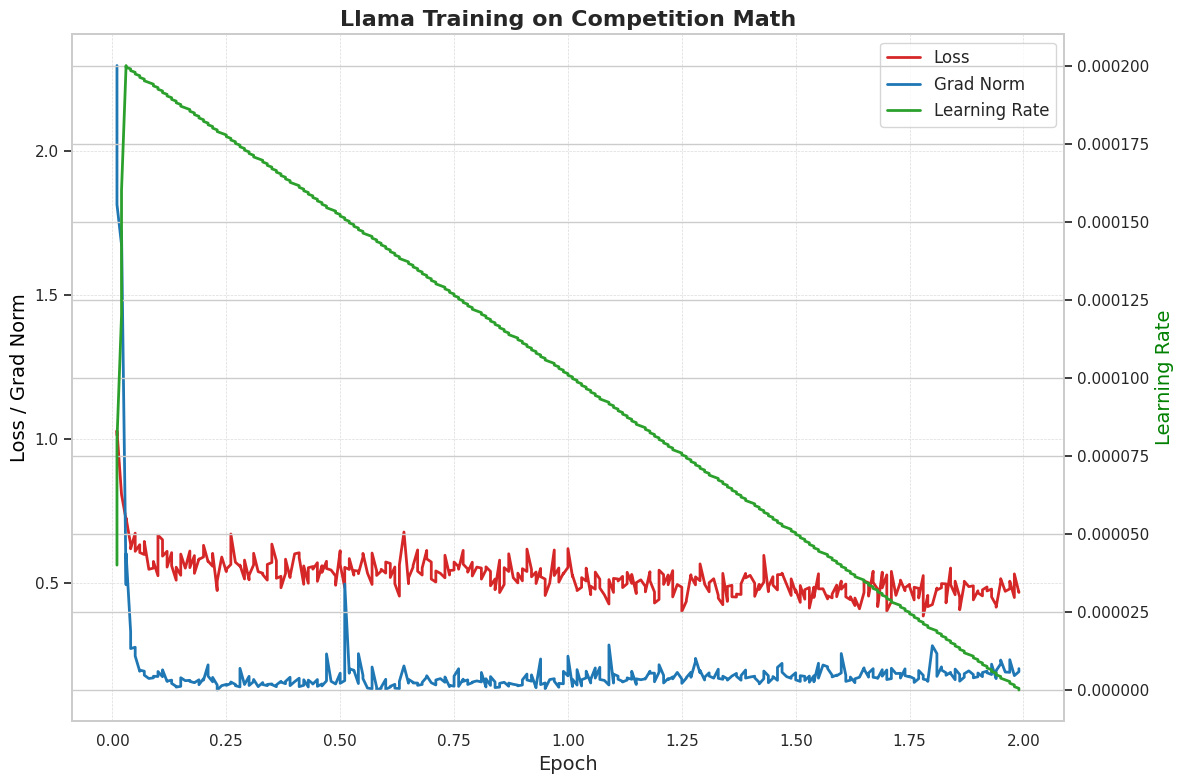

In [11]:
data = [
{'loss': 1.0135, 'grad_norm': 2.297593116760254, 'learning_rate': 4e-05, 'epoch': 0.01},
{'loss': 1.0303, 'grad_norm': 1.8150314092636108, 'learning_rate': 8e-05, 'epoch': 0.01},
{'loss': 0.8095, 'grad_norm': 1.6755486726760864, 'learning_rate': 0.00012, 'epoch': 0.02},
{'loss': 0.8084, 'grad_norm': 1.7221530675888062, 'learning_rate': 0.00016, 'epoch': 0.02},
{'loss': 0.7206, 'grad_norm': 0.49489209055900574, 'learning_rate': 0.0002, 'epoch': 0.03},
{'loss': 0.7266, 'grad_norm': 0.6034009456634521, 'learning_rate': 0.0001994579945799458, 'epoch': 0.03},
{'loss': 0.635, 'grad_norm': 0.3318101763725281, 'learning_rate': 0.0001989159891598916, 'epoch': 0.04},
{'loss': 0.6197, 'grad_norm': 0.27344468235969543, 'learning_rate': 0.0001983739837398374, 'epoch': 0.04},
{'loss': 0.6741, 'grad_norm': 0.27797171473503113, 'learning_rate': 0.00019783197831978321, 'epoch': 0.05},
{'loss': 0.6111, 'grad_norm': 0.24745947122573853, 'learning_rate': 0.000197289972899729, 'epoch': 0.05},
{'loss': 0.634, 'grad_norm': 0.1945214569568634, 'learning_rate': 0.00019674796747967482, 'epoch': 0.06},
{'loss': 0.6069, 'grad_norm': 0.19849224388599396, 'learning_rate': 0.0001962059620596206, 'epoch': 0.06},
{'loss': 0.5999, 'grad_norm': 0.1948724240064621, 'learning_rate': 0.0001956639566395664, 'epoch': 0.07},
{'loss': 0.6454, 'grad_norm': 0.18103307485580444, 'learning_rate': 0.0001951219512195122, 'epoch': 0.07},
{'loss': 0.5486, 'grad_norm': 0.16948987543582916, 'learning_rate': 0.000194579945799458, 'epoch': 0.08},
{'loss': 0.5528, 'grad_norm': 0.1716659963130951, 'learning_rate': 0.00019403794037940378, 'epoch': 0.09},
{'loss': 0.5759, 'grad_norm': 0.1772458851337433, 'learning_rate': 0.00019349593495934962, 'epoch': 0.09},
{'loss': 0.5262, 'grad_norm': 0.17641249299049377, 'learning_rate': 0.0001929539295392954, 'epoch': 0.1},
{'loss': 0.6671, 'grad_norm': 0.1938275694847107, 'learning_rate': 0.0001924119241192412, 'epoch': 0.1},
{'loss': 0.6513, 'grad_norm': 0.17558996379375458, 'learning_rate': 0.000191869918699187, 'epoch': 0.11},
{'loss': 0.5942, 'grad_norm': 0.199613556265831, 'learning_rate': 0.0001913279132791328, 'epoch': 0.11},
{'loss': 0.6112, 'grad_norm': 0.15940582752227783, 'learning_rate': 0.0001907859078590786, 'epoch': 0.12},
{'loss': 0.5562, 'grad_norm': 0.16026103496551514, 'learning_rate': 0.0001902439024390244, 'epoch': 0.12},
{'loss': 0.6065, 'grad_norm': 0.16378074884414673, 'learning_rate': 0.00018970189701897022, 'epoch': 0.13},
{'loss': 0.561, 'grad_norm': 0.1524372547864914, 'learning_rate': 0.000189159891598916, 'epoch': 0.13},
{'loss': 0.5107, 'grad_norm': 0.14214414358139038, 'learning_rate': 0.0001886178861788618, 'epoch': 0.14},
{'loss': 0.5559, 'grad_norm': 0.13963446021080017, 'learning_rate': 0.0001880758807588076, 'epoch': 0.14},
{'loss': 0.5279, 'grad_norm': 0.14225777983665466, 'learning_rate': 0.0001875338753387534, 'epoch': 0.15},
{'loss': 0.6014, 'grad_norm': 0.1721302568912506, 'learning_rate': 0.00018699186991869918, 'epoch': 0.15},
{'loss': 0.5526, 'grad_norm': 0.16189737617969513, 'learning_rate': 0.000186449864498645, 'epoch': 0.16},
{'loss': 0.6121, 'grad_norm': 0.16304408013820648, 'learning_rate': 0.00018590785907859078, 'epoch': 0.17},
{'loss': 0.5543, 'grad_norm': 0.15928831696510315, 'learning_rate': 0.0001853658536585366, 'epoch': 0.17},
{'loss': 0.5961, 'grad_norm': 0.15493400394916534, 'learning_rate': 0.0001848238482384824, 'epoch': 0.18},
{'loss': 0.5345, 'grad_norm': 0.1550203561782837, 'learning_rate': 0.0001842818428184282, 'epoch': 0.18},
{'loss': 0.5845, 'grad_norm': 0.16493360698223114, 'learning_rate': 0.000183739837398374, 'epoch': 0.19},
{'loss': 0.5829, 'grad_norm': 0.1480221003293991, 'learning_rate': 0.0001831978319783198, 'epoch': 0.19},
{'loss': 0.5914, 'grad_norm': 0.16879864037036896, 'learning_rate': 0.0001826558265582656, 'epoch': 0.2},
{'loss': 0.6319, 'grad_norm': 0.1639074683189392, 'learning_rate': 0.00018211382113821138, 'epoch': 0.2},
{'loss': 0.5754, 'grad_norm': 0.2168005108833313, 'learning_rate': 0.0001815718157181572, 'epoch': 0.21},
{'loss': 0.5767, 'grad_norm': 0.17791864275932312, 'learning_rate': 0.000181029810298103, 'epoch': 0.21},
{'loss': 0.5593, 'grad_norm': 0.15811043977737427, 'learning_rate': 0.0001804878048780488, 'epoch': 0.22},
{'loss': 0.604, 'grad_norm': 0.17322111129760742, 'learning_rate': 0.00017994579945799458, 'epoch': 0.22},
{'loss': 0.4747, 'grad_norm': 0.1470550149679184, 'learning_rate': 0.0001794037940379404, 'epoch': 0.23},
{'loss': 0.5079, 'grad_norm': 0.12943169474601746, 'learning_rate': 0.00017886178861788618, 'epoch': 0.23},
{'loss': 0.5911, 'grad_norm': 0.1447165310382843, 'learning_rate': 0.00017831978319783197, 'epoch': 0.24},
{'loss': 0.5406, 'grad_norm': 0.14896602928638458, 'learning_rate': 0.00017777777777777779, 'epoch': 0.25},
{'loss': 0.5488, 'grad_norm': 0.14562147855758667, 'learning_rate': 0.0001772357723577236, 'epoch': 0.25},
{'loss': 0.5655, 'grad_norm': 0.15198791027069092, 'learning_rate': 0.0001766937669376694, 'epoch': 0.26},
{'loss': 0.6712, 'grad_norm': 0.1573142558336258, 'learning_rate': 0.00017615176151761518, 'epoch': 0.26},
{'loss': 0.574, 'grad_norm': 0.1488279551267624, 'learning_rate': 0.000175609756097561, 'epoch': 0.27},
{'loss': 0.5732, 'grad_norm': 0.14454707503318787, 'learning_rate': 0.00017506775067750678, 'epoch': 0.27},
{'loss': 0.5593, 'grad_norm': 0.14028780162334442, 'learning_rate': 0.00017452574525745257, 'epoch': 0.28},
{'loss': 0.5633, 'grad_norm': 0.20475196838378906, 'learning_rate': 0.00017398373983739838, 'epoch': 0.28},
{'loss': 0.5149, 'grad_norm': 0.14980082213878632, 'learning_rate': 0.0001734417344173442, 'epoch': 0.29},
{'loss': 0.5806, 'grad_norm': 0.1486215591430664, 'learning_rate': 0.00017289972899728998, 'epoch': 0.29},
{'loss': 0.512, 'grad_norm': 0.17699064314365387, 'learning_rate': 0.0001723577235772358, 'epoch': 0.3},
{'loss': 0.5278, 'grad_norm': 0.1451343446969986, 'learning_rate': 0.00017181571815718158, 'epoch': 0.3},
{'loss': 0.564, 'grad_norm': 0.15874998271465302, 'learning_rate': 0.00017127371273712737, 'epoch': 0.31},
{'loss': 0.6043, 'grad_norm': 0.16603988409042358, 'learning_rate': 0.0001707317073170732, 'epoch': 0.31},
{'loss': 0.5403, 'grad_norm': 0.14124178886413574, 'learning_rate': 0.00017018970189701897, 'epoch': 0.32},
{'loss': 0.5351, 'grad_norm': 0.15539519488811493, 'learning_rate': 0.00016964769647696476, 'epoch': 0.33},
{'loss': 0.5302, 'grad_norm': 0.14846661686897278, 'learning_rate': 0.00016910569105691058, 'epoch': 0.33},
{'loss': 0.511, 'grad_norm': 0.14469389617443085, 'learning_rate': 0.0001685636856368564, 'epoch': 0.34},
{'loss': 0.5655, 'grad_norm': 0.14893539249897003, 'learning_rate': 0.00016802168021680218, 'epoch': 0.34},
{'loss': 0.5722, 'grad_norm': 0.15063385665416718, 'learning_rate': 0.00016747967479674797, 'epoch': 0.35},
{'loss': 0.6361, 'grad_norm': 0.1483517438173294, 'learning_rate': 0.00016693766937669378, 'epoch': 0.35},
{'loss': 0.5781, 'grad_norm': 0.14111296832561493, 'learning_rate': 0.00016639566395663957, 'epoch': 0.36},
{'loss': 0.5174, 'grad_norm': 0.14719031751155853, 'learning_rate': 0.00016585365853658536, 'epoch': 0.36},
{'loss': 0.5244, 'grad_norm': 0.15970036387443542, 'learning_rate': 0.00016531165311653117, 'epoch': 0.37},
{'loss': 0.4844, 'grad_norm': 0.15694071352481842, 'learning_rate': 0.00016476964769647699, 'epoch': 0.37},
{'loss': 0.5339, 'grad_norm': 0.1513359695672989, 'learning_rate': 0.00016422764227642277, 'epoch': 0.38},
{'loss': 0.5837, 'grad_norm': 0.15935350954532623, 'learning_rate': 0.00016368563685636856, 'epoch': 0.38},
{'loss': 0.52, 'grad_norm': 0.17376554012298584, 'learning_rate': 0.00016314363143631437, 'epoch': 0.39},
{'loss': 0.5241, 'grad_norm': 0.1446702778339386, 'learning_rate': 0.00016260162601626016, 'epoch': 0.39},
{'loss': 0.6022, 'grad_norm': 0.15836070477962494, 'learning_rate': 0.00016205962059620595, 'epoch': 0.4},
{'loss': 0.606, 'grad_norm': 0.17048481106758118, 'learning_rate': 0.00016151761517615176, 'epoch': 0.41},
{'loss': 0.5891, 'grad_norm': 0.14119644463062286, 'learning_rate': 0.00016097560975609758, 'epoch': 0.41},
{'loss': 0.4965, 'grad_norm': 0.14575132727622986, 'learning_rate': 0.00016043360433604337, 'epoch': 0.42},
{'loss': 0.5603, 'grad_norm': 0.16503529250621796, 'learning_rate': 0.00015989159891598918, 'epoch': 0.42},
{'loss': 0.5001, 'grad_norm': 0.1401369720697403, 'learning_rate': 0.00015934959349593497, 'epoch': 0.43},
{'loss': 0.5541, 'grad_norm': 0.163900688290596, 'learning_rate': 0.00015880758807588076, 'epoch': 0.43},
{'loss': 0.5581, 'grad_norm': 0.15161015093326569, 'learning_rate': 0.00015826558265582657, 'epoch': 0.44},
{'loss': 0.549, 'grad_norm': 0.15011422336101532, 'learning_rate': 0.00015772357723577236, 'epoch': 0.44},
{'loss': 0.5714, 'grad_norm': 0.1658460646867752, 'learning_rate': 0.00015718157181571815, 'epoch': 0.45},
{'loss': 0.5068, 'grad_norm': 0.14224764704704285, 'learning_rate': 0.00015663956639566396, 'epoch': 0.45},
{'loss': 0.561, 'grad_norm': 0.1505753993988037, 'learning_rate': 0.00015609756097560978, 'epoch': 0.46},
{'loss': 0.5379, 'grad_norm': 0.1436668187379837, 'learning_rate': 0.00015555555555555556, 'epoch': 0.46},
{'loss': 0.5765, 'grad_norm': 0.16132499277591705, 'learning_rate': 0.00015501355013550135, 'epoch': 0.47},
{'loss': 0.5513, 'grad_norm': 0.25486716628074646, 'learning_rate': 0.00015447154471544717, 'epoch': 0.47},
{'loss': 0.5461, 'grad_norm': 0.15974442660808563, 'learning_rate': 0.00015392953929539295, 'epoch': 0.48},
{'loss': 0.5252, 'grad_norm': 0.15047623217105865, 'learning_rate': 0.00015338753387533874, 'epoch': 0.49},
{'loss': 0.4932, 'grad_norm': 0.15085335075855255, 'learning_rate': 0.00015284552845528458, 'epoch': 0.49},
{'loss': 0.6132, 'grad_norm': 0.18778222799301147, 'learning_rate': 0.00015230352303523037, 'epoch': 0.5},
{'loss': 0.5652, 'grad_norm': 0.15271763503551483, 'learning_rate': 0.00015176151761517616, 'epoch': 0.5},
{'loss': 0.4854, 'grad_norm': 0.1620454639196396, 'learning_rate': 0.00015121951219512197, 'epoch': 0.51},
{'loss': 0.5554, 'grad_norm': 0.49746137857437134, 'learning_rate': 0.00015067750677506776, 'epoch': 0.51},
{'loss': 0.548, 'grad_norm': 0.18786749243736267, 'learning_rate': 0.00015013550135501355, 'epoch': 0.52},
{'loss': 0.5858, 'grad_norm': 0.20341500639915466, 'learning_rate': 0.00014959349593495936, 'epoch': 0.52},
{'loss': 0.5282, 'grad_norm': 0.19782544672489166, 'learning_rate': 0.00014905149051490515, 'epoch': 0.53},
{'loss': 0.5445, 'grad_norm': 0.1982501745223999, 'learning_rate': 0.00014850948509485096, 'epoch': 0.53},
{'loss': 0.5425, 'grad_norm': 0.15193070471286774, 'learning_rate': 0.00014796747967479675, 'epoch': 0.54},
{'loss': 0.5334, 'grad_norm': 0.25573456287384033, 'learning_rate': 0.00014742547425474257, 'epoch': 0.54},
{'loss': 0.5914, 'grad_norm': 0.18057289719581604, 'learning_rate': 0.00014688346883468835, 'epoch': 0.55},
{'loss': 0.6039, 'grad_norm': 0.16915388405323029, 'learning_rate': 0.00014634146341463414, 'epoch': 0.55},
{'loss': 0.5352, 'grad_norm': 0.13609564304351807, 'learning_rate': 0.00014579945799457996, 'epoch': 0.56},
{'loss': 0.496, 'grad_norm': 0.1336584836244583, 'learning_rate': 0.00014525745257452574, 'epoch': 0.57},
{'loss': 0.605, 'grad_norm': 0.20935212075710297, 'learning_rate': 0.00014471544715447156, 'epoch': 0.57},
{'loss': 0.5436, 'grad_norm': 0.13976173102855682, 'learning_rate': 0.00014417344173441735, 'epoch': 0.58},
{'loss': 0.5272, 'grad_norm': 0.13089661300182343, 'learning_rate': 0.00014363143631436316, 'epoch': 0.58},
{'loss': 0.5424, 'grad_norm': 0.13491860032081604, 'learning_rate': 0.00014308943089430895, 'epoch': 0.59},
{'loss': 0.5487, 'grad_norm': 0.13924537599086761, 'learning_rate': 0.00014254742547425473, 'epoch': 0.59},
{'loss': 0.5354, 'grad_norm': 0.16662940382957458, 'learning_rate': 0.00014200542005420055, 'epoch': 0.6},
{'loss': 0.574, 'grad_norm': 0.13187076151371002, 'learning_rate': 0.00014146341463414634, 'epoch': 0.6},
{'loss': 0.5689, 'grad_norm': 0.13960431516170502, 'learning_rate': 0.00014092140921409212, 'epoch': 0.61},
{'loss': 0.5201, 'grad_norm': 0.1423202008008957, 'learning_rate': 0.00014037940379403797, 'epoch': 0.61},
{'loss': 0.5566, 'grad_norm': 0.14916789531707764, 'learning_rate': 0.00013983739837398375, 'epoch': 0.62},
{'loss': 0.4986, 'grad_norm': 0.13578000664710999, 'learning_rate': 0.00013929539295392954, 'epoch': 0.62},
{'loss': 0.4554, 'grad_norm': 0.1344037801027298, 'learning_rate': 0.00013875338753387536, 'epoch': 0.63},
{'loss': 0.5642, 'grad_norm': 0.15946684777736664, 'learning_rate': 0.00013821138211382114, 'epoch': 0.63},
{'loss': 0.6781, 'grad_norm': 0.21304939687252045, 'learning_rate': 0.00013766937669376693, 'epoch': 0.64},
{'loss': 0.4985, 'grad_norm': 0.15317615866661072, 'learning_rate': 0.00013712737127371275, 'epoch': 0.65},
{'loss': 0.5181, 'grad_norm': 0.16654640436172485, 'learning_rate': 0.00013658536585365856, 'epoch': 0.65},
{'loss': 0.5561, 'grad_norm': 0.15656717121601105, 'learning_rate': 0.00013604336043360435, 'epoch': 0.66},
{'loss': 0.5613, 'grad_norm': 0.1539328694343567, 'learning_rate': 0.00013550135501355014, 'epoch': 0.66},
{'loss': 0.6158, 'grad_norm': 0.1536799967288971, 'learning_rate': 0.00013495934959349595, 'epoch': 0.67},
{'loss': 0.5419, 'grad_norm': 0.14578817784786224, 'learning_rate': 0.00013441734417344174, 'epoch': 0.67},
{'loss': 0.5286, 'grad_norm': 0.14876647293567657, 'learning_rate': 0.00013387533875338753, 'epoch': 0.68},
{'loss': 0.5531, 'grad_norm': 0.15580984950065613, 'learning_rate': 0.00013333333333333334, 'epoch': 0.68},
{'loss': 0.6141, 'grad_norm': 0.17441512644290924, 'learning_rate': 0.00013279132791327913, 'epoch': 0.69},
{'loss': 0.5849, 'grad_norm': 0.17895178496837616, 'learning_rate': 0.00013224932249322494, 'epoch': 0.69},
{'loss': 0.5739, 'grad_norm': 0.15513738989830017, 'learning_rate': 0.00013170731707317076, 'epoch': 0.7},
{'loss': 0.5147, 'grad_norm': 0.15478672087192535, 'learning_rate': 0.00013116531165311654, 'epoch': 0.7},
{'loss': 0.5044, 'grad_norm': 0.14705830812454224, 'learning_rate': 0.00013062330623306233, 'epoch': 0.71},
{'loss': 0.5429, 'grad_norm': 0.16435344517230988, 'learning_rate': 0.00013008130081300815, 'epoch': 0.71},
{'loss': 0.5345, 'grad_norm': 0.16902261972427368, 'learning_rate': 0.00012953929539295393, 'epoch': 0.72},
{'loss': 0.519, 'grad_norm': 0.15633228421211243, 'learning_rate': 0.00012899728997289972, 'epoch': 0.73},
{'loss': 0.5974, 'grad_norm': 0.17481018602848053, 'learning_rate': 0.00012845528455284554, 'epoch': 0.73},
{'loss': 0.5287, 'grad_norm': 0.1412036120891571, 'learning_rate': 0.00012791327913279135, 'epoch': 0.74},
{'loss': 0.5442, 'grad_norm': 0.14579929411411285, 'learning_rate': 0.00012737127371273714, 'epoch': 0.74},
{'loss': 0.546, 'grad_norm': 0.1428036242723465, 'learning_rate': 0.00012682926829268293, 'epoch': 0.75},
{'loss': 0.5739, 'grad_norm': 0.1775270253419876, 'learning_rate': 0.00012628726287262874, 'epoch': 0.75},
{'loss': 0.5574, 'grad_norm': 0.20324145257472992, 'learning_rate': 0.00012574525745257453, 'epoch': 0.76},
{'loss': 0.5489, 'grad_norm': 0.14216190576553345, 'learning_rate': 0.00012520325203252032, 'epoch': 0.76},
{'loss': 0.6143, 'grad_norm': 0.1671343445777893, 'learning_rate': 0.00012466124661246613, 'epoch': 0.77},
{'loss': 0.5665, 'grad_norm': 0.15936967730522156, 'learning_rate': 0.00012411924119241194, 'epoch': 0.77},
{'loss': 0.5497, 'grad_norm': 0.16455936431884766, 'learning_rate': 0.00012357723577235773, 'epoch': 0.78},
{'loss': 0.5385, 'grad_norm': 0.1486719250679016, 'learning_rate': 0.00012303523035230352, 'epoch': 0.78},
{'loss': 0.5732, 'grad_norm': 0.1548282653093338, 'learning_rate': 0.00012249322493224933, 'epoch': 0.79},
{'loss': 0.5253, 'grad_norm': 0.15702997148036957, 'learning_rate': 0.00012195121951219512, 'epoch': 0.79},
{'loss': 0.5563, 'grad_norm': 0.16108475625514984, 'learning_rate': 0.00012140921409214092, 'epoch': 0.8},
{'loss': 0.5529, 'grad_norm': 0.157566100358963, 'learning_rate': 0.00012086720867208672, 'epoch': 0.81},
{'loss': 0.5146, 'grad_norm': 0.1904318928718567, 'learning_rate': 0.00012032520325203254, 'epoch': 0.81},
{'loss': 0.5462, 'grad_norm': 0.13999401032924652, 'learning_rate': 0.00011978319783197834, 'epoch': 0.82},
{'loss': 0.5572, 'grad_norm': 0.1686147153377533, 'learning_rate': 0.00011924119241192413, 'epoch': 0.82},
{'loss': 0.5414, 'grad_norm': 0.14553202688694, 'learning_rate': 0.00011869918699186993, 'epoch': 0.83},
{'loss': 0.4914, 'grad_norm': 0.1761407107114792, 'learning_rate': 0.00011815718157181573, 'epoch': 0.83},
{'loss': 0.5148, 'grad_norm': 0.15739619731903076, 'learning_rate': 0.00011761517615176152, 'epoch': 0.84},
{'loss': 0.4777, 'grad_norm': 0.13805735111236572, 'learning_rate': 0.00011707317073170732, 'epoch': 0.84},
{'loss': 0.5805, 'grad_norm': 0.1395314484834671, 'learning_rate': 0.0001165311653116531, 'epoch': 0.85},
{'loss': 0.4678, 'grad_norm': 0.15276286005973816, 'learning_rate': 0.00011598915989159893, 'epoch': 0.85},
{'loss': 0.496, 'grad_norm': 0.156273752450943, 'learning_rate': 0.00011544715447154472, 'epoch': 0.86},
{'loss': 0.5544, 'grad_norm': 0.15635474026203156, 'learning_rate': 0.00011490514905149052, 'epoch': 0.86},
{'loss': 0.5409, 'grad_norm': 0.1426176279783249, 'learning_rate': 0.00011436314363143632, 'epoch': 0.87},
{'loss': 0.6025, 'grad_norm': 0.1535450667142868, 'learning_rate': 0.00011382113821138211, 'epoch': 0.87},
{'loss': 0.5194, 'grad_norm': 0.14932680130004883, 'learning_rate': 0.00011327913279132791, 'epoch': 0.88},
{'loss': 0.5013, 'grad_norm': 0.14646349847316742, 'learning_rate': 0.00011273712737127371, 'epoch': 0.89},
{'loss': 0.5352, 'grad_norm': 0.14408785104751587, 'learning_rate': 0.00011219512195121953, 'epoch': 0.89},
{'loss': 0.5086, 'grad_norm': 0.14683040976524353, 'learning_rate': 0.00011165311653116533, 'epoch': 0.9},
{'loss': 0.5508, 'grad_norm': 0.16463786363601685, 'learning_rate': 0.00011111111111111112, 'epoch': 0.9},
{'loss': 0.5409, 'grad_norm': 0.18485546112060547, 'learning_rate': 0.00011056910569105692, 'epoch': 0.91},
{'loss': 0.6187, 'grad_norm': 0.16434118151664734, 'learning_rate': 0.00011002710027100272, 'epoch': 0.91},
{'loss': 0.5481, 'grad_norm': 0.16021056473255157, 'learning_rate': 0.0001094850948509485, 'epoch': 0.92},
{'loss': 0.5225, 'grad_norm': 0.18207116425037384, 'learning_rate': 0.00010894308943089431, 'epoch': 0.92},
{'loss': 0.5392, 'grad_norm': 0.13750451803207397, 'learning_rate': 0.00010840108401084011, 'epoch': 0.93},
{'loss': 0.4992, 'grad_norm': 0.14279291033744812, 'learning_rate': 0.00010785907859078592, 'epoch': 0.93},
{'loss': 0.5516, 'grad_norm': 0.23729026317596436, 'learning_rate': 0.00010731707317073172, 'epoch': 0.94},
{'loss': 0.523, 'grad_norm': 0.14827147126197815, 'learning_rate': 0.00010677506775067751, 'epoch': 0.94},
{'loss': 0.5145, 'grad_norm': 0.1540622115135193, 'learning_rate': 0.00010623306233062331, 'epoch': 0.95},
{'loss': 0.4576, 'grad_norm': 0.13410253822803497, 'learning_rate': 0.00010569105691056911, 'epoch': 0.95},
{'loss': 0.5011, 'grad_norm': 0.16580742597579956, 'learning_rate': 0.0001051490514905149, 'epoch': 0.96},
{'loss': 0.6157, 'grad_norm': 0.16869349777698517, 'learning_rate': 0.0001046070460704607, 'epoch': 0.97},
{'loss': 0.527, 'grad_norm': 0.15998846292495728, 'learning_rate': 0.00010406504065040652, 'epoch': 0.97},
{'loss': 0.5532, 'grad_norm': 0.1391654759645462, 'learning_rate': 0.00010352303523035232, 'epoch': 0.98},
{'loss': 0.5041, 'grad_norm': 0.1525806486606598, 'learning_rate': 0.00010298102981029812, 'epoch': 0.98},
{'loss': 0.5351, 'grad_norm': 0.1511034369468689, 'learning_rate': 0.0001024390243902439, 'epoch': 0.99},
{'loss': 0.5328, 'grad_norm': 0.19441919028759003, 'learning_rate': 0.00010189701897018971, 'epoch': 0.99},
{'loss': 0.5552, 'grad_norm': 0.17853637039661407, 'learning_rate': 0.00010135501355013551, 'epoch': 1.0},
{'loss': 0.6204, 'grad_norm': 0.24701853096485138, 'learning_rate': 0.0001008130081300813, 'epoch': 1.0},
{'loss': 0.5233, 'grad_norm': 0.14176376163959503, 'learning_rate': 0.0001002710027100271, 'epoch': 1.01},
{'loss': 0.5275, 'grad_norm': 0.16679368913173676, 'learning_rate': 9.97289972899729e-05, 'epoch': 1.01},
{'loss': 0.4795, 'grad_norm': 0.14669078588485718, 'learning_rate': 9.91869918699187e-05, 'epoch': 1.02},
{'loss': 0.4746, 'grad_norm': 0.2002122849225998, 'learning_rate': 9.86449864498645e-05, 'epoch': 1.02},
{'loss': 0.4862, 'grad_norm': 0.1435057371854782, 'learning_rate': 9.81029810298103e-05, 'epoch': 1.03},
{'loss': 0.5197, 'grad_norm': 0.16506986320018768, 'learning_rate': 9.75609756097561e-05, 'epoch': 1.03},
{'loss': 0.5078, 'grad_norm': 0.1714775413274765, 'learning_rate': 9.701897018970189e-05, 'epoch': 1.04},
{'loss': 0.5528, 'grad_norm': 0.19491039216518402, 'learning_rate': 9.64769647696477e-05, 'epoch': 1.04},
{'loss': 0.4604, 'grad_norm': 0.153851717710495, 'learning_rate': 9.59349593495935e-05, 'epoch': 1.05},
{'loss': 0.49, 'grad_norm': 0.16602951288223267, 'learning_rate': 9.53929539295393e-05, 'epoch': 1.05},
{'loss': 0.4795, 'grad_norm': 0.20610342919826508, 'learning_rate': 9.485094850948511e-05, 'epoch': 1.06},
{'loss': 0.539, 'grad_norm': 0.17082463204860687, 'learning_rate': 9.43089430894309e-05, 'epoch': 1.06},
{'loss': 0.5141, 'grad_norm': 0.20832793414592743, 'learning_rate': 9.37669376693767e-05, 'epoch': 1.07},
{'loss': 0.4836, 'grad_norm': 0.16608822345733643, 'learning_rate': 9.32249322493225e-05, 'epoch': 1.07},
{'loss': 0.4601, 'grad_norm': 0.16281168162822723, 'learning_rate': 9.26829268292683e-05, 'epoch': 1.08},
{'loss': 0.4281, 'grad_norm': 0.1468949168920517, 'learning_rate': 9.21409214092141e-05, 'epoch': 1.09},
{'loss': 0.5128, 'grad_norm': 0.28593215346336365, 'learning_rate': 9.15989159891599e-05, 'epoch': 1.09},
{'loss': 0.4683, 'grad_norm': 0.15361936390399933, 'learning_rate': 9.105691056910569e-05, 'epoch': 1.1},
{'loss': 0.517, 'grad_norm': 0.1847308725118637, 'learning_rate': 9.05149051490515e-05, 'epoch': 1.1},
{'loss': 0.515, 'grad_norm': 0.17773312330245972, 'learning_rate': 8.997289972899729e-05, 'epoch': 1.11},
{'loss': 0.5078, 'grad_norm': 0.16689513623714447, 'learning_rate': 8.943089430894309e-05, 'epoch': 1.11},
{'loss': 0.5241, 'grad_norm': 0.15950119495391846, 'learning_rate': 8.888888888888889e-05, 'epoch': 1.12},
{'loss': 0.485, 'grad_norm': 0.15736110508441925, 'learning_rate': 8.83468834688347e-05, 'epoch': 1.12},
{'loss': 0.4986, 'grad_norm': 0.16416287422180176, 'learning_rate': 8.78048780487805e-05, 'epoch': 1.13},
{'loss': 0.5382, 'grad_norm': 0.17161287367343903, 'learning_rate': 8.726287262872628e-05, 'epoch': 1.13},
{'loss': 0.4997, 'grad_norm': 0.1666855663061142, 'learning_rate': 8.67208672086721e-05, 'epoch': 1.14},
{'loss': 0.5309, 'grad_norm': 0.1945405900478363, 'learning_rate': 8.61788617886179e-05, 'epoch': 1.14},
{'loss': 0.4643, 'grad_norm': 0.14875996112823486, 'learning_rate': 8.563685636856369e-05, 'epoch': 1.15},
{'loss': 0.5023, 'grad_norm': 0.16831430792808533, 'learning_rate': 8.509485094850949e-05, 'epoch': 1.15},
{'loss': 0.512, 'grad_norm': 0.16516709327697754, 'learning_rate': 8.455284552845529e-05, 'epoch': 1.16},
{'loss': 0.4889, 'grad_norm': 0.16847831010818481, 'learning_rate': 8.401084010840109e-05, 'epoch': 1.17},
{'loss': 0.4702, 'grad_norm': 0.1681237667798996, 'learning_rate': 8.346883468834689e-05, 'epoch': 1.17},
{'loss': 0.5402, 'grad_norm': 0.19472043216228485, 'learning_rate': 8.292682926829268e-05, 'epoch': 1.18},
{'loss': 0.5091, 'grad_norm': 0.18791835010051727, 'learning_rate': 8.238482384823849e-05, 'epoch': 1.18},
{'loss': 0.4698, 'grad_norm': 0.18801558017730713, 'learning_rate': 8.184281842818428e-05, 'epoch': 1.19},
{'loss': 0.4315, 'grad_norm': 0.15806305408477783, 'learning_rate': 8.130081300813008e-05, 'epoch': 1.19},
{'loss': 0.4439, 'grad_norm': 0.1911899298429489, 'learning_rate': 8.075880758807588e-05, 'epoch': 1.2},
{'loss': 0.5457, 'grad_norm': 0.217219278216362, 'learning_rate': 8.021680216802168e-05, 'epoch': 1.2},
{'loss': 0.53, 'grad_norm': 0.18041843175888062, 'learning_rate': 7.967479674796748e-05, 'epoch': 1.21},
{'loss': 0.4961, 'grad_norm': 0.1538913995027542, 'learning_rate': 7.913279132791329e-05, 'epoch': 1.21},
{'loss': 0.5289, 'grad_norm': 0.1691756397485733, 'learning_rate': 7.859078590785907e-05, 'epoch': 1.22},
{'loss': 0.495, 'grad_norm': 0.1653527021408081, 'learning_rate': 7.804878048780489e-05, 'epoch': 1.22},
{'loss': 0.544, 'grad_norm': 0.17501313984394073, 'learning_rate': 7.750677506775068e-05, 'epoch': 1.23},
{'loss': 0.4527, 'grad_norm': 0.1682264506816864, 'learning_rate': 7.696476964769648e-05, 'epoch': 1.23},
{'loss': 0.4958, 'grad_norm': 0.19055992364883423, 'learning_rate': 7.642276422764229e-05, 'epoch': 1.24},
{'loss': 0.4865, 'grad_norm': 0.16794967651367188, 'learning_rate': 7.588075880758808e-05, 'epoch': 1.25},
{'loss': 0.4022, 'grad_norm': 0.1526433378458023, 'learning_rate': 7.533875338753388e-05, 'epoch': 1.25},
{'loss': 0.4375, 'grad_norm': 0.1709192991256714, 'learning_rate': 7.479674796747968e-05, 'epoch': 1.26},
{'loss': 0.4424, 'grad_norm': 0.17289213836193085, 'learning_rate': 7.425474254742548e-05, 'epoch': 1.26},
{'loss': 0.5297, 'grad_norm': 0.19135864078998566, 'learning_rate': 7.371273712737128e-05, 'epoch': 1.27},
{'loss': 0.5237, 'grad_norm': 0.17358456552028656, 'learning_rate': 7.317073170731707e-05, 'epoch': 1.27},
{'loss': 0.4946, 'grad_norm': 0.2283419370651245, 'learning_rate': 7.262872628726287e-05, 'epoch': 1.28},
{'loss': 0.5224, 'grad_norm': 0.23918676376342773, 'learning_rate': 7.208672086720867e-05, 'epoch': 1.28},
{'loss': 0.5088, 'grad_norm': 0.18916715681552887, 'learning_rate': 7.154471544715447e-05, 'epoch': 1.29},
{'loss': 0.5674, 'grad_norm': 0.19751495122909546, 'learning_rate': 7.100271002710027e-05, 'epoch': 1.29},
{'loss': 0.4997, 'grad_norm': 0.16427938640117645, 'learning_rate': 7.046070460704606e-05, 'epoch': 1.3},
{'loss': 0.497, 'grad_norm': 0.17361518740653992, 'learning_rate': 6.991869918699188e-05, 'epoch': 1.3},
{'loss': 0.4705, 'grad_norm': 0.1890893429517746, 'learning_rate': 6.937669376693768e-05, 'epoch': 1.31},
{'loss': 0.5021, 'grad_norm': 0.17810137569904327, 'learning_rate': 6.883468834688347e-05, 'epoch': 1.31},
{'loss': 0.5158, 'grad_norm': 0.1706480234861374, 'learning_rate': 6.829268292682928e-05, 'epoch': 1.32},
{'loss': 0.4579, 'grad_norm': 0.20177718997001648, 'learning_rate': 6.775067750677507e-05, 'epoch': 1.33},
{'loss': 0.4485, 'grad_norm': 0.17013812065124512, 'learning_rate': 6.720867208672087e-05, 'epoch': 1.33},
{'loss': 0.4256, 'grad_norm': 0.16669467091560364, 'learning_rate': 6.666666666666667e-05, 'epoch': 1.34},
{'loss': 0.5345, 'grad_norm': 0.177536740899086, 'learning_rate': 6.612466124661247e-05, 'epoch': 1.34},
{'loss': 0.4371, 'grad_norm': 0.16845259070396423, 'learning_rate': 6.558265582655827e-05, 'epoch': 1.35},
{'loss': 0.4892, 'grad_norm': 0.16373109817504883, 'learning_rate': 6.504065040650407e-05, 'epoch': 1.35},
{'loss': 0.493, 'grad_norm': 0.17749176919460297, 'learning_rate': 6.449864498644986e-05, 'epoch': 1.36},
{'loss': 0.4531, 'grad_norm': 0.17798615992069244, 'learning_rate': 6.395663956639568e-05, 'epoch': 1.36},
{'loss': 0.4523, 'grad_norm': 0.18717600405216217, 'learning_rate': 6.341463414634146e-05, 'epoch': 1.37},
{'loss': 0.4625, 'grad_norm': 0.17704619467258453, 'learning_rate': 6.287262872628726e-05, 'epoch': 1.37},
{'loss': 0.4612, 'grad_norm': 0.16354124248027802, 'learning_rate': 6.233062330623306e-05, 'epoch': 1.38},
{'loss': 0.4982, 'grad_norm': 0.17939917743206024, 'learning_rate': 6.178861788617887e-05, 'epoch': 1.38},
{'loss': 0.5343, 'grad_norm': 0.19885559380054474, 'learning_rate': 6.124661246612467e-05, 'epoch': 1.39},
{'loss': 0.5188, 'grad_norm': 0.1708485186100006, 'learning_rate': 6.070460704607046e-05, 'epoch': 1.39},
{'loss': 0.5276, 'grad_norm': 0.17450594902038574, 'learning_rate': 6.016260162601627e-05, 'epoch': 1.4},
{'loss': 0.5003, 'grad_norm': 0.17744964361190796, 'learning_rate': 5.9620596205962064e-05, 'epoch': 1.41},
{'loss': 0.4547, 'grad_norm': 0.17177575826644897, 'learning_rate': 5.9078590785907865e-05, 'epoch': 1.41},
{'loss': 0.4964, 'grad_norm': 0.1558925062417984, 'learning_rate': 5.853658536585366e-05, 'epoch': 1.42},
{'loss': 0.4785, 'grad_norm': 0.15077711641788483, 'learning_rate': 5.799457994579947e-05, 'epoch': 1.42},
{'loss': 0.5041, 'grad_norm': 0.16879722476005554, 'learning_rate': 5.745257452574526e-05, 'epoch': 1.43},
{'loss': 0.5971, 'grad_norm': 0.19543197751045227, 'learning_rate': 5.6910569105691056e-05, 'epoch': 1.43},
{'loss': 0.4708, 'grad_norm': 0.17896637320518494, 'learning_rate': 5.6368563685636857e-05, 'epoch': 1.44},
{'loss': 0.486, 'grad_norm': 0.15488563477993011, 'learning_rate': 5.5826558265582664e-05, 'epoch': 1.44},
{'loss': 0.5229, 'grad_norm': 0.17052307724952698, 'learning_rate': 5.528455284552846e-05, 'epoch': 1.45},
{'loss': 0.494, 'grad_norm': 0.1763060837984085, 'learning_rate': 5.474254742547425e-05, 'epoch': 1.45},
{'loss': 0.4768, 'grad_norm': 0.16319580376148224, 'learning_rate': 5.4200542005420054e-05, 'epoch': 1.46},
{'loss': 0.53, 'grad_norm': 0.20823994278907776, 'learning_rate': 5.365853658536586e-05, 'epoch': 1.46},
{'loss': 0.5304, 'grad_norm': 0.22206313908100128, 'learning_rate': 5.3116531165311656e-05, 'epoch': 1.47},
{'loss': 0.5352, 'grad_norm': 0.19137264788150787, 'learning_rate': 5.257452574525745e-05, 'epoch': 1.47},
{'loss': 0.4964, 'grad_norm': 0.1760362833738327, 'learning_rate': 5.203252032520326e-05, 'epoch': 1.48},
{'loss': 0.4577, 'grad_norm': 0.17009203135967255, 'learning_rate': 5.149051490514906e-05, 'epoch': 1.49},
{'loss': 0.5154, 'grad_norm': 0.17576269805431366, 'learning_rate': 5.0948509485094854e-05, 'epoch': 1.49},
{'loss': 0.4681, 'grad_norm': 0.18927957117557526, 'learning_rate': 5.040650406504065e-05, 'epoch': 1.5},
{'loss': 0.4772, 'grad_norm': 0.16464386880397797, 'learning_rate': 4.986449864498645e-05, 'epoch': 1.5},
{'loss': 0.4338, 'grad_norm': 0.15936759114265442, 'learning_rate': 4.932249322493225e-05, 'epoch': 1.51},
{'loss': 0.4923, 'grad_norm': 0.17920981347560883, 'learning_rate': 4.878048780487805e-05, 'epoch': 1.51},
{'loss': 0.4448, 'grad_norm': 0.17687702178955078, 'learning_rate': 4.823848238482385e-05, 'epoch': 1.52},
{'loss': 0.4778, 'grad_norm': 0.1623980849981308, 'learning_rate': 4.769647696476965e-05, 'epoch': 1.52},
{'loss': 0.4852, 'grad_norm': 0.1780010610818863, 'learning_rate': 4.715447154471545e-05, 'epoch': 1.53},
{'loss': 0.4138, 'grad_norm': 0.15659429132938385, 'learning_rate': 4.661246612466125e-05, 'epoch': 1.53},
{'loss': 0.4867, 'grad_norm': 0.17904621362686157, 'learning_rate': 4.607046070460705e-05, 'epoch': 1.54},
{'loss': 0.4507, 'grad_norm': 0.1579599231481552, 'learning_rate': 4.5528455284552844e-05, 'epoch': 1.54},
{'loss': 0.5331, 'grad_norm': 0.2223706990480423, 'learning_rate': 4.4986449864498645e-05, 'epoch': 1.55},
{'loss': 0.4807, 'grad_norm': 0.17070607841014862, 'learning_rate': 4.4444444444444447e-05, 'epoch': 1.55},
{'loss': 0.4808, 'grad_norm': 0.21634335815906525, 'learning_rate': 4.390243902439025e-05, 'epoch': 1.56},
{'loss': 0.4458, 'grad_norm': 0.21041004359722137, 'learning_rate': 4.336043360433605e-05, 'epoch': 1.57},
{'loss': 0.4565, 'grad_norm': 0.20419955253601074, 'learning_rate': 4.281842818428184e-05, 'epoch': 1.57},
{'loss': 0.4493, 'grad_norm': 0.1809328943490982, 'learning_rate': 4.2276422764227644e-05, 'epoch': 1.58},
{'loss': 0.4626, 'grad_norm': 0.17493444681167603, 'learning_rate': 4.1734417344173445e-05, 'epoch': 1.58},
{'loss': 0.4937, 'grad_norm': 0.18133093416690826, 'learning_rate': 4.1192411924119246e-05, 'epoch': 1.59},
{'loss': 0.4534, 'grad_norm': 0.17893289029598236, 'learning_rate': 4.065040650406504e-05, 'epoch': 1.59},
{'loss': 0.5076, 'grad_norm': 0.18871821463108063, 'learning_rate': 4.010840108401084e-05, 'epoch': 1.6},
{'loss': 0.4795, 'grad_norm': 0.2561679780483246, 'learning_rate': 3.956639566395664e-05, 'epoch': 1.6},
{'loss': 0.4976, 'grad_norm': 0.18070967495441437, 'learning_rate': 3.9024390243902444e-05, 'epoch': 1.61},
{'loss': 0.453, 'grad_norm': 0.15953050553798676, 'learning_rate': 3.848238482384824e-05, 'epoch': 1.61},
{'loss': 0.443, 'grad_norm': 0.16358725726604462, 'learning_rate': 3.794037940379404e-05, 'epoch': 1.62},
{'loss': 0.4534, 'grad_norm': 0.17455174028873444, 'learning_rate': 3.739837398373984e-05, 'epoch': 1.62},
{'loss': 0.4227, 'grad_norm': 0.15506045520305634, 'learning_rate': 3.685636856368564e-05, 'epoch': 1.63},
{'loss': 0.4488, 'grad_norm': 0.1683955192565918, 'learning_rate': 3.6314363143631436e-05, 'epoch': 1.63},
{'loss': 0.4116, 'grad_norm': 0.1738472431898117, 'learning_rate': 3.577235772357724e-05, 'epoch': 1.64},
{'loss': 0.4682, 'grad_norm': 0.2064785659313202, 'learning_rate': 3.523035230352303e-05, 'epoch': 1.65},
{'loss': 0.5084, 'grad_norm': 0.20208880305290222, 'learning_rate': 3.468834688346884e-05, 'epoch': 1.65},
{'loss': 0.5017, 'grad_norm': 0.17422151565551758, 'learning_rate': 3.414634146341464e-05, 'epoch': 1.66},
{'loss': 0.4555, 'grad_norm': 0.18838612735271454, 'learning_rate': 3.3604336043360434e-05, 'epoch': 1.66},
{'loss': 0.5419, 'grad_norm': 0.20364783704280853, 'learning_rate': 3.3062330623306235e-05, 'epoch': 1.67},
{'loss': 0.5033, 'grad_norm': 0.17364485561847687, 'learning_rate': 3.2520325203252037e-05, 'epoch': 1.67},
{'loss': 0.4794, 'grad_norm': 0.17130543291568756, 'learning_rate': 3.197831978319784e-05, 'epoch': 1.68},
{'loss': 0.419, 'grad_norm': 0.16995301842689514, 'learning_rate': 3.143631436314363e-05, 'epoch': 1.68},
{'loss': 0.5386, 'grad_norm': 0.19992689788341522, 'learning_rate': 3.089430894308943e-05, 'epoch': 1.69},
{'loss': 0.4842, 'grad_norm': 0.17760470509529114, 'learning_rate': 3.035230352303523e-05, 'epoch': 1.69},
{'loss': 0.5293, 'grad_norm': 0.19900070130825043, 'learning_rate': 2.9810298102981032e-05, 'epoch': 1.7},
{'loss': 0.4037, 'grad_norm': 0.1658841222524643, 'learning_rate': 2.926829268292683e-05, 'epoch': 1.7},
{'loss': 0.4368, 'grad_norm': 0.16891327500343323, 'learning_rate': 2.872628726287263e-05, 'epoch': 1.71},
{'loss': 0.5414, 'grad_norm': 0.2051023542881012, 'learning_rate': 2.8184281842818428e-05, 'epoch': 1.71},
{'loss': 0.4581, 'grad_norm': 0.18668580055236816, 'learning_rate': 2.764227642276423e-05, 'epoch': 1.72},
{'loss': 0.5046, 'grad_norm': 0.18745119869709015, 'learning_rate': 2.7100271002710027e-05, 'epoch': 1.73},
{'loss': 0.5111, 'grad_norm': 0.17096088826656342, 'learning_rate': 2.6558265582655828e-05, 'epoch': 1.73},
{'loss': 0.4742, 'grad_norm': 0.20296870172023773, 'learning_rate': 2.601626016260163e-05, 'epoch': 1.74},
{'loss': 0.4843, 'grad_norm': 0.17923586070537567, 'learning_rate': 2.5474254742547427e-05, 'epoch': 1.74},
{'loss': 0.4965, 'grad_norm': 0.1749034821987152, 'learning_rate': 2.4932249322493225e-05, 'epoch': 1.75},
{'loss': 0.4884, 'grad_norm': 0.17664708197116852, 'learning_rate': 2.4390243902439026e-05, 'epoch': 1.75},
{'loss': 0.4423, 'grad_norm': 0.16912905871868134, 'learning_rate': 2.3848238482384823e-05, 'epoch': 1.76},
{'loss': 0.4864, 'grad_norm': 0.15579476952552795, 'learning_rate': 2.3306233062330625e-05, 'epoch': 1.76},
{'loss': 0.4825, 'grad_norm': 0.16886086761951447, 'learning_rate': 2.2764227642276422e-05, 'epoch': 1.77},
{'loss': 0.4489, 'grad_norm': 0.19709660112857819, 'learning_rate': 2.2222222222222223e-05, 'epoch': 1.77},
{'loss': 0.5268, 'grad_norm': 0.18052569031715393, 'learning_rate': 2.1680216802168024e-05, 'epoch': 1.78},
{'loss': 0.3864, 'grad_norm': 0.1674073189496994, 'learning_rate': 2.1138211382113822e-05, 'epoch': 1.78},
{'loss': 0.4581, 'grad_norm': 0.16325971484184265, 'learning_rate': 2.0596205962059623e-05, 'epoch': 1.79},
{'loss': 0.419, 'grad_norm': 0.15927182137966156, 'learning_rate': 2.005420054200542e-05, 'epoch': 1.79},
{'loss': 0.4261, 'grad_norm': 0.283286452293396, 'learning_rate': 1.9512195121951222e-05, 'epoch': 1.8},
{'loss': 0.4835, 'grad_norm': 0.25585445761680603, 'learning_rate': 1.897018970189702e-05, 'epoch': 1.81},
{'loss': 0.4768, 'grad_norm': 0.17691855132579803, 'learning_rate': 1.842818428184282e-05, 'epoch': 1.81},
{'loss': 0.4844, 'grad_norm': 0.2098279595375061, 'learning_rate': 1.788617886178862e-05, 'epoch': 1.82},
{'loss': 0.499, 'grad_norm': 0.19910302758216858, 'learning_rate': 1.734417344173442e-05, 'epoch': 1.82},
{'loss': 0.498, 'grad_norm': 0.18924693763256073, 'learning_rate': 1.6802168021680217e-05, 'epoch': 1.83},
{'loss': 0.432, 'grad_norm': 0.18066516518592834, 'learning_rate': 1.6260162601626018e-05, 'epoch': 1.83},
{'loss': 0.5531, 'grad_norm': 0.19074660539627075, 'learning_rate': 1.5718157181571816e-05, 'epoch': 1.84},
{'loss': 0.4957, 'grad_norm': 0.1869630664587021, 'learning_rate': 1.5176151761517615e-05, 'epoch': 1.84},
{'loss': 0.4603, 'grad_norm': 0.16541607677936554, 'learning_rate': 1.4634146341463415e-05, 'epoch': 1.85},
{'loss': 0.5075, 'grad_norm': 0.20225483179092407, 'learning_rate': 1.4092140921409214e-05, 'epoch': 1.85},
{'loss': 0.4523, 'grad_norm': 0.1835254430770874, 'learning_rate': 1.3550135501355014e-05, 'epoch': 1.86},
{'loss': 0.4081, 'grad_norm': 0.16007734835147858, 'learning_rate': 1.3008130081300815e-05, 'epoch': 1.86},
{'loss': 0.4976, 'grad_norm': 0.17394158244132996, 'learning_rate': 1.2466124661246612e-05, 'epoch': 1.87},
{'loss': 0.5072, 'grad_norm': 0.18586425483226776, 'learning_rate': 1.1924119241192412e-05, 'epoch': 1.87},
{'loss': 0.4884, 'grad_norm': 0.19595420360565186, 'learning_rate': 1.1382113821138211e-05, 'epoch': 1.88},
{'loss': 0.4912, 'grad_norm': 0.1830514669418335, 'learning_rate': 1.0840108401084012e-05, 'epoch': 1.89},
{'loss': 0.4425, 'grad_norm': 0.17183998227119446, 'learning_rate': 1.0298102981029812e-05, 'epoch': 1.89},
{'loss': 0.4739, 'grad_norm': 0.17548015713691711, 'learning_rate': 9.756097560975611e-06, 'epoch': 1.9},
{'loss': 0.4669, 'grad_norm': 0.18863044679164886, 'learning_rate': 9.21409214092141e-06, 'epoch': 1.9},
{'loss': 0.4563, 'grad_norm': 0.17586292326450348, 'learning_rate': 8.67208672086721e-06, 'epoch': 1.91},
{'loss': 0.4774, 'grad_norm': 0.19027172029018402, 'learning_rate': 8.130081300813009e-06, 'epoch': 1.91},
{'loss': 0.4873, 'grad_norm': 0.19476063549518585, 'learning_rate': 7.588075880758808e-06, 'epoch': 1.92},
{'loss': 0.4734, 'grad_norm': 0.18921694159507751, 'learning_rate': 7.046070460704607e-06, 'epoch': 1.92},
{'loss': 0.4799, 'grad_norm': 0.18323618173599243, 'learning_rate': 6.504065040650407e-06, 'epoch': 1.93},
{'loss': 0.4528, 'grad_norm': 0.21927767992019653, 'learning_rate': 5.962059620596206e-06, 'epoch': 1.93},
{'loss': 0.4242, 'grad_norm': 0.16900098323822021, 'learning_rate': 5.420054200542006e-06, 'epoch': 1.94},
{'loss': 0.417, 'grad_norm': 0.1967736929655075, 'learning_rate': 4.8780487804878055e-06, 'epoch': 1.94},
{'loss': 0.505, 'grad_norm': 0.22008034586906433, 'learning_rate': 4.336043360433605e-06, 'epoch': 1.95},
{'loss': 0.5161, 'grad_norm': 0.23352782428264618, 'learning_rate': 3.794037940379404e-06, 'epoch': 1.95},
{'loss': 0.4722, 'grad_norm': 0.19192908704280853, 'learning_rate': 3.2520325203252037e-06, 'epoch': 1.96},
{'loss': 0.4807, 'grad_norm': 0.19088363647460938, 'learning_rate': 2.710027100271003e-06, 'epoch': 1.97},
{'loss': 0.5074, 'grad_norm': 0.23466670513153076, 'learning_rate': 2.1680216802168024e-06, 'epoch': 1.97},
{'loss': 0.4506, 'grad_norm': 0.18041174113750458, 'learning_rate': 1.6260162601626018e-06, 'epoch': 1.98},
{'loss': 0.5327, 'grad_norm': 0.17950457334518433, 'learning_rate': 1.0840108401084012e-06, 'epoch': 1.98},
{'loss': 0.4682, 'grad_norm': 0.19319471716880798, 'learning_rate': 5.420054200542006e-07, 'epoch': 1.99},
{'loss': 0.4703, 'grad_norm': 0.20375144481658936, 'learning_rate': 0.0, 'epoch': 1.99},

]


# Set a modern style
sns.set_theme(style="whitegrid")

epochs = [entry['epoch'] for entry in data]
loss = [entry['loss'] for entry in data]
grad_norm = [entry['grad_norm'] for entry in data]
learning_rate = [entry['learning_rate'] for entry in data]


# Plotting with a secondary y-axis
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(epochs, loss, label='Loss', linewidth=2, color='tab:red')
ax1.plot(epochs, grad_norm, label='Grad Norm', linewidth=2, color='tab:blue')
ax1.set_xlabel('Epoch', fontsize=14)
ax1.set_ylabel('Loss / Grad Norm', fontsize=14, color='black')

# Secondary axis for learning rate
ax2 = ax1.twinx()
ax2.plot(epochs, learning_rate, label='Learning Rate', linewidth=2, color='tab:green')
ax2.set_ylabel('Learning Rate', fontsize=14, color='green')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=12)

# Add gridlines and title
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('Llama Training on Competition Math', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()